<a href="https://colab.research.google.com/github/antonellagambarte/proyecto-final-CEIA/blob/main/EDA_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Originalmente, en el dataset heart-disease from kaggle (https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data) estaban presentes los siguientes datos:


### **Descripción de variables**

- Age: La edad del individuo. +

- Gender: El género del individuo (Masculino o Femenino). +

- Blood Pressure: La presión arterial del individuo (sistólica). +

- Cholesterol Level: El nivel total de colesterol del individuo. +

- Exercise Habits: Los hábitos de ejercicio del individuo (Bajo, Medio, Alto). +

- Smoking: Si el individuo fuma o no (Sí o No). +

- Family Heart Disease: Si hay antecedentes familiares de enfermedad cardíaca (Sí o No). +

- Diabetes: Si el individuo tiene diabetes (Sí o No). +

- BMI: El índice de masa corporal del individuo. +

- High Blood Pressure: Si el individuo tiene presión arterial alta (Sí o No). +

- Low HDL Cholesterol: Si el individuo tiene colesterol HDL bajo (Sí o No). +

- High LDL Cholesterol: Si el individuo tiene colesterol LDL alto (Sí o No). +

- Alcohol Consumption: El nivel de consumo de alcohol del individuo (Ninguno, Bajo, Medio, Alto). +

- Stress Level: El nivel de estrés del individuo (Bajo, Medio, Alto).

- Sleep Hours: La cantidad de horas que duerme el individuo. +

- Sugar Consumption: El nivel de consumo de azúcar del individuo (Bajo, Medio, Alto). +

- Triglyceride Level: El nivel de triglicéridos del individuo. +

- Fasting Blood Sugar: El nivel de glucosa en sangre en ayunas del individuo. +

- CRP Level: El nivel de proteína C reactiva (un marcador de inflamación). +

- Homocysteine Level: El nivel de homocisteína del individuo (un aminoácido que afecta la salud de los vasos sanguíneos). (posiblemente presente en otros períodos de NHANES)

- Heart Disease Status: El estado de la enfermedad cardíaca del individuo (Sí o No).+

### **Nuevo dataset encontrado**

In [2]:
path = "/content/drive/MyDrive/NHANES"
import os
os.listdir(path)


['demographics.csv',
 'laboratory.csv',
 'dietary.csv',
 'examination.csv',
 'questionnaire.csv',
 '2015-2016',
 '2013-2014']

DATASET: https://www.kaggle.com/datasets/rileyzurrin/national-health-and-nutrition-exam-survey-2017-2018

Los datos se obtienen de la Encuesta Nacional de Examen de Salud y Nutrición (NHANES) en EEUU.

NHANES: https://wwwn.cdc.gov/nchs/nhanes/


Los datos tomados para las siguientes pruebas son del período 2017-2018. Se podría analizar la posibilidad de tomar más períodos, siempre y cuando en esos periodos se hayan recolectado todos los datos necesarios para el proyecto. También en caso de que hubiera muchos faltantes en el período 2017-2018.

Los datos se cargan em archivos por separado. Son datos demográficos, de laboratorio, mediciones físicas, exámenes médicos y de alimentación de distintos pacientes indentificados con un ID llamado SEQN.

In [3]:
#Librerias
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df_demo = pd.read_csv(f"{path}/demographics.csv")
df_lab  = pd.read_csv(f"{path}/laboratory.csv")
df_exam = pd.read_csv(f"{path}/examination.csv")
df_diet = pd.read_csv(f"{path}/dietary.csv")
df_quest= pd.read_csv(f"{path}/questionnaire.csv")


In [5]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, "SEQN" in df.columns)


demo True
lab True
exam True
diet True
quest True


In [6]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, df.shape)


demo (9254, 46)
lab (8366, 386)
exam (8704, 490)
diet (9254, 362)
quest (9254, 956)


In [7]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, df["SEQN"].nunique(), "personas únicas")


demo 9254 personas únicas
lab 8366 personas únicas
exam 8704 personas únicas
diet 9254 personas únicas
quest 9254 personas únicas


In [8]:
df = df_demo.merge(df_lab,  on="SEQN", how="left")
df = df.merge(df_exam, on="SEQN", how="left")
df = df.merge(df_diet, on="SEQN", how="left")
df = df.merge(df_quest,on="SEQN", how="left")

df.shape


(9254, 2236)

In [9]:
df.head()

SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  93703.0      10.0       2.0       2.0       2.0       NaN       5.0   
1  93704.0      10.0       2.0       1.0       2.0       NaN       3.0   
2  93705.0      10.0       2.0       2.0      66.0       NaN       4.0   
3  93706.0      10.0       2.0       1.0      18.0       NaN       5.0   
4  93707.0      10.0       2.0       1.0      13.0       NaN       5.0   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  WHD110  WHD120  WHD130  WHD140  WHQ150  \
0       6.0       2.0      27.0  ...     NaN     NaN     NaN     NaN     NaN   
1       3.0       1.0      33.0  ...     NaN     NaN     NaN     NaN     NaN   
2       4.0       2.0       NaN  ...   150.0   130.0    63.0   170.0    62.0   
3       6.0       2.0     222.0  ...     NaN     NaN     NaN   150.0    17.0   
4       7.0       2.0     158.0  ...     NaN     NaN     NaN     NaN     NaN   

   WHQ190  WHQ200  WHQ030M  WHQ500  WHQ520  
0     NaN     NaN      NaN     NaN     NaN  
1     NaN     NaN      NaN     NaN     NaN  
2     2.0     NaN      NaN     NaN     NaN  
3     2.0     NaN      NaN     NaN     NaN  
4     NaN     NaN      3.0     3.0     2.0  

[5 rows x 2236 columns]

el dataset posee 2236 columnas. Las variables estan etiquetadas por codigos cuya descripcion se encuentra en la documentacion oficial del nhanes.

In [10]:
df["SEQN"].nunique()


9254

In [11]:
df.isnull().mean().sort_values(ascending=False).head(30)


BMIHEAD     1.000000
OSQ040CE    0.999892
HIQ031AA    0.999892
OSD030CE    0.999892
OSD050CC    0.999892
OSD050CE    0.999892
MCQ230D     0.999892
OSQ100J     0.999892
OSD110J     0.999892
SMQ665B     0.999892
OSD050AC    0.999892
OSQ040CD    0.999784
OSD030CD    0.999784
OSD050CD    0.999784
OSD030BE    0.999784
OSQ100E     0.999784
AUXR1K2L    0.999784
OSD030AC    0.999784
OSD110E     0.999784
DIQ175X     0.999784
OSQ040AC    0.999784
DRQSDT5     0.999784
SMQ665D     0.999784
OSD050BD    0.999784
AUXR1K2R    0.999784
LBXHNAT     0.999784
OSQ040BE    0.999784
OSD050BE    0.999784
OSQ100F     0.999676
SMQ690K     0.999676
dtype: float64

primera limpieza: se eliminan columnas con faltantes de mas del 80%

In [12]:
threshold = 0.80
missing_ratio = df.isnull().mean()

cols_to_drop = missing_ratio[missing_ratio > threshold].index
len(cols_to_drop)

801

In [13]:
df_clean = df.drop(columns=cols_to_drop)
df_clean.shape


(9254, 1435)

In [14]:
df_clean.head()

SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDRETH1  RIDRETH3  \
0  93703.0      10.0       2.0       2.0       2.0       5.0       6.0   
1  93704.0      10.0       2.0       1.0       2.0       3.0       3.0   
2  93705.0      10.0       2.0       2.0      66.0       4.0       4.0   
3  93706.0      10.0       2.0       1.0      18.0       5.0       6.0   
4  93707.0      10.0       2.0       1.0      13.0       5.0       7.0   

   RIDEXMON  RIDEXAGM  DMQMILIZ  ...  WHQ040  WHD050  WHQ070  WHQ225  WHD110  \
0       2.0      27.0       NaN  ...     NaN     NaN     NaN     NaN     NaN   
1       1.0      33.0       NaN  ...     NaN     NaN     NaN     NaN     NaN   
2       2.0       NaN       2.0  ...     3.0   165.0     2.0     4.0   150.0   
3       2.0     222.0       2.0  ...     3.0   145.0     2.0     5.0     NaN   
4       2.0     158.0       NaN  ...     NaN     NaN     NaN     NaN     NaN   

   WHD120  WHD130  WHD140  WHQ150  WHQ190  
0     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN  
2   130.0    63.0   170.0    62.0     2.0  
3     NaN     NaN   150.0    17.0     2.0  
4     NaN     NaN     NaN     NaN     NaN  

[5 rows x 1435 columns]

In [15]:
"SEQN" in df_clean.columns


True

mayores de 18

In [16]:
df_clean = df_clean[df_clean["RIDAGEYR"] >= 18]
df_clean.shape


(5856, 1435)

Armado de target

Se toman 4 valores:

"MCQ160B": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido insuficiencia cardíaca congestiva?"

"MCQ160C": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido enfermedad coronaria del corazón?"

"MCQ160D": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido angina, también llamada angina de pecho?"

"MCQ160E":"¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido un ataque al corazón (también llamado infarto de miocardio)?"

In [17]:
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E"]

valores de esas columnas.

Significados:

1- si
2 - no
7 - no quizo contestar
9 - no sabe


In [18]:
for col in cvd_cols:
    print(f"Valores en {col}:")
    print(df_clean[col].value_counts(dropna=False))
    print("-"*30)

Valores en MCQ160B:
MCQ160B
2.0    5351
NaN     287
1.0     201
9.0      17
Name: count, dtype: int64
------------------------------
Valores en MCQ160C:
MCQ160C
2.0    5288
NaN     287
1.0     265
9.0      16
Name: count, dtype: int64
------------------------------
Valores en MCQ160D:
MCQ160D
2.0    5378
NaN     287
1.0     161
9.0      30
Name: count, dtype: int64
------------------------------
Valores en MCQ160E:
MCQ160E
2.0    5289
NaN     287
1.0     270
9.0      10
Name: count, dtype: int64
------------------------------


como se ve, algunos encuestados no saben si tienen algunas de esas patologias. Son muy pocos. por lo tanto, los elimino.Tambien se eliminan los que tienen faltantes, ya que al tratarse del target,se necesitan datos confiables.

In [19]:
import numpy as np

# Reemplazar 9 por NaN (no sabe)
df_clean[cvd_cols] = df_clean[cvd_cols].replace(9, np.nan)

# Eliminar filas donde no hay info en ninguna columna de CVD
df_clean = df_clean[df_clean[cvd_cols].notna().any(axis=1)]

# Crear target binario
df_clean["alto_riesgo"] = (df_clean[cvd_cols] == 1).any(axis=1).astype(int) ## si respondió si en alguna de las variables, se codifica como que si posee enfermedad cardiovascular

# Verificar distribución
print(df_clean["alto_riesgo"].value_counts())



alto_riesgo
0    5041
1     527
Name: count, dtype: int64


In [20]:
df_clean.shape

(5568, 1436)

Aún se tiene una buena cantidad de datos

In [21]:
df_clean.head()

SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDRETH1  RIDRETH3  \
2   93705.0      10.0       2.0       2.0      66.0       4.0       4.0   
5   93708.0      10.0       2.0       2.0      66.0       5.0       6.0   
6   93709.0      10.0       2.0       2.0      75.0       4.0       4.0   
8   93711.0      10.0       2.0       1.0      56.0       5.0       6.0   
10  93713.0      10.0       2.0       1.0      67.0       3.0       3.0   

    RIDEXMON  RIDEXAGM  DMQMILIZ  ...  WHD050  WHQ070  WHQ225  WHD110  WHD120  \
2        2.0       NaN       2.0  ...   165.0     2.0     4.0   150.0   130.0   
5        2.0       NaN       2.0  ...   118.0     2.0     5.0   118.0   100.0   
6        1.0       NaN       2.0  ...   190.0     2.0     3.0   170.0   160.0   
8        2.0       NaN       2.0  ...   142.0     2.0     5.0   142.0   148.0   
10       1.0       NaN       1.0  ...   168.0     2.0     5.0   190.0   170.0   

    WHD130  WHD140  WHQ150  WHQ190  alto_riesgo  
2     63.0   170.0    62.0     2.0            0  
5     60.0   120.0    40.0     2.0            0  
6     62.0   200.0    50.0     2.0            0  
8     69.0   152.0    33.0     2.0            0  
10    72.0   195.0    45.0     2.0            0  

[5 rows x 1436 columns]

In [22]:
df_clean["alto_riesgo"].value_counts(normalize=True)


alto_riesgo
0    0.905352
1    0.094648
Name: proportion, dtype: float64

In [23]:
import pandas as pd

# Diccionario con todas las variables y su significado
nhanes_vars_dict = {
    "SEQN": "Identificador único del participante",
    "RIDSTATR": "Entrevista solo online o con estudios presenciales",
    "RIDAGEYR": "Edad del participante (años)", # numerica
    "RIAGENDR": "Género (1=Hombre, 2=Mujer)", # binaria
    "BPXSY1": "Presión sistólica, medición 1 (mmHg)", # numerica continua
    "BPXSY2": "Presión sistólica, medición 2 (mmHg)", # numerica continua
    "BPXSY3": "Presión sistólica, medición 3 (mmHg)", # numerica continua
    # "BPXSY4": "Presión sistólica, medición 4 (mmHg)",   YA NO EXISTE EN ESTE PUNTO
    "LBXTC": "Colesterol total (mg/dL)",
    "LBDHDD": "Colesterol HDL (mg/dL)",
    "LBDLDL": "Colesterol LDL (mg/dL)",
    "LBXTR": "Triglicéridos (mg/dL)",
    "LBXGLU": "Glucosa en ayunas (mg/dL)",
    "LBXHSCRP": "Proteína C reactiva de alta sensibilidad (hs-CRP) (mg/dL, marcador de inflamación)",
    ## ------ Para target -----------
    "MCQ160B": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido insuficiencia cardíaca congestiva?",
    "MCQ160C": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido enfermedad coronaria del corazón?",
    "MCQ160D": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido angina, también llamada angina de pecho?",
    "MCQ160E":"¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido un ataque al corazón (también llamado infarto de miocardio)?",
    ## ------------------------------
    "MCQ300A": "Pariente con enfermedad cardíaca (si ha tenido nu ataque cardíaco o angina)",
    "MCQ300B": "Pariente con asma",
    "MCQ300C": "Pariente con diabetes",
    "DIQ010": "Diabetes declarada por médico",
    "BPQ020": "Diagnóstico de presión arterial alta",
    "BMXBMI": "Índice de masa corporal (kg/m²)",
    "SMQ020": "Fumador en algún momento de la vida",
    "SMQ040": "Fuma actualmente",
    "PAQ605": "Actividad física: caminar/bici últimos 7 días",
    "PAQ620": "Actividad física moderada últimos 7 días",
    "PAQ635": "Actividad física vigorosa últimos 7 días",
    "PAQ650": "Tiempo sentado promedio diario",
    "SLD012": "Horas de sueño promedio por noche",
    "DPQ010": "Pregunta 1 escala depresión -anhedonia",
    "DPQ020": "Pregunta 2 escala depresión",
    # "DPQ030": "Pregunta 3 escala depresión",
    # "DPQ040": "Pregunta 4 escala depresión",
    # "DPQ050": "Pregunta 5 escala depresión",
    # "DPQ060": "Pregunta 6 escala depresión",
    # "DPQ070": "Pregunta 7 escala depresión",
    # "DPQ080": "Pregunta 8 escala depresión",
    # "DPQ090": "Pregunta 9 escala depresión",
    # "ALD020": "A lo largo de tu vida, ¿cuántos días has consumido al menos una bebida alcohólica?", YA NO EXISTE EN ESTE PUNTO
    # "ALD030": "Durante los últimos 30 días, ¿cuántos días consumiste al menos una bebida alcohólica?", YA NO EXISTE EN ESTE PUNTO
    "ALQ130": "Durante los últimos 12 meses, en los días que {usted/SP} consumió bebidas alcohólicas, ¿cuántas copas tomó en promedio? Por copa, se refiere a una cerveza de 355 ml, una copa de vino de 145 ml o una onza y media de licor.",
    "DR1TSUGR": "Consumo de azúcar total del día (gramos)",
    # agregados despues
    # "RIDRETH1": "Recodificación de información reportada sobre raza y origen hispano",
    "RIDRETH3": "Recodificación de información reportada sobre raza y origen hispano, con categoría de asiático no hispano",
    "BPXDI1" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXDI2" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXDI3" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXPULS": "Pulso ¿regular o irregular? (1 -regular, 2- irregular)", # numerica binaria
    "LBXGH" :	"Glicohemoglobina (%)", # numerica
    "LBXHGB":  "Hemoglobina (g/dL)",
    "LBXRDW": "Ancho de distribución de glóbulos rojos (%)",
    "LBXSCR": "Creatinina, suero refrigerado (mg/dL)",
    # "PAQ610": "(Días por semana de actividad intensa en el trabajo)", faltantes
    # AQ625 (días de actividad moderada en el trabajo)
    # AQ640 (días caminando/bicicleta para transporte)
    # PAQ655 (días actividad deportiva vigorosa)
    # "PAQ665": "(actividad deportiva moderada, sí/no)", #se elige paq670
    "PAQ670": "(días actividad deportiva moderada)",
    "DIQ160": "(prediabetes / glucosa alterada)",
    "MCQ160F": "(alguna vez ACV)",
    "BPQ080": "Diagnóstico de colesterol alto",
    # "BPQ100D":"cumplimiento de medicación para colesterol",
    "BPQ090D": "Told to take prescriptn for cholesterol",
    "KIQ022" : "¿Alguna vez le dijeron que tiene riñones débiles o fallando?",
    "ALQ121": "Durante los últimos 12 meses, ¿con qué frecuencia consumiste cualquier tipo de bebida alcohólica? Indica cuántos días por semana, por mes o por año.",
    "ALQ142": "Durante los últimos 12 meses, ¿con qué frecuencia tomaste {DISPLAY NUMBER} o más bebidas alcohólicas en un solo día? Indica cuántos días por semana, por mes o por año.",
    "ALQ170": "Considerando todos los tipos de bebidas alcohólicas, durante los últimos 30 días, ¿cuántas veces tomaste {4/5} o más bebidas en una ocasión?",
    "LBDSTRSI": "trigliceridos_2",
    "LBDHDDSI": "hdl_2",
    "LBDGLUSI": "glucosa_2",
    "LBDLDLSI":"ldl_2",
    "LBXSGL": "glucosa_gen"



# ALD030 – Durante los últimos 30 días, ¿en cuántos días consumiste al menos una bebida alcohólica?


# ALD040 – Durante los últimos 30 días, ¿en cuántos días consumiste {'4' mujeres, '5' hombres - mostrar número} o más bebidas alcohólicas seguidas, es decir, en un par de horas?

}
#" opcionales
# LBXIN -	Insulina (uU/mL)
# LBXFER - Ferritina (ng/mL)
# "URXCOTT" : "Cotinina (ng/mL)" #si, no hay respuesta clara de tabaquismo
# CDQ001 (Dolor/molestia en el pecho alguna vez) → Opcional / complementaria
# CDQ002 (Dolor al subir cuestas o apurarse) → Opcional / complementaria
# CDQ003 (Dolor al caminar a paso normal) → Opcional / complementaria
# CDQ008 (Dolor intenso >30 min en pecho) → Opcional / relevante si querés preinfarto


In [24]:
variable = 'LBDLDNSI'

if variable in df_clean.columns:
    print("La variable existe")
    print(df_clean[variable].unique())
else:
    print("La variable NO existe")

La variable existe
[  nan 2.87  4.086 3.672 2.043 1.577 2.483 2.534 1.5   2.327 2.405 4.344
 3.155 3.258 9.025 0.647 3.62  4.939 3.491 4.267 0.983 1.474 2.198 2.638
 2.586 2.457 2.896 2.146 3.957 1.448 2.508 4.603 1.733 3.595 1.862 2.974
 4.112 4.293 2.095 2.664 2.741 1.526 2.224 3.284 3.103 3.776 3.129 2.56
 2.069 2.845 5.043 4.06  5.637 2.612 2.948 3.517 2.431 3.931 1.319 1.345
 3.827 3.31  3.077 1.914 4.5   1.552 1.707 1.603 4.551 1.836 4.163 2.767
 4.138 3.207 2.819 1.19  4.008 5.017 3.465 3.75  4.37  1.94  2.353 2.715
 3.388 3.439 3.698 4.577 3.646 1.293 3.181 2.276 1.164 4.732 3.879 3.026
 1.888 2.121 2.25  1.965 2.172 3.    1.267 1.81  2.793 3.543 4.319 2.689
 3.724 1.396 3.569 4.784 3.801 1.009 3.362 6.206 6.025 1.784 3.905 4.991
 3.233 3.336 2.379 4.396 5.896 2.302 1.758 0.853 5.25  3.853 4.888 3.982
 5.56  1.655 5.663 2.017 1.681 4.422 3.414 5.069 5.741 0.828 4.448 0.905
 1.422 5.948 1.371 4.913 1.629 3.051 4.474 2.922 5.405 1.215 1.112 4.758
 4.241 4.215 5.12  5.224 4.189 4.

In [25]:
# Columnas originales del target
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E"]

# Lista de variables que ppropuestas
selected_vars = list(nhanes_vars_dict.keys())

# Ver cuáles existen realmente en df_clean
existing_vars = [var for var in selected_vars if var in df_clean.columns]


# Features = todas las columnas existentes menos las de CVD y el target ya creado
feature_cols = [col for col in existing_vars if col not in cvd_cols and col != "alto_riesgo"]

print(f"Número de features que vamos a usar: {len(feature_cols)}")
print(feature_cols)


Número de features que vamos a usar: 53
['SEQN', 'RIDSTATR', 'RIDAGEYR', 'RIAGENDR', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'LBXTC', 'LBDHDD', 'LBDLDL', 'LBXTR', 'LBXGLU', 'LBXHSCRP', 'MCQ300A', 'MCQ300B', 'MCQ300C', 'DIQ010', 'BPQ020', 'BMXBMI', 'SMQ020', 'SMQ040', 'PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'SLD012', 'DPQ010', 'DPQ020', 'ALQ130', 'DR1TSUGR', 'RIDRETH3', 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXPULS', 'LBXGH', 'LBXHGB', 'LBXRDW', 'LBXSCR', 'PAQ670', 'DIQ160', 'MCQ160F', 'BPQ080', 'BPQ090D', 'KIQ022', 'ALQ121', 'ALQ142', 'ALQ170', 'LBDSTRSI', 'LBDHDDSI', 'LBDGLUSI', 'LBDLDLSI', 'LBXSGL']


In [26]:
# Variables que se eliminaron
removed_vars = [var for var in selected_vars if var not in existing_vars]

print(f"Se eliminaron {len(removed_vars)} variables:")
print(removed_vars)


Se eliminaron 0 variables:
[]


In [27]:
print(df_clean.columns.tolist())


['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'URXUMA', 'URXUMS', 'URXUCR', 'URXCRS', 'URDACT', 'WTSSGP2Y', 'WTSA2YR', 'URXUAS', 'URXUAS3', 'URXUAS5', 'URXUAB', 'URXUAC', 'URXUDMA', 'URXUMMA', 'URDUMMAL', 'LBDHDD', 'LBDHDDSI', 'WTSAF2YR', 'LBXTR', 'LBDTRSI', 'LBDLDL', 'LBDLDLSI', 'LBDLDLM', 'LBDLDMSI', 'LBDLDLN', 'LBDLDNSI', 'LBXTC', 'LBDTCSI', 'URXUCM', 'LBXBCR', 'LBDBCRSI', 'LBXBCO', 'LBDBCOSI', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCS

In [28]:
# df_clean = df_clean.drop(columns=["SEQN"])


In [29]:
print(df_clean.columns.tolist())

['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'URXUMA', 'URXUMS', 'URXUCR', 'URXCRS', 'URDACT', 'WTSSGP2Y', 'WTSA2YR', 'URXUAS', 'URXUAS3', 'URXUAS5', 'URXUAB', 'URXUAC', 'URXUDMA', 'URXUMMA', 'URDUMMAL', 'LBDHDD', 'LBDHDDSI', 'WTSAF2YR', 'LBXTR', 'LBDTRSI', 'LBDLDL', 'LBDLDLSI', 'LBDLDLM', 'LBDLDMSI', 'LBDLDLN', 'LBDLDNSI', 'LBXTC', 'LBDTCSI', 'URXUCM', 'LBXBCR', 'LBDBCRSI', 'LBXBCO', 'LBDBCOSI', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCS

In [30]:
print("Nombre de las variables:")

for i, col in enumerate(df_clean.columns):
    print(f"{i+1}. {col}")

Nombre de las variables:
1. SEQN
2. SDDSRVYR
3. RIDSTATR
4. RIAGENDR
5. RIDAGEYR
6. RIDRETH1
7. RIDRETH3
8. RIDEXMON
9. RIDEXAGM
10. DMQMILIZ
11. DMDBORN4
12. DMDCITZN
13. DMDYRSUS
14. DMDEDUC3
15. DMDEDUC2
16. DMDMARTL
17. SIALANG
18. SIAPROXY
19. SIAINTRP
20. FIALANG
21. FIAPROXY
22. FIAINTRP
23. MIALANG
24. MIAPROXY
25. MIAINTRP
26. AIALANGA
27. DMDHHSIZ
28. DMDFMSIZ
29. DMDHHSZA
30. DMDHHSZB
31. DMDHHSZE
32. DMDHRGND
33. DMDHRAGZ
34. DMDHREDZ
35. DMDHRMAZ
36. DMDHSEDZ
37. WTINT2YR
38. WTMEC2YR
39. SDMVPSU
40. SDMVSTRA
41. INDHHIN2
42. INDFMIN2
43. INDFMPIR
44. URXUMA
45. URXUMS
46. URXUCR
47. URXCRS
48. URDACT
49. WTSSGP2Y
50. WTSA2YR
51. URXUAS
52. URXUAS3
53. URXUAS5
54. URXUAB
55. URXUAC
56. URXUDMA
57. URXUMMA
58. URDUMMAL
59. LBDHDD
60. LBDHDDSI
61. WTSAF2YR
62. LBXTR
63. LBDTRSI
64. LBDLDL
65. LBDLDLSI
66. LBDLDLM
67. LBDLDMSI
68. LBDLDLN
69. LBDLDNSI
70. LBXTC
71. LBDTCSI
72. URXUCM
73. LBXBCR
74. LBDBCRSI
75. LBXBCO
76. LBDBCOSI
77. LBXWBCSI
78. LBXLYPCT
79. LBXMOPCT
80. LB

In [31]:
# Columnas originales del target
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E"]

# Crear un DataFrame mínimo que tenga solo las features y el target
df_min = df_clean[feature_cols + ["alto_riesgo"]]

# Verificar
print(df_min.shape)
print(df_min.columns)


(5568, 54)
Index(['SEQN', 'RIDSTATR', 'RIDAGEYR', 'RIAGENDR', 'BPXSY1', 'BPXSY2',
       'BPXSY3', 'LBXTC', 'LBDHDD', 'LBDLDL', 'LBXTR', 'LBXGLU', 'LBXHSCRP',
       'MCQ300A', 'MCQ300B', 'MCQ300C', 'DIQ010', 'BPQ020', 'BMXBMI', 'SMQ020',
       'SMQ040', 'PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'SLD012', 'DPQ010',
       'DPQ020', 'ALQ130', 'DR1TSUGR', 'RIDRETH3', 'BPXDI1', 'BPXDI2',
       'BPXDI3', 'BPXPULS', 'LBXGH', 'LBXHGB', 'LBXRDW', 'LBXSCR', 'PAQ670',
       'DIQ160', 'MCQ160F', 'BPQ080', 'BPQ090D', 'KIQ022', 'ALQ121', 'ALQ142',
       'ALQ170', 'LBDSTRSI', 'LBDHDDSI', 'LBDGLUSI', 'LBDLDLSI', 'LBXSGL',
       'alto_riesgo'],
      dtype='object')


In [32]:
# Crear diccionario con los nombres cortos que corresponden solo a tus features
short_names_dict = {
    "SEQN": "id_paciente",
    "RIDSTATR": "tipo_entrevista",
    "RIDAGEYR": "edad",
    "RIAGENDR": "genero",
    "BPXSY1": "presion_sis_1",
    "BPXSY2": "presion_sis_2",
    "BPXSY3": "presion_sis_3",
    "LBXTC": "colesterol_total",
    "LBDHDD": "hdl",
    "LBDLDL": "ldl",
    "LBXTR": "trigliceridos",
    "LBXGLU": "glucosa",
    "LBXHSCRP": "hs_crp",
    "MCQ300A": "fam_cardio",
    "MCQ300B": "fam_asma",
    "MCQ300C": "fam_diabetes",
    "DIQ010": "diabetes",
    "BPQ020": "hipertension",
    "BMXBMI": "bmi",
    "SMQ020": "fumador_hist",
    "SMQ040": "fumador_actual",
    "PAQ605": "act_caminar_bici",
    "PAQ620": "act_moderada",
    "PAQ635": "act_vigorosa",
    "PAQ650": "tiempo_sentado",
    "SLD012": "horas_suenio",
    "DPQ010": "anhedonia",
    "DPQ020": "deprimido_decaido",
    # "DPQ030": "depresion_3",
    # "DPQ040": "depresion_4",
    # "DPQ050": "depresion_5",
    # "DPQ060": "depresion_6",
    # "DPQ070": "depresion_7",
    # "DPQ080": "depresion_8",
    # "DPQ090": "depresion_9",
    "ALQ130": "alcohol_promedio",
    "DR1TSUGR": "azucar_total_dia",
    #
    # "RIDRETH1": "Recodificación de información reportada sobre raza y origen hispano",
    "RIDRETH3": "raza_origen",
    "BPXDI1" : "presion_dis_1",
    "BPXDI2" : "presion_dis_2",
    "BPXDI3" : "presion_dis_3",
    "BPXPULS": "pulso", # numerica binaria
    "LBXGH" :	"glicohemoglobina", # numerica
    "LBXHGB":  "hemoglobina",
    "LBXRDW": "ancho_distribucion_globulos",
    "LBXSCR": "creatinina",
    # "PAQ665": "actividad_deportiva moderada, sí/no)",
    "PAQ670": "actividad_deportiva_moderada_x_semana",
    "DIQ160": "prediabetes_glucosa_alterada",
    "MCQ160F": "ACV",
    "BPQ080": "colesterol_alto",
    "BPQ090D": "medicacion_colesterol",
    "KIQ022" : "riñones_debiles_fallando",
    "ALQ121": "consumo_alcohol_ultimo_año",
    "ALQ142": "consumo_excesivo_alcohol_ultimo_año",
    "ALQ170": "veces_consumo_excesivo_alcohol_30_dias",
    "LBDSTRSI": "trigliceridos_2",
    "LBDHDDSI": "hdl_2",
    "LBDGLUSI": "glucosa_2",
    "LBDLDLSI":"ldl_2",
    "LBXSGL": "glucosa_gen"
}


# Filtrar short_names_dict para quedarnos solo con columnas que existen en df_min
# short_names_dict_filtered = {k: v for k, v in short_names_dict.items() if k in df_min.columns}

# Renombrar columnas en df_min
df_min = df_min.rename(columns=short_names_dict)

# Actualizar lista de features con los nombres cortos
feature_cols = [short_names_dict[col] for col in feature_cols if col in short_names_dict]

# Verificar
print("Nuevos nombres de features:")
print(feature_cols)
print("Columnas del DataFrame mínimo renombrado:")
print(df_min.columns)



Nuevos nombres de features:
['id_paciente', 'tipo_entrevista', 'edad', 'genero', 'presion_sis_1', 'presion_sis_2', 'presion_sis_3', 'colesterol_total', 'hdl', 'ldl', 'trigliceridos', 'glucosa', 'hs_crp', 'fam_cardio', 'fam_asma', 'fam_diabetes', 'diabetes', 'hipertension', 'bmi', 'fumador_hist', 'fumador_actual', 'act_caminar_bici', 'act_moderada', 'act_vigorosa', 'tiempo_sentado', 'horas_suenio', 'anhedonia', 'deprimido_decaido', 'alcohol_promedio', 'azucar_total_dia', 'raza_origen', 'presion_dis_1', 'presion_dis_2', 'presion_dis_3', 'pulso', 'glicohemoglobina', 'hemoglobina', 'ancho_distribucion_globulos', 'creatinina', 'actividad_deportiva_moderada_x_semana', 'prediabetes_glucosa_alterada', 'ACV', 'colesterol_alto', 'medicacion_colesterol', 'riñones_debiles_fallando', 'consumo_alcohol_ultimo_año', 'consumo_excesivo_alcohol_ultimo_año', 'veces_consumo_excesivo_alcohol_30_dias', 'trigliceridos_2', 'hdl_2', 'glucosa_2', 'ldl_2', 'glucosa_gen']
Columnas del DataFrame mínimo renombrado:


In [33]:
print(df_min.columns)



Index(['id_paciente', 'tipo_entrevista', 'edad', 'genero', 'presion_sis_1',
       'presion_sis_2', 'presion_sis_3', 'colesterol_total', 'hdl', 'ldl',
       'trigliceridos', 'glucosa', 'hs_crp', 'fam_cardio', 'fam_asma',
       'fam_diabetes', 'diabetes', 'hipertension', 'bmi', 'fumador_hist',
       'fumador_actual', 'act_caminar_bici', 'act_moderada', 'act_vigorosa',
       'tiempo_sentado', 'horas_suenio', 'anhedonia', 'deprimido_decaido',
       'alcohol_promedio', 'azucar_total_dia', 'raza_origen', 'presion_dis_1',
       'presion_dis_2', 'presion_dis_3', 'pulso', 'glicohemoglobina',
       'hemoglobina', 'ancho_distribucion_globulos', 'creatinina',
       'actividad_deportiva_moderada_x_semana', 'prediabetes_glucosa_alterada',
       'ACV', 'colesterol_alto', 'medicacion_colesterol',
       'riñones_debiles_fallando', 'consumo_alcohol_ultimo_año',
       'consumo_excesivo_alcohol_ultimo_año',
       'veces_consumo_excesivo_alcohol_30_dias', 'trigliceridos_2', 'hdl_2',
       'gl

In [34]:
import pandas as pd

# Lista de variables actuales en df_subset
existing_vars = list(df_min.columns)

# Crear DataFrame con % de faltantes
df_missing = pd.DataFrame({
    "Código NHANES": existing_vars,
    "Significado": [nhanes_vars_dict.get(col, "Variable sin descripción") for col in existing_vars],
    "% Faltantes": [df_min[col].isnull().mean()*100 for col in existing_vars]
})

# Ordenar por % de faltantes
df_missing = df_missing.sort_values("% Faltantes", ascending=False)

# Mostrar
df_missing

Código NHANES               Significado  \
39   actividad_deportiva_moderada_x_semana  Variable sin descripción   
20                          fumador_actual  Variable sin descripción   
51                                   ldl_2  Variable sin descripción   
9                                      ldl  Variable sin descripción   
10                           trigliceridos  Variable sin descripción   
11                                 glucosa  Variable sin descripción   
50                               glucosa_2  Variable sin descripción   
47  veces_consumo_excesivo_alcohol_30_dias  Variable sin descripción   
46     consumo_excesivo_alcohol_ultimo_año  Variable sin descripción   
28                        alcohol_promedio  Variable sin descripción   
43                   medicacion_colesterol  Variable sin descripción   
45              consumo_alcohol_ultimo_año  Variable sin descripción   
40            prediabetes_glucosa_alterada  Variable sin descripción   
31                           presion_dis_1  Variable sin descripción   
4                            presion_sis_1  Variable sin descripción   
29                        azucar_total_dia  Variable sin descripción   
27                       deprimido_decaido  Variable sin descripción   
26                               anhedonia  Variable sin descripción   
33                           presion_dis_3  Variable sin descripción   
6                            presion_sis_3  Variable sin descripción   
5                            presion_sis_2  Variable sin descripción   
32                           presion_dis_2  Variable sin descripción   
12                                  hs_crp  Variable sin descripción   
52                             glucosa_gen  Variable sin descripción   
48                         trigliceridos_2  Variable sin descripción   
38                              creatinina  Variable sin descripción   
7                         colesterol_total  Variable sin descripción   
8                                      hdl  Variable sin descripción   
49                                   hdl_2  Variable sin descripción   
34                                   pulso  Variable sin descripción   
35                        glicohemoglobina  Variable sin descripción   
36                             hemoglobina  Variable sin descripción   
37             ancho_distribucion_globulos  Variable sin descripción   
18                                     bmi  Variable sin descripción   
25                            horas_suenio  Variable sin descripción   
1                          tipo_entrevista  Variable sin descripción   
3                                   genero  Variable sin descripción   
0                              id_paciente  Variable sin descripción   
21                        act_caminar_bici  Variable sin descripción   
19                            fumador_hist  Variable sin descripción   
16                                diabetes  Variable sin descripción   
17                            hipertension  Variable sin descripción   
15                            fam_diabetes  Variable sin descripción   
14                                fam_asma  Variable sin descripción   
13                              fam_cardio  Variable sin descripción   
2                                     edad  Variable sin descripción   
30                             raza_origen  Variable sin descripción   
24                          tiempo_sentado  Variable sin descripción   
22                            act_moderada  Variable sin descripción   
23                            act_vigorosa  Variable sin descripción   
44                riñones_debiles_fallando  Variable sin descripción   
42                         colesterol_alto  Variable sin descripción   
41                                     ACV  Variable sin descripción   
53                             alto_riesgo  Variable sin descripción   

    % Faltantes  
39    60.632184  
20    58.081897  
51    57.47126

In [35]:
print("Nombre de las variables:")

for i, col in enumerate(df_min.columns):
    print(f"{i+1}. {col}")

Nombre de las variables:
1. id_paciente
2. tipo_entrevista
3. edad
4. genero
5. presion_sis_1
6. presion_sis_2
7. presion_sis_3
8. colesterol_total
9. hdl
10. ldl
11. trigliceridos
12. glucosa
13. hs_crp
14. fam_cardio
15. fam_asma
16. fam_diabetes
17. diabetes
18. hipertension
19. bmi
20. fumador_hist
21. fumador_actual
22. act_caminar_bici
23. act_moderada
24. act_vigorosa
25. tiempo_sentado
26. horas_suenio
27. anhedonia
28. deprimido_decaido
29. alcohol_promedio
30. azucar_total_dia
31. raza_origen
32. presion_dis_1
33. presion_dis_2
34. presion_dis_3
35. pulso
36. glicohemoglobina
37. hemoglobina
38. ancho_distribucion_globulos
39. creatinina
40. actividad_deportiva_moderada_x_semana
41. prediabetes_glucosa_alterada
42. ACV
43. colesterol_alto
44. medicacion_colesterol
45. riñones_debiles_fallando
46. consumo_alcohol_ultimo_año
47. consumo_excesivo_alcohol_ultimo_año
48. veces_consumo_excesivo_alcohol_30_dias
49. trigliceridos_2
50. hdl_2
51. glucosa_2
52. ldl_2
53. glucosa_gen
54

### **Tipos de datos de cada variable**


In [36]:
df_min.dtypes

id_paciente                               float64
tipo_entrevista                           float64
edad                                      float64
genero                                    float64
presion_sis_1                             float64
presion_sis_2                             float64
presion_sis_3                             float64
colesterol_total                          float64
hdl                                       float64
ldl                                       float64
trigliceridos                             float64
glucosa                                   float64
hs_crp                                    float64
fam_cardio                                float64
fam_asma                                  float64
fam_diabetes                              float64
diabetes                                  float64
hipertension                              float64
bmi                                       float64
fumador_hist                              float64
fumador_actual                            float64
act_caminar_bici                          float64
act_moderada                              float64
act_vigorosa                              float64
tiempo_sentado                            float64
horas_suenio                              float64
anhedonia                                 float64
deprimido_decaido                         float64
alcohol_promedio                          float64
azucar_total_dia                          float64
raza_origen                               float64
presion_dis_1                             float64
presion_dis_2                             float64
presion_dis_3                             float64
pulso                                     float64
glicohemoglobina                          float64
hemoglobina                               float64
ancho_distribucion_globulos               float64
creatinina                                float64
actividad_deportiva_moderada_x_semana     float64
prediabetes_glucosa_alterada              float64
ACV                                       float64
colesterol_alto                           float64
medicacion_colesterol                     float64
riñones_debiles_fallando                  float64
consumo_alcohol_ultimo_año                float64
consumo_excesivo_alcohol_ultimo_año       float64
veces_consumo_excesivo_alcohol_30_dias    float64
trigliceridos_2                           float64
hdl_2                                     float64
glucosa_2                                 float64
ldl_2                                     float64
glucosa_gen                               float64
alto_riesgo                                 int64
dtype: object

todos son float. En el caso de que se traten de cuestionarios, se encuentran ya con valores numericos de acuerdo a lo que respondió el paciente.

### **Comprobamos si existen observaciones duplicadas**

Se comprueba si hay duplicados por las dudas se encuentre repetidos algunos pacientes.

In [37]:
print("Cantidad de datos duplicados:", df_min.duplicated().sum())

Cantidad de datos duplicados: 0


## **Faltantes**

### ***Consideraciones***

En este dataset en particular, se puede producir faltantes por los siguientes motivos:

- Para algunas variables, (trigliceridos, glucosa, hdl, etc), puede suceder que la medición se encuentre en 2 unidades diferentes. Esto en algunos casos puede producir faltantes porque lo que se hace es realizar el estudio usando un tipo de unidad y luego realizar la conversión. Se van a tomar las unidades que usualmente se utilizan en Argentina. En caso de muchos faltantes, se realiza la conversión tomando el valor de la otra columna (el factor de conversión para cada una se encuentra en la documentación) y así disminuir la cantidad de faltantes.

- Para el caso por ejemplo de la glucosa, se pueden producir faltantes para aquellos pacientes, o que no fueron seleccionados para realizarse exámenes de laboratorio, o que dentro de los que se realizaron exámenes, una porción fue seleccionada para realizarselos en un determinado momento del día. Siguiendo con el ejemplo de la glucosa, existe una variable ( LBXGLU ), que representa la glucosa controlada en ayunas. Luego existe otra ( LBXSGL ) que es la medición que se tomaron por ejemplo durante la tarde y con una cierto tiempo de no ingesta de alimentos. Esta medición se la hace de forma general. Se podría usar ambas para crear una variable glucosa, pero agregando una columna adicional que indique si el análisis se realizó en ayunas o no. A pesar de que no sea glucosa en ayunas, puede aportar información sobre el funcionamiento del metabolismo del paciente.

- Tambien puede suceder que la entrevista la haya realizado de manera online, por lo que no va a tener examenes de laboratorio.

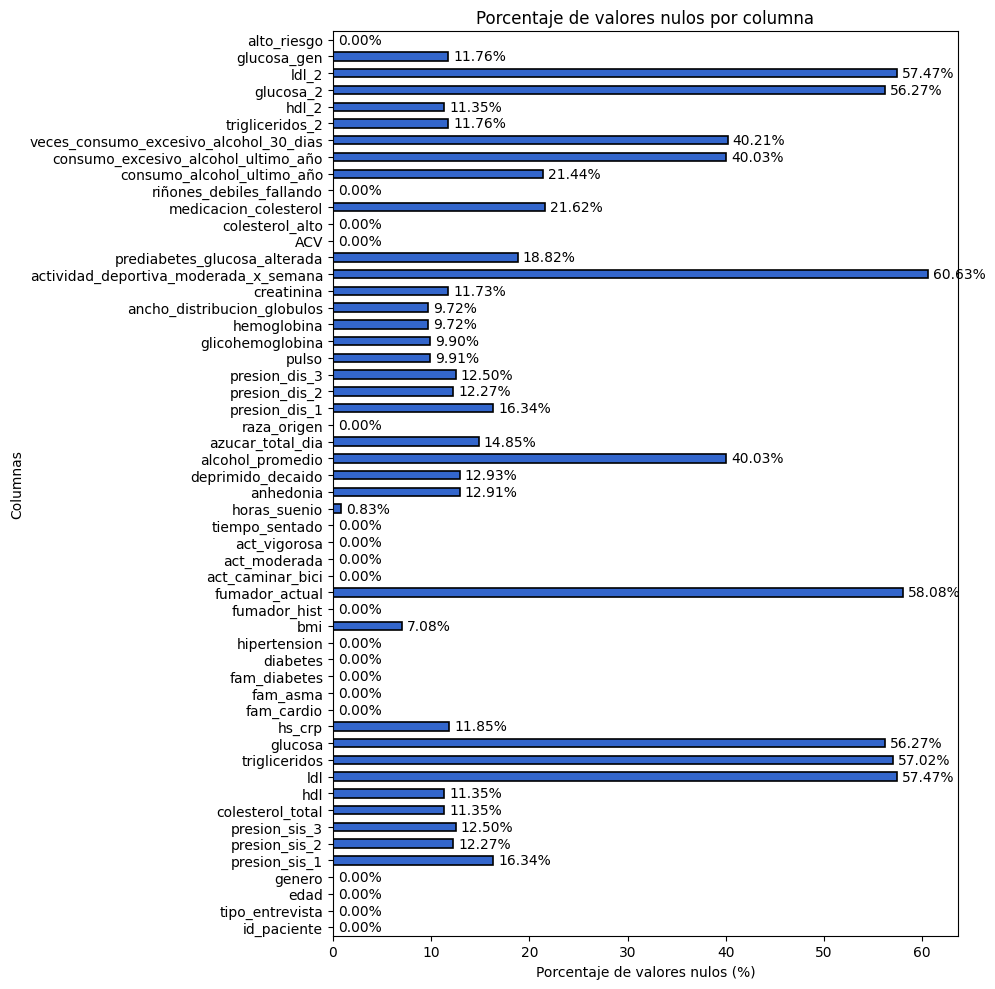

In [38]:
porcentaje_nulos = df_min.isna().mean().round(4) * 100

plt.figure(figsize=(10, 10))
porcentaje_nulos.plot(kind='barh', color="#3366CC", edgecolor='black', linewidth=1.2)

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Columnas')

for index, value in enumerate(porcentaje_nulos):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

In [39]:
if 'LBXSGL' in df_clean.columns:
    print(f"¡Encontramos Glucosa General! Faltantes: {df_clean['LBXSGL'].isnull().sum()}")
    # Comparar con la de ayuno
    print(f"Faltantes en Glucosa Ayuno (LBXGLU): {df_clean['LBXGLU'].isnull().sum()}")
else:
    print("La variable LBXSGL no está en este archivo.")

¡Encontramos Glucosa General! Faltantes: 655
Faltantes en Glucosa Ayuno (LBXGLU): 3133


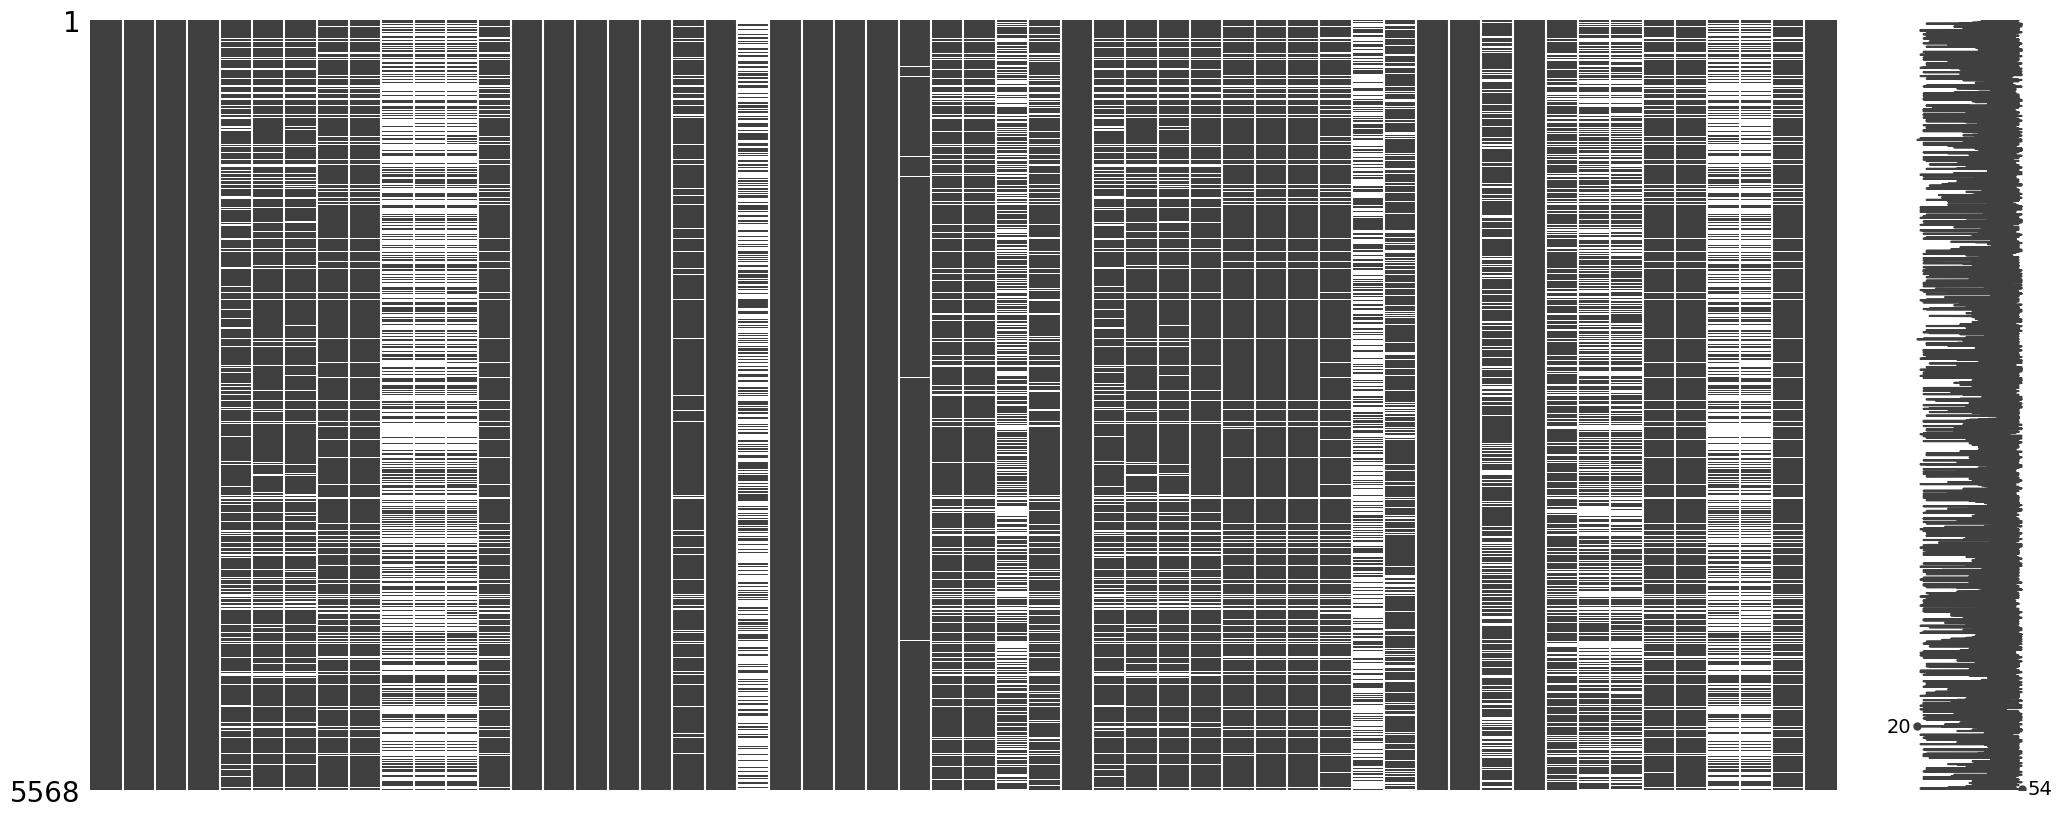

In [40]:
msno.matrix(df_min)
plt.show()

se pueden analizar algunas dependecias en los faltantes. Se analiza cada uno

Nombre de las variables con faltantes:
4. colesterol_total
5. hdl
6. ldl
7. trigliceridos
8. glucosa
9. hs_crp
10. bmi
11. fumador_actual
12. horas_suenio
13. anhedonia
14. deprimido_decaido
15. alcohol_promedio
16. azucar_total_dia
20. pulso
21. glicohemoglobina
22. hemoglobina
23. ancho_distribucion_globulos
24. creatinina
25. actividad_deportiva_moderada_x_semana
26. prediabetes_glucosa_alterada
27. medicacion_colesterol
28. consumo_alcohol_ultimo_año
29. consumo_excesivo_alcohol_ultimo_año
30. veces_consumo_excesivo_alcohol_30_dias

### **Faltantes presión**

<Figure size 1000x600 with 0 Axes>

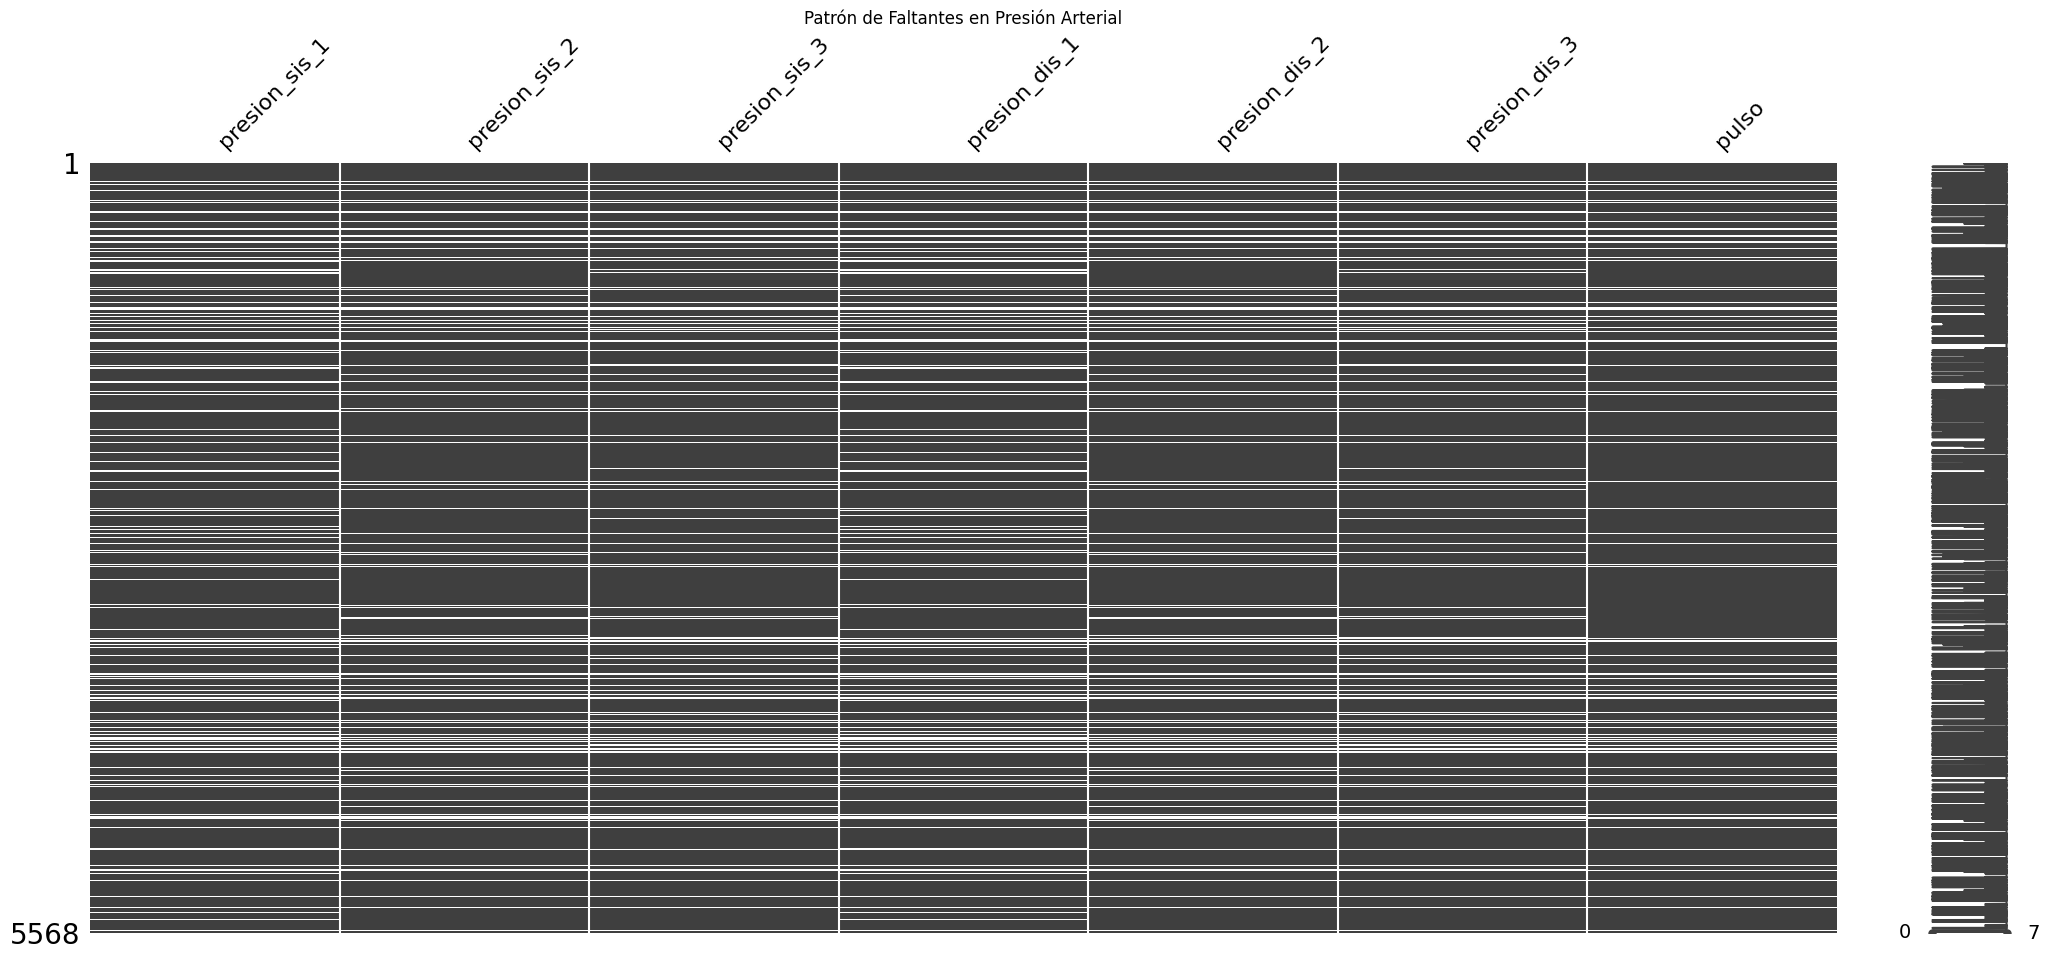

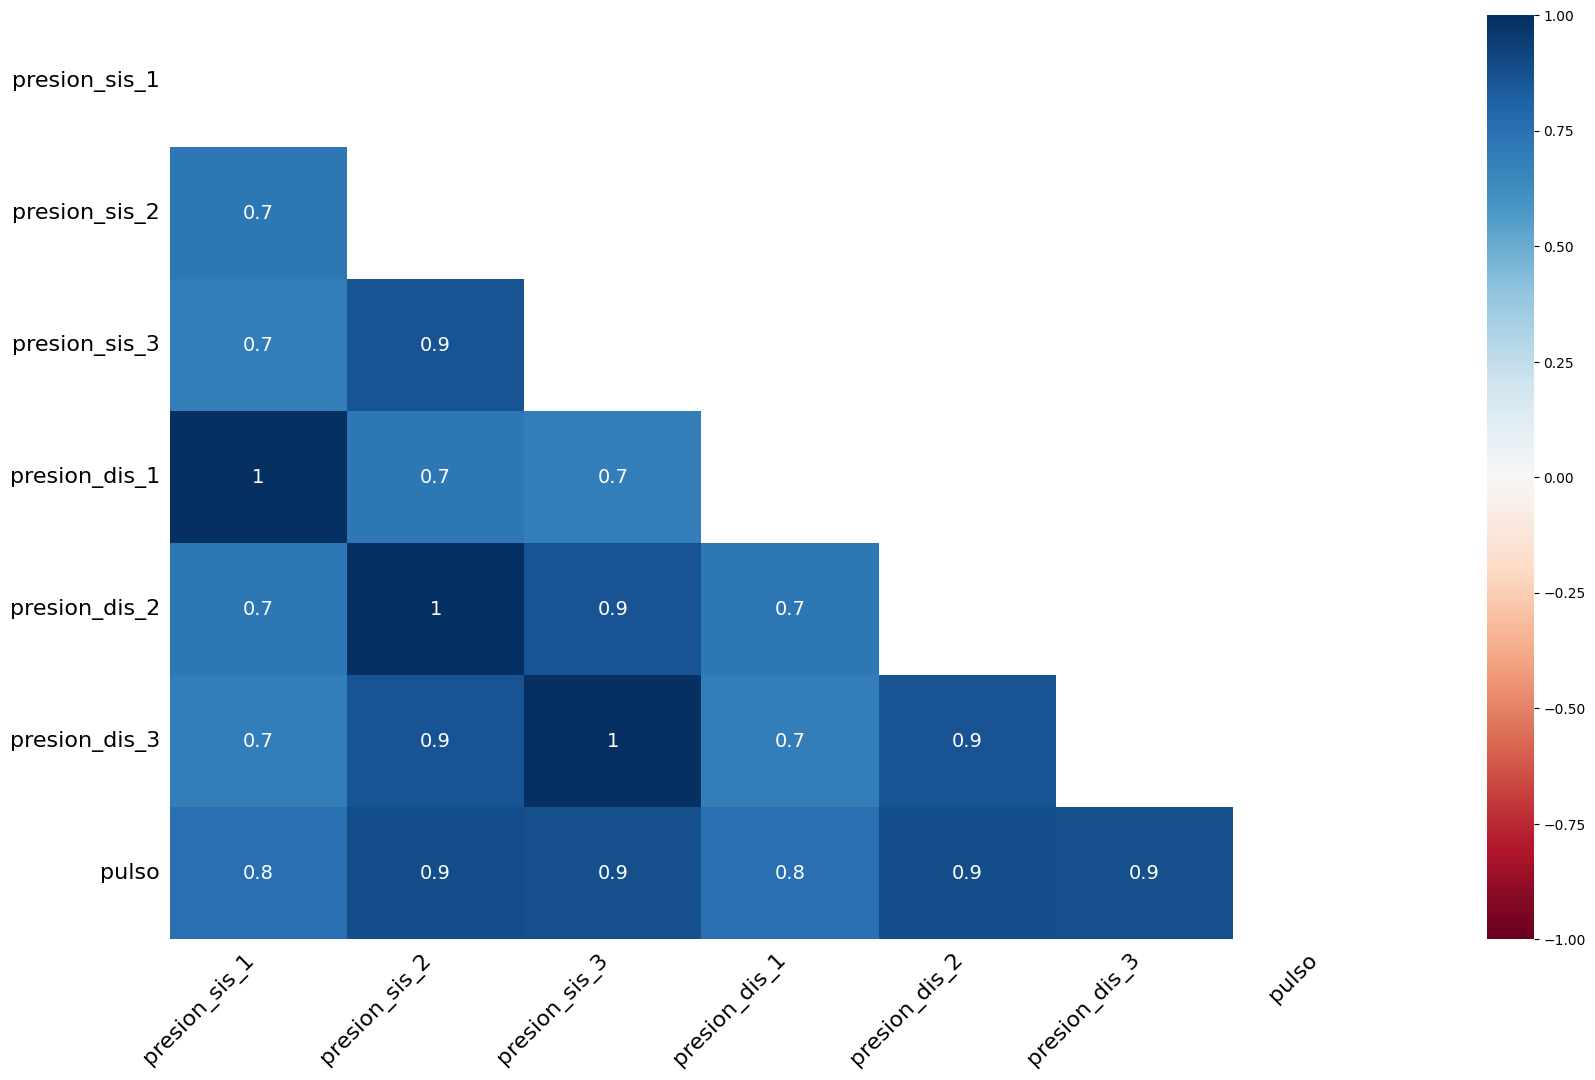

In [41]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Definimos las variables de presión
presion_vars = [
    'presion_sis_1', 'presion_sis_2', 'presion_sis_3',
    'presion_dis_1', 'presion_dis_2', 'presion_dis_3', 'pulso'
]

# 1. Visualizar el patrón de "bloque"
plt.figure(figsize=(10,6))
msno.matrix(df_min[presion_vars])
plt.title('Patrón de Faltantes en Presión Arterial')
plt.show()

# 2. Correlación de nulidad
# Un valor de 1.0 significa que si falta una, falta la otra (indica patrón MAR).
msno.heatmap(df_min[presion_vars])
plt.show()

In [42]:
# Si hay una diferencia significativa en la media de edad, es MAR confirmado.
print(df_min.groupby(df_min['presion_sis_1'].isnull())['edad'].mean())
print(df_min.groupby(df_min['presion_sis_1'].isnull())['genero'].mean())
print(df_min.groupby(df_min['presion_sis_1'].isnull())['bmi'].mean())



presion_sis_1
False    51.186131
True     53.117582
Name: edad, dtype: float64
presion_sis_1
False    1.510305
True     1.538462
Name: genero, dtype: float64
presion_sis_1
False    29.765384
True     30.568522
Name: bmi, dtype: float64


Existe alta correlación en los faltantes de presión. Faltan en bloque. Esto se puede dar en este dataset ya que a veces los pacientes no participan de todas las etapas que constituyen esta encuesta.

TIPO: MAR

### **Laboratorios**

<Axes: >

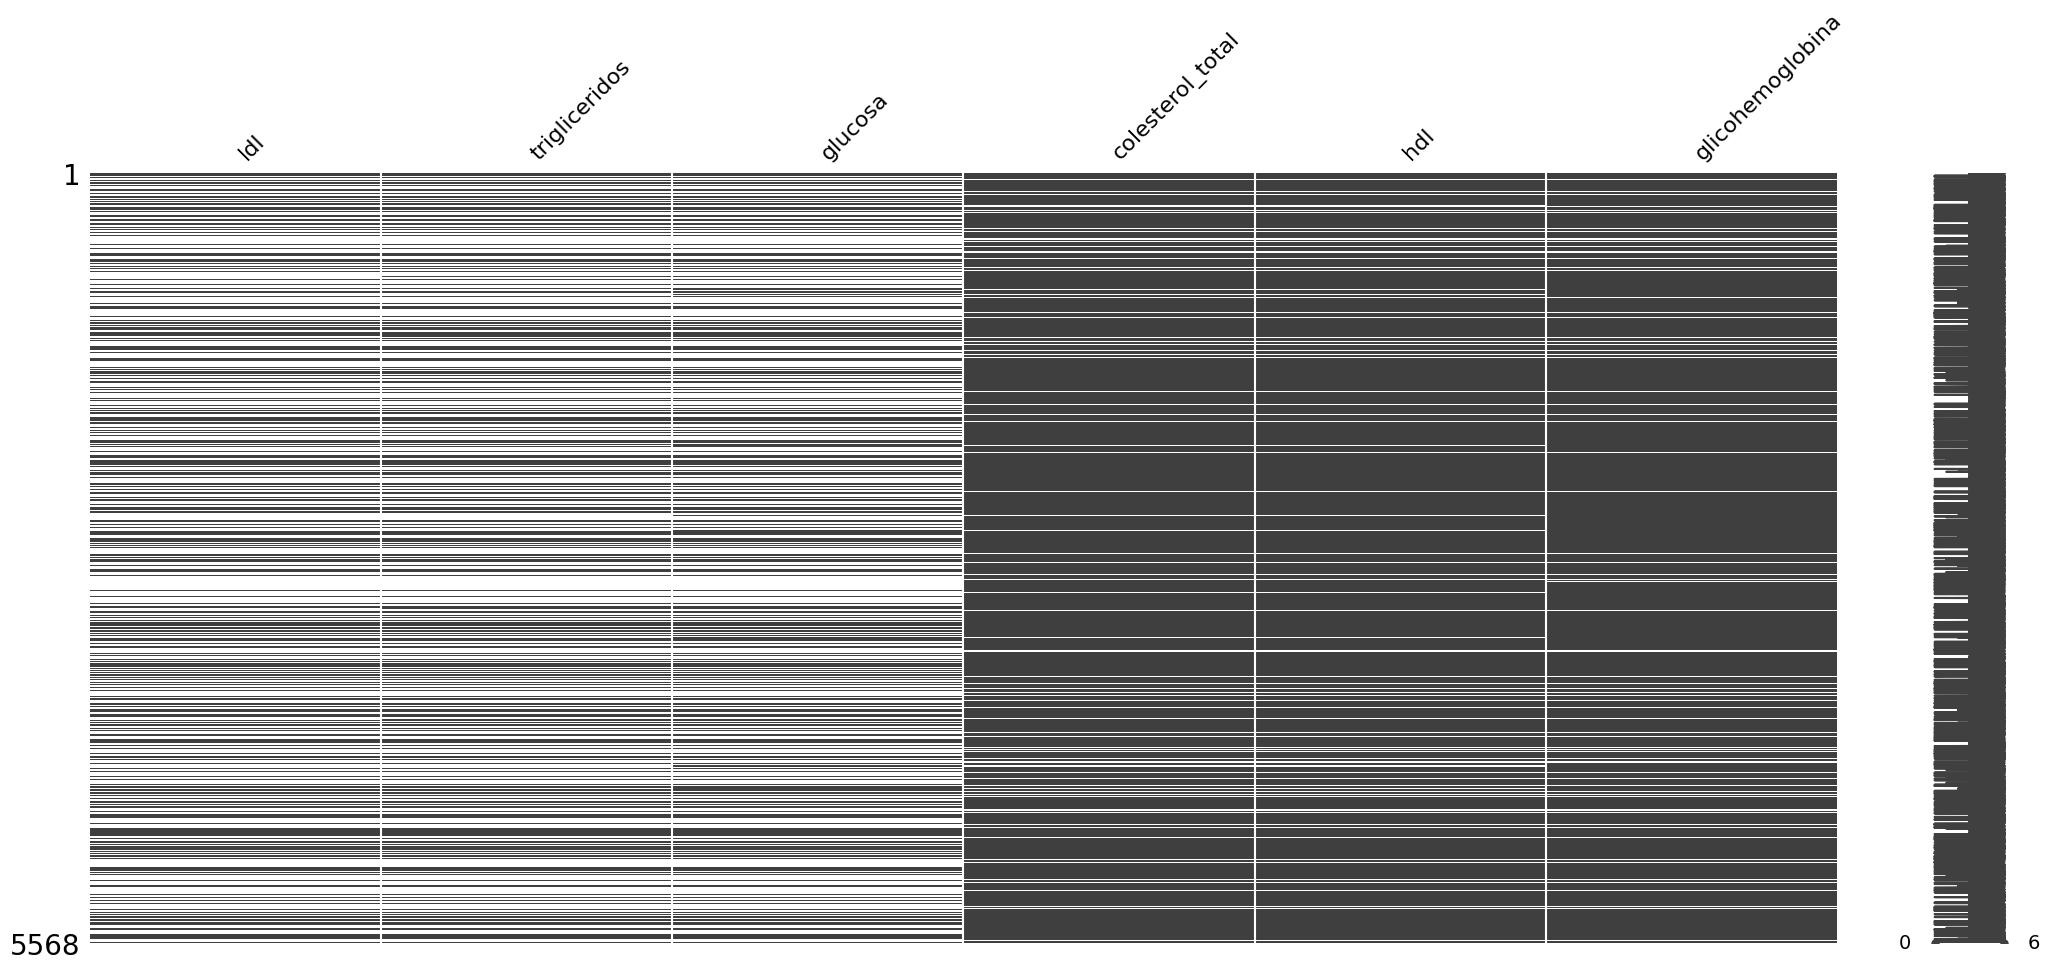

In [43]:
lab_vars = ['ldl', 'trigliceridos', 'glucosa', 'colesterol_total', 'hdl', 'glicohemoglobina']
msno.matrix(df_min[lab_vars])

Ya se observa un patrón en los faltantes.

In [44]:
# Crea una tabla de contingencia para ver si la falta de uno coincide con el otro
print(pd.crosstab(df_min['glucosa'].isnull(), df_min['trigliceridos'].isnull()))

trigliceridos  False  True 
glucosa                    
False           2393     42
True               0   3133


***GLUCOSA***

In [45]:
# # Traemos la columna de pesos desde df_clean a df_min usando el índice
# df_min['WTSAF2YR'] = df_clean['WTSAF2YR']

# # Creamos la marca de si el paciente fue seleccionado para la submuestra de ayuno
# # (Si el peso es > 0, fue seleccionado)
# df_min['seleccionado_ayuno'] = df_min['WTSAF2YR'].fillna(0) > 0

# # Realizamos la tabla de contingencia
# verificacion_ayuno = pd.crosstab(
#     df_min['seleccionado_ayuno'],
#     df_min['glucosa'].isnull(),
#     rownames=['¿Tiene peso de ayuno asignado?'],
#     colnames=['¿La Glucosa es NaN?']
# )

# print("TABLA DE VERIFICACIÓN DE SUBMUESTRA (BLOQUE DE AYUNO)")
# print("-" * 50)
# print(verificacion_ayuno)

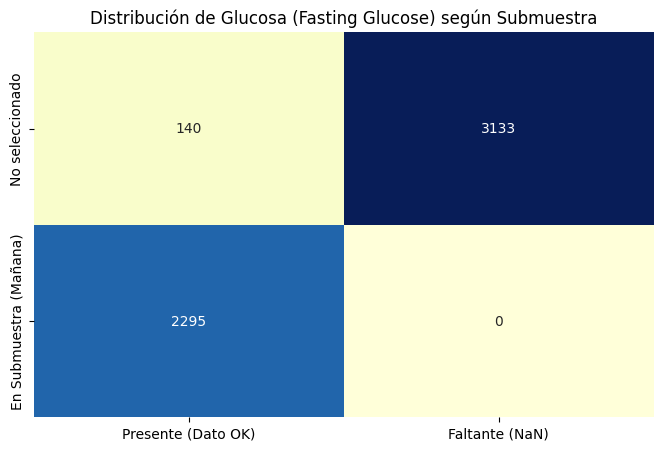

--------------------------------------------------
ANÁLISIS DE COBERTURA DE GLUCOSA EN AYUNO:
- Pacientes con dato oficial: 2295 (41.2%)
- Faltantes por diseño (Turno tarde): 3133 (56.3%)
--------------------------------------------------


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Aseguramos que la columna exista en df_min antes de graficar
# Usamos df_clean para traer el peso de ayuno
df_min['WTSAF2YR'] = df_clean['WTSAF2YR']
df_min['seleccionado_ayuno'] = df_min['WTSAF2YR'].fillna(0) > 0

# 2. Crear la tabla de contingencia con nombres claros
# Usamos rename para no perder el rastro de qué es qué
tabla_visual = pd.crosstab(
    df_min['seleccionado_ayuno'],
    df_min['glucosa'].isnull()
)
tabla_visual.index = ['No seleccionado', 'En Submuestra (Mañana)']
tabla_visual.columns = ['Presente (Dato OK)', 'Faltante (NaN)']

# 3. Crear la visualización (Heatmap)
plt.figure(figsize=(8, 5))
sns.heatmap(tabla_visual, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.title('Distribución de Glucosa (Fasting Glucose) según Submuestra', fontsize=12)
plt.show()

# 4. Cálculo de porcentajes usando los nombres de las columnas (más seguro que iloc)
total = tabla_visual.values.sum()
presentes_submuestra = tabla_visual.loc['En Submuestra (Mañana)', 'Presente (Dato OK)']
faltantes_no_submuestra = tabla_visual.loc['No seleccionado', 'Faltante (NaN)']

print("-" * 50)
print("ANÁLISIS DE COBERTURA DE GLUCOSA EN AYUNO:")
print(f"- Pacientes con dato oficial: {presentes_submuestra} ({ (presentes_submuestra/total)*100 :.1f}%)")
print(f"- Faltantes por diseño (Turno tarde): {faltantes_no_submuestra} ({ (faltantes_no_submuestra/total)*100 :.1f}%)")
print("-" * 50)

El análisis de la estructura de datos reveló que las variables críticas de laboratorio (Glucosa, Triglicéridos y LDL) presentan un patrón de datos faltantes de tipo MAR (Missing at Random), con una ausencia de registros del 56% de la muestra. Esta condición no responde a un error de recolección, sino al diseño muestral de la encuesta NHANES. Específicamente, estas pruebas bioquímicas se restringen exclusivamente a la submuestra de ayuno matutino (Morning Fasting Subsample) por razones de protocolo clínico. Se validó que la falta de estos datos guarda una correlación casi perfecta con la ausencia de pesos estadísticos de ayuno (WTSAF2YR), confirmando que los pacientes no seleccionados para esta submuestra no poseen el dato por diseño del estudio.

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/GLU_J.htm

glucosa:https://wwwn.cdc.gov/nchs/data/nhanes/public/2017/labmethods/GLU-J-MET-508.pdf

glucosa serica: https://wwwn.cdc.gov/nchs/data/nhanes/public/2017/labmethods/BIOPRO-J-MET-Glucose-508.pdf

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/GLU_J.htm#LBDGLUSI

hdl: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/HDL_J.

trigliceridos - ldl: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/TRIGLY_J.htm

In [47]:
# Buscamos cualquier columna que contenga "GLU" en su nombre
columnas_glucosa = [col for col in df_clean.columns if 'GLU' in col.upper()]
print("Columnas encontradas con 'GLU':")
print(columnas_glucosa)

# Verificamos si alguna de esas tiene menos faltantes que la nuestra
for col in columnas_glucosa:
    nulos = df_clean[col].isnull().sum()
    print(f"{col}: {nulos} faltantes")

Columnas encontradas con 'GLU':
['LBXGLU', 'LBDGLUSI']
LBXGLU: 3133 faltantes
LBDGLUSI: 3133 faltantes


no son faltantes por falta de conversion definitivamente

In [48]:
# 1. Aseguramos tener las dos columnas en nuestro entorno
# LBXGLU es la de ayuno, LBXSGL es la general
glucosa_ayuno = df_clean['LBXGLU']
glucosa_general = df_clean['LBXSGL']

# 2. Creamos la versión consolidada
# fillna rellena los huecos de la de ayuno con los valores de la general
glucosa_consolidada = glucosa_ayuno.fillna(glucosa_general)

# 3. Calculamos las estadísticas de recuperación
nulos_original = glucosa_ayuno.isnull().sum()
nulos_final = glucosa_consolidada.isnull().sum()
recuperados = nulos_original - nulos_final

print("--- RESULTADOS DE LA CONSOLIDACIÓN DE GLUCOSA ---")
print(f"Faltantes iniciales (Solo Ayuno): {nulos_original}")
print(f"Faltantes finales (Consolidada):   {nulos_final}")
print(f"PACIENTES RECUPERADOS:             {recuperados}")
print(f"Mejora en la cobertura:            { (recuperados / len(df_clean)) * 100 :.2f}% del total del dataset")

--- RESULTADOS DE LA CONSOLIDACIÓN DE GLUCOSA ---
Faltantes iniciales (Solo Ayuno): 3133
Faltantes finales (Consolidada):   604
PACIENTES RECUPERADOS:             2529
Mejora en la cobertura:            45.42% del total del dataset


In [49]:
# 1. Creamos una copia de trabajo para no alterar el original por error
df_trabajo = df_clean[['SEQN', 'LBXGLU', 'LBXSGL']].copy()

# 2. Creamos la columna consolidada 'glucosa_total'
# Prioriza LBXGLU (Ayuno). Si es NaN, toma LBXSGL (General).
df_trabajo['glucosa_total'] = df_trabajo['LBXGLU'].fillna(df_trabajo['LBXSGL'])

# 3. Creamos la bandera de contexto (Fasting Flag) para la IA
# 1 si el dato es de Ayuno oficial, 0 si es de la General o si era NaN
df_trabajo['es_ayuno_estricto'] = 0
df_trabajo.loc[df_trabajo['LBXGLU'].notnull(), 'es_ayuno_estricto'] = 1

# 4. Verificamos los resultados
total_filas = len(df_trabajo)
nulos_antes = df_trabajo['LBXGLU'].isnull().sum()
nulos_despues = df_trabajo['glucosa_total'].isnull().sum()
recuperados = nulos_antes - nulos_despues

print(f"--- REPORTE DE RECOSTRUCCIÓN ---")
print(f"Total de pacientes analizados: {total_filas}")
print(f"Pacientes sin glucosa al inicio: {nulos_antes}")
print(f"Pacientes sin glucosa al final:  {nulos_despues}")
print(f"Se pueden rescatar {recuperados} registros")

--- REPORTE DE RECOSTRUCCIÓN ---
Total de pacientes analizados: 5568
Pacientes sin glucosa al inicio: 3133
Pacientes sin glucosa al final:  604
Se pueden rescatar 2529 registros


Par comprobar si hizo entrevista online solamente, o acudió a hacerse examenes

In [50]:
# 1. Primero veamos si RIDSTATR está en df_clean y qué valores tiene
if 'RIDSTATR' in df_clean.columns:
    # Creamos la tabla comparando la Glucosa Consolidada (o la original) con el estado de examen
    # Nota: Usamos df_clean['LBXGLU'].fillna(df_clean['LBXSGL']) para representar la glucosa recuperada

    glucosa_temp = df_clean['LBXGLU'].fillna(df_clean['LBXSGL'])

    tabla_mar = pd.crosstab(
        df_clean['RIDSTATR'].map({1: 'Solo Entrevista (Casa)', 2: 'Entrevista + Examen (MEC)'}),
        glucosa_temp.isnull().map({True: 'Faltante (NaN)', False: 'Con Dato'}),
        rownames=['Estado del Participante'],
        colnames=['Estado Glucosa']
    )

    print("ANÁLISIS DE DATOS FALTANTES (MAR) EN DF_CLEAN")
    print("-" * 50)
    print(tabla_mar)
    print("-" * 50)

    # Calculamos el porcentaje de nulos que se explican por no haber ido al examen
    solo_entrevista_y_nulo = tabla_mar.loc['Solo Entrevista (Casa)', 'Faltante (NaN)']
    total_nulos = tabla_mar['Faltante (NaN)'].sum()

    print(f"Del total de nulos, el {(solo_entrevista_y_nulo/total_nulos)*100:.1f}% se debe a participantes que no fueron al examen médico.")
else:
    print("La columna 'RIDSTATR' no se encuentra en df_clean. Busca columnas similares con: [c for c in df_clean.columns if 'STAT' in c]")

ANÁLISIS DE DATOS FALTANTES (MAR) EN DF_CLEAN
--------------------------------------------------
Estado Glucosa             Con Dato  Faltante (NaN)
Estado del Participante                            
Entrevista + Examen (MEC)      4964             300
Solo Entrevista (Casa)            0             304
--------------------------------------------------
Del total de nulos, el 50.3% se debe a participantes que no fueron al examen médico.


In [51]:
# 1. Identificar quiénes tienen solo la versión SI
solo_si = df_clean[df_clean['LBXGLU'].isnull() & df_clean['LBDGLUSI'].notnull()]

# 2. Identificar quiénes tienen ambas
ambas = df_clean[df_clean['LBXGLU'].notnull() & df_clean['LBDGLUSI'].notnull()]

# 3. Identificar quiénes no tienen ninguna (los verdaderos faltantes)
ninguna = df_clean[df_clean['LBXGLU'].isnull() & df_clean['LBDGLUSI'].isnull()]

print(f"Pacientes a rescatar (Solo tienen LBDGLUSI): {solo_si.shape[0]}")
print(f"Pacientes con datos en ambas columnas: {ambas.shape[0]}")
print(f"Pacientes sin datos en ninguna (Faltante Real): {ninguna.shape[0]}")

Pacientes a rescatar (Solo tienen LBDGLUSI): 0
Pacientes con datos en ambas columnas: 2435
Pacientes sin datos en ninguna (Faltante Real): 3133


In [52]:
# Verificamos HDL (LBDHDD) contra el estado de examen (para comprobar que definitivamente no tiene datos de examenes de laboratorio)
verificacion_hdl = pd.crosstab(
    df_clean['RIDSTATR'],
    df_clean['LBDHDD'].isnull()
)
print(verificacion_hdl)

LBDHDD    False  True 
RIDSTATR              
1.0           0    304
2.0        4936    328


TIPO: MAR

Los faltantes son porque los pacientes no fueron elegidos para hacerse estudio con el ayuno o porque hicieron entrevista online.

***TRIGLICERIDOS***

In [53]:
# Si la correlación es 1.0, es exactamente el mismo dato en distinta unidad
print(df_clean[['LBXTR', 'LBDSTRSI']].corr())

             LBXTR  LBDSTRSI
LBXTR     1.000000  0.998812
LBDSTRSI  0.998812  1.000000


In [54]:
# 1. Comparamos los nulos de ambas
print(f"Faltantes en trigliceridos (LBXTR - mg/dL): {df_clean['LBXTR'].isnull().sum()}")
print(f"Faltantes en LBDSTRSI (mmol/L): {df_clean['LBDSTRSI'].isnull().sum()}")

# 2. Verificamos la correlación
# Si es 1.0, son la misma variable escalada
correlacion = df_clean['LBXTR'].corr(df_clean['LBDSTRSI'])
print(f"\nCorrelación entre ambas: {correlacion:.4f}")

# 3. Vemos si hay casos donde una está y la otra no
casos_recuperables = df_clean[df_clean['LBXTR'].isnull() & df_clean['LBDSTRSI'].notnull()].shape[0]
print(f"Casos donde LBDSTRSI podría 'salvar' a LBXTR: {casos_recuperables}")

Faltantes en trigliceridos (LBXTR - mg/dL): 3175
Faltantes en LBDSTRSI (mmol/L): 655

Correlación entre ambas: 0.9988
Casos donde LBDSTRSI podría 'salvar' a LBXTR: 2531


In [55]:
# # 1. Recuperamos los datos (Fórmula de conversión: mmol/L * 88.57 = mg/dL)
# df_min['trigliceridos'] = df_min['trigliceridos'].fillna(df_clean['LBDSTRSI'] * 88.57)

# # 2. Verificamos cuántos faltantes quedan ahora
# nuevos_faltantes = df_min['trigliceridos'].isnull().sum()
# print(f"Faltantes finales en trigliceridos: {nuevos_faltantes} (¡Bajamos de 3175 a {nuevos_faltantes}!)")

Originalmente, en el dataset heart-disease from kaggle (https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data) estaban presentes los siguientes datos:


### **Descripción de variables**

- Age: La edad del individuo. +

- Gender: El género del individuo (Masculino o Femenino). +

- Blood Pressure: La presión arterial del individuo (sistólica). +

- Cholesterol Level: El nivel total de colesterol del individuo. +

- Exercise Habits: Los hábitos de ejercicio del individuo (Bajo, Medio, Alto). +

- Smoking: Si el individuo fuma o no (Sí o No). +

- Family Heart Disease: Si hay antecedentes familiares de enfermedad cardíaca (Sí o No). +

- Diabetes: Si el individuo tiene diabetes (Sí o No). +

- BMI: El índice de masa corporal del individuo. +

- High Blood Pressure: Si el individuo tiene presión arterial alta (Sí o No). +

- Low HDL Cholesterol: Si el individuo tiene colesterol HDL bajo (Sí o No). +

- High LDL Cholesterol: Si el individuo tiene colesterol LDL alto (Sí o No). +

- Alcohol Consumption: El nivel de consumo de alcohol del individuo (Ninguno, Bajo, Medio, Alto). +

- Stress Level: El nivel de estrés del individuo (Bajo, Medio, Alto).

- Sleep Hours: La cantidad de horas que duerme el individuo. +

- Sugar Consumption: El nivel de consumo de azúcar del individuo (Bajo, Medio, Alto). +

- Triglyceride Level: El nivel de triglicéridos del individuo. +

- Fasting Blood Sugar: El nivel de glucosa en sangre en ayunas del individuo. +

- CRP Level: El nivel de proteína C reactiva (un marcador de inflamación). +

- Homocysteine Level: El nivel de homocisteína del individuo (un aminoácido que afecta la salud de los vasos sanguíneos). (posiblemente presente en otros períodos de NHANES)

- Heart Disease Status: El estado de la enfermedad cardíaca del individuo (Sí o No).+

### **Nuevo dataset encontrado**

In [56]:
path = "/content/drive/MyDrive/NHANES"
import os
os.listdir(path)


['demographics.csv',
 'laboratory.csv',
 'dietary.csv',
 'examination.csv',
 'questionnaire.csv',
 '2015-2016',
 '2013-2014']

DATASET: https://www.kaggle.com/datasets/rileyzurrin/national-health-and-nutrition-exam-survey-2017-2018

Los datos se obtienen de la Encuesta Nacional de Examen de Salud y Nutrición (NHANES) en EEUU.

NHANES: https://wwwn.cdc.gov/nchs/nhanes/


Los datos tomados para las siguientes pruebas son del período 2017-2018. Se podría analizar la posibilidad de tomar más períodos, siempre y cuando en esos periodos se hayan recolectado todos los datos necesarios para el proyecto. También en caso de que hubiera muchos faltantes en el período 2017-2018.

Los datos se cargan em archivos por separado. Son datos demográficos, de laboratorio, mediciones físicas, exámenes médicos y de alimentación de distintos pacientes indentificados con un ID llamado SEQN.

In [57]:
#Librerias
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [58]:
df_demo = pd.read_csv(f"{path}/demographics.csv")
df_lab  = pd.read_csv(f"{path}/laboratory.csv")
df_exam = pd.read_csv(f"{path}/examination.csv")
df_diet = pd.read_csv(f"{path}/dietary.csv")
df_quest= pd.read_csv(f"{path}/questionnaire.csv")


In [59]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, "SEQN" in df.columns)


demo True
lab True
exam True
diet True
quest True


In [60]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, df.shape)


demo (9254, 46)
lab (8366, 386)
exam (8704, 490)
diet (9254, 362)
quest (9254, 956)


In [61]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, df["SEQN"].nunique(), "personas únicas")


demo 9254 personas únicas
lab 8366 personas únicas
exam 8704 personas únicas
diet 9254 personas únicas
quest 9254 personas únicas


In [62]:
df = df_demo.merge(df_lab,  on="SEQN", how="left")
df = df.merge(df_exam, on="SEQN", how="left")
df = df.merge(df_diet, on="SEQN", how="left")
df = df.merge(df_quest,on="SEQN", how="left")

df.shape


(9254, 2236)

In [63]:
df.head()

SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  93703.0      10.0       2.0       2.0       2.0       NaN       5.0   
1  93704.0      10.0       2.0       1.0       2.0       NaN       3.0   
2  93705.0      10.0       2.0       2.0      66.0       NaN       4.0   
3  93706.0      10.0       2.0       1.0      18.0       NaN       5.0   
4  93707.0      10.0       2.0       1.0      13.0       NaN       5.0   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  WHD110  WHD120  WHD130  WHD140  WHQ150  \
0       6.0       2.0      27.0  ...     NaN     NaN     NaN     NaN     NaN   
1       3.0       1.0      33.0  ...     NaN     NaN     NaN     NaN     NaN   
2       4.0       2.0       NaN  ...   150.0   130.0    63.0   170.0    62.0   
3       6.0       2.0     222.0  ...     NaN     NaN     NaN   150.0    17.0   
4       7.0       2.0     158.0  ...     NaN     NaN     NaN     NaN     NaN   

   WHQ190  WHQ200  WHQ030M  WHQ500  WHQ520  
0     NaN     NaN      NaN     NaN     NaN  
1     NaN     NaN      NaN     NaN     NaN  
2     2.0     NaN      NaN     NaN     NaN  
3     2.0     NaN      NaN     NaN     NaN  
4     NaN     NaN      3.0     3.0     2.0  

[5 rows x 2236 columns]

el dataset posee 2236 columnas. Las variables estan etiquetadas por codigos cuya descripcion se encuentra en la documentacion oficial del nhanes.

In [64]:
df["SEQN"].nunique()


9254

In [65]:
df.isnull().mean().sort_values(ascending=False).head(30)


BMIHEAD     1.000000
OSQ040CE    0.999892
HIQ031AA    0.999892
OSD030CE    0.999892
OSD050CC    0.999892
OSD050CE    0.999892
MCQ230D     0.999892
OSQ100J     0.999892
OSD110J     0.999892
SMQ665B     0.999892
OSD050AC    0.999892
OSQ040CD    0.999784
OSD030CD    0.999784
OSD050CD    0.999784
OSD030BE    0.999784
OSQ100E     0.999784
AUXR1K2L    0.999784
OSD030AC    0.999784
OSD110E     0.999784
DIQ175X     0.999784
OSQ040AC    0.999784
DRQSDT5     0.999784
SMQ665D     0.999784
OSD050BD    0.999784
AUXR1K2R    0.999784
LBXHNAT     0.999784
OSQ040BE    0.999784
OSD050BE    0.999784
OSQ100F     0.999676
SMQ690K     0.999676
dtype: float64

primera limpieza: se eliminan columnas con faltantes de mas del 80%

In [66]:
threshold = 0.80
missing_ratio = df.isnull().mean()

cols_to_drop = missing_ratio[missing_ratio > threshold].index
len(cols_to_drop)

801

In [67]:
df_clean = df.drop(columns=cols_to_drop)
df_clean.shape


(9254, 1435)

In [68]:
df_clean.head()

SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDRETH1  RIDRETH3  \
0  93703.0      10.0       2.0       2.0       2.0       5.0       6.0   
1  93704.0      10.0       2.0       1.0       2.0       3.0       3.0   
2  93705.0      10.0       2.0       2.0      66.0       4.0       4.0   
3  93706.0      10.0       2.0       1.0      18.0       5.0       6.0   
4  93707.0      10.0       2.0       1.0      13.0       5.0       7.0   

   RIDEXMON  RIDEXAGM  DMQMILIZ  ...  WHQ040  WHD050  WHQ070  WHQ225  WHD110  \
0       2.0      27.0       NaN  ...     NaN     NaN     NaN     NaN     NaN   
1       1.0      33.0       NaN  ...     NaN     NaN     NaN     NaN     NaN   
2       2.0       NaN       2.0  ...     3.0   165.0     2.0     4.0   150.0   
3       2.0     222.0       2.0  ...     3.0   145.0     2.0     5.0     NaN   
4       2.0     158.0       NaN  ...     NaN     NaN     NaN     NaN     NaN   

   WHD120  WHD130  WHD140  WHQ150  WHQ190  
0     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN  
2   130.0    63.0   170.0    62.0     2.0  
3     NaN     NaN   150.0    17.0     2.0  
4     NaN     NaN     NaN     NaN     NaN  

[5 rows x 1435 columns]

In [69]:
"SEQN" in df_clean.columns


True

mayores de 18

In [70]:
df_clean = df_clean[df_clean["RIDAGEYR"] >= 18]
df_clean.shape


(5856, 1435)

Armado de target

Se toman 4 valores:

"MCQ160B": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido insuficiencia cardíaca congestiva?"

"MCQ160C": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido enfermedad coronaria del corazón?"

"MCQ160D": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido angina, también llamada angina de pecho?"

"MCQ160E":"¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido un ataque al corazón (también llamado infarto de miocardio)?"

In [71]:
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E"]

valores de esas columnas.

Significados:

1- si
2 - no
7 - no quizo contestar
9 - no sabe


In [72]:
for col in cvd_cols:
    print(f"Valores en {col}:")
    print(df_clean[col].value_counts(dropna=False))
    print("-"*30)

Valores en MCQ160B:
MCQ160B
2.0    5351
NaN     287
1.0     201
9.0      17
Name: count, dtype: int64
------------------------------
Valores en MCQ160C:
MCQ160C
2.0    5288
NaN     287
1.0     265
9.0      16
Name: count, dtype: int64
------------------------------
Valores en MCQ160D:
MCQ160D
2.0    5378
NaN     287
1.0     161
9.0      30
Name: count, dtype: int64
------------------------------
Valores en MCQ160E:
MCQ160E
2.0    5289
NaN     287
1.0     270
9.0      10
Name: count, dtype: int64
------------------------------


como se ve, algunos encuestados no saben si tienen algunas de esas patologias. Son muy pocos. por lo tanto, los elimino.Tambien se eliminan los que tienen faltantes, ya que al tratarse del target,se necesitan datos confiables.

In [73]:
import numpy as np

# Reemplazar 9 por NaN (no sabe)
df_clean[cvd_cols] = df_clean[cvd_cols].replace(9, np.nan)

# Eliminar filas donde no hay info en ninguna columna de CVD
df_clean = df_clean[df_clean[cvd_cols].notna().any(axis=1)]

# Crear target binario
df_clean["alto_riesgo"] = (df_clean[cvd_cols] == 1).any(axis=1).astype(int) ## si respondió si en alguna de las variables, se codifica como que si posee enfermedad cardiovascular

# Verificar distribución
print(df_clean["alto_riesgo"].value_counts())



alto_riesgo
0    5041
1     527
Name: count, dtype: int64


In [74]:
df_clean.shape

(5568, 1436)

Aún se tiene una buena cantidad de datos

In [75]:
df_clean.head()

SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDRETH1  RIDRETH3  \
2   93705.0      10.0       2.0       2.0      66.0       4.0       4.0   
5   93708.0      10.0       2.0       2.0      66.0       5.0       6.0   
6   93709.0      10.0       2.0       2.0      75.0       4.0       4.0   
8   93711.0      10.0       2.0       1.0      56.0       5.0       6.0   
10  93713.0      10.0       2.0       1.0      67.0       3.0       3.0   

    RIDEXMON  RIDEXAGM  DMQMILIZ  ...  WHD050  WHQ070  WHQ225  WHD110  WHD120  \
2        2.0       NaN       2.0  ...   165.0     2.0     4.0   150.0   130.0   
5        2.0       NaN       2.0  ...   118.0     2.0     5.0   118.0   100.0   
6        1.0       NaN       2.0  ...   190.0     2.0     3.0   170.0   160.0   
8        2.0       NaN       2.0  ...   142.0     2.0     5.0   142.0   148.0   
10       1.0       NaN       1.0  ...   168.0     2.0     5.0   190.0   170.0   

    WHD130  WHD140  WHQ150  WHQ190  alto_riesgo  
2     63.0   170.0    62.0     2.0            0  
5     60.0   120.0    40.0     2.0            0  
6     62.0   200.0    50.0     2.0            0  
8     69.0   152.0    33.0     2.0            0  
10    72.0   195.0    45.0     2.0            0  

[5 rows x 1436 columns]

In [76]:
df_clean["alto_riesgo"].value_counts(normalize=True)


alto_riesgo
0    0.905352
1    0.094648
Name: proportion, dtype: float64

In [77]:
import pandas as pd

# Diccionario con todas las variables y su significado
nhanes_vars_dict = {
    "SEQN": "Identificador único del participante",
    "RIDSTATR": "Entrevista solo online o con estudios presenciales",
    "RIDAGEYR": "Edad del participante (años)", # numerica
    "RIAGENDR": "Género (1=Hombre, 2=Mujer)", # binaria
    "BPXSY1": "Presión sistólica, medición 1 (mmHg)", # numerica continua
    "BPXSY2": "Presión sistólica, medición 2 (mmHg)", # numerica continua
    "BPXSY3": "Presión sistólica, medición 3 (mmHg)", # numerica continua
    # "BPXSY4": "Presión sistólica, medición 4 (mmHg)",   YA NO EXISTE EN ESTE PUNTO
    "LBXTC": "Colesterol total (mg/dL)",
    "LBDHDD": "Colesterol HDL (mg/dL)",
    "LBDLDL": "Colesterol LDL (mg/dL)",
    "LBXTR": "Triglicéridos (mg/dL)",
    "LBXGLU": "Glucosa en ayunas (mg/dL)",
    "LBXHSCRP": "Proteína C reactiva de alta sensibilidad (hs-CRP) (mg/dL, marcador de inflamación)",
    ## ------ Para target -----------
    "MCQ160B": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido insuficiencia cardíaca congestiva?",
    "MCQ160C": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido enfermedad coronaria del corazón?",
    "MCQ160D": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido angina, también llamada angina de pecho?",
    "MCQ160E":"¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido un ataque al corazón (también llamado infarto de miocardio)?",
    ## ------------------------------
    "MCQ300A": "Pariente con enfermedad cardíaca (si ha tenido nu ataque cardíaco o angina)",
    "MCQ300B": "Pariente con asma",
    "MCQ300C": "Pariente con diabetes",
    "DIQ010": "Diabetes declarada por médico",
    "BPQ020": "Diagnóstico de presión arterial alta",
    "BMXBMI": "Índice de masa corporal (kg/m²)",
    "SMQ020": "Fumador en algún momento de la vida",
    "SMQ040": "Fuma actualmente",
    "PAQ605": "Actividad física: caminar/bici últimos 7 días",
    "PAQ620": "Actividad física moderada últimos 7 días",
    "PAQ635": "Actividad física vigorosa últimos 7 días",
    "PAQ650": "Tiempo sentado promedio diario",
    "SLD012": "Horas de sueño promedio por noche",
    "DPQ010": "Pregunta 1 escala depresión -anhedonia",
    "DPQ020": "Pregunta 2 escala depresión",
    # "DPQ030": "Pregunta 3 escala depresión",
    # "DPQ040": "Pregunta 4 escala depresión",
    # "DPQ050": "Pregunta 5 escala depresión",
    # "DPQ060": "Pregunta 6 escala depresión",
    # "DPQ070": "Pregunta 7 escala depresión",
    # "DPQ080": "Pregunta 8 escala depresión",
    # "DPQ090": "Pregunta 9 escala depresión",
    # "ALD020": "A lo largo de tu vida, ¿cuántos días has consumido al menos una bebida alcohólica?", YA NO EXISTE EN ESTE PUNTO
    # "ALD030": "Durante los últimos 30 días, ¿cuántos días consumiste al menos una bebida alcohólica?", YA NO EXISTE EN ESTE PUNTO
    "ALQ130": "Durante los últimos 12 meses, en los días que {usted/SP} consumió bebidas alcohólicas, ¿cuántas copas tomó en promedio? Por copa, se refiere a una cerveza de 355 ml, una copa de vino de 145 ml o una onza y media de licor.",
    "DR1TSUGR": "Consumo de azúcar total del día (gramos)",
    # agregados despues
    # "RIDRETH1": "Recodificación de información reportada sobre raza y origen hispano",
    "RIDRETH3": "Recodificación de información reportada sobre raza y origen hispano, con categoría de asiático no hispano",
    "BPXDI1" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXDI2" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXDI3" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXPULS": "Pulso ¿regular o irregular? (1 -regular, 2- irregular)", # numerica binaria
    "LBXGH" :	"Glicohemoglobina (%)", # numerica
    "LBXHGB":  "Hemoglobina (g/dL)",
    "LBXRDW": "Ancho de distribución de glóbulos rojos (%)",
    "LBXSCR": "Creatinina, suero refrigerado (mg/dL)",
    # "PAQ610": "(Días por semana de actividad intensa en el trabajo)", faltantes
    # AQ625 (días de actividad moderada en el trabajo)
    # AQ640 (días caminando/bicicleta para transporte)
    # PAQ655 (días actividad deportiva vigorosa)
    # "PAQ665": "(actividad deportiva moderada, sí/no)", #se elige paq670
    "PAQ670": "(días actividad deportiva moderada)",
    "DIQ160": "(prediabetes / glucosa alterada)",
    "MCQ160F": "(alguna vez ACV)",
    "BPQ080": "Diagnóstico de colesterol alto",
    # "BPQ100D":"cumplimiento de medicación para colesterol",
    "BPQ090D": "Told to take prescriptn for cholesterol",
    "KIQ022" : "¿Alguna vez le dijeron que tiene riñones débiles o fallando?",
    "ALQ121": "Durante los últimos 12 meses, ¿con qué frecuencia consumiste cualquier tipo de bebida alcohólica? Indica cuántos días por semana, por mes o por año.",
    "ALQ142": "Durante los últimos 12 meses, ¿con qué frecuencia tomaste {DISPLAY NUMBER} o más bebidas alcohólicas en un solo día? Indica cuántos días por semana, por mes o por año.",
    "ALQ170": "Considerando todos los tipos de bebidas alcohólicas, durante los últimos 30 días, ¿cuántas veces tomaste {4/5} o más bebidas en una ocasión?",
    "LBDSTRSI": "trigliceridos_2",
    "LBDHDDSI": "hdl_2",
    "LBDGLUSI": "glucosa_2",
    "LBDLDLSI":"ldl_2",
    "LBXSGL": "glucosa_gen"



# ALD030 – Durante los últimos 30 días, ¿en cuántos días consumiste al menos una bebida alcohólica?


# ALD040 – Durante los últimos 30 días, ¿en cuántos días consumiste {'4' mujeres, '5' hombres - mostrar número} o más bebidas alcohólicas seguidas, es decir, en un par de horas?

}
#" opcionales
# LBXIN -	Insulina (uU/mL)
# LBXFER - Ferritina (ng/mL)
# "URXCOTT" : "Cotinina (ng/mL)" #si, no hay respuesta clara de tabaquismo
# CDQ001 (Dolor/molestia en el pecho alguna vez) → Opcional / complementaria
# CDQ002 (Dolor al subir cuestas o apurarse) → Opcional / complementaria
# CDQ003 (Dolor al caminar a paso normal) → Opcional / complementaria
# CDQ008 (Dolor intenso >30 min en pecho) → Opcional / relevante si querés preinfarto


In [78]:
variable = 'LBDLDNSI'

if variable in df_clean.columns:
    print("La variable existe")
    print(df_clean[variable].unique())
else:
    print("La variable NO existe")

La variable existe
[  nan 2.87  4.086 3.672 2.043 1.577 2.483 2.534 1.5   2.327 2.405 4.344
 3.155 3.258 9.025 0.647 3.62  4.939 3.491 4.267 0.983 1.474 2.198 2.638
 2.586 2.457 2.896 2.146 3.957 1.448 2.508 4.603 1.733 3.595 1.862 2.974
 4.112 4.293 2.095 2.664 2.741 1.526 2.224 3.284 3.103 3.776 3.129 2.56
 2.069 2.845 5.043 4.06  5.637 2.612 2.948 3.517 2.431 3.931 1.319 1.345
 3.827 3.31  3.077 1.914 4.5   1.552 1.707 1.603 4.551 1.836 4.163 2.767
 4.138 3.207 2.819 1.19  4.008 5.017 3.465 3.75  4.37  1.94  2.353 2.715
 3.388 3.439 3.698 4.577 3.646 1.293 3.181 2.276 1.164 4.732 3.879 3.026
 1.888 2.121 2.25  1.965 2.172 3.    1.267 1.81  2.793 3.543 4.319 2.689
 3.724 1.396 3.569 4.784 3.801 1.009 3.362 6.206 6.025 1.784 3.905 4.991
 3.233 3.336 2.379 4.396 5.896 2.302 1.758 0.853 5.25  3.853 4.888 3.982
 5.56  1.655 5.663 2.017 1.681 4.422 3.414 5.069 5.741 0.828 4.448 0.905
 1.422 5.948 1.371 4.913 1.629 3.051 4.474 2.922 5.405 1.215 1.112 4.758
 4.241 4.215 5.12  5.224 4.189 4.

In [79]:
# Columnas originales del target
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E"]

# Lista de variables que ppropuestas
selected_vars = list(nhanes_vars_dict.keys())

# Ver cuáles existen realmente en df_clean
existing_vars = [var for var in selected_vars if var in df_clean.columns]


# Features = todas las columnas existentes menos las de CVD y el target ya creado
feature_cols = [col for col in existing_vars if col not in cvd_cols and col != "alto_riesgo"]

print(f"Número de features que vamos a usar: {len(feature_cols)}")
print(feature_cols)


Número de features que vamos a usar: 53
['SEQN', 'RIDSTATR', 'RIDAGEYR', 'RIAGENDR', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'LBXTC', 'LBDHDD', 'LBDLDL', 'LBXTR', 'LBXGLU', 'LBXHSCRP', 'MCQ300A', 'MCQ300B', 'MCQ300C', 'DIQ010', 'BPQ020', 'BMXBMI', 'SMQ020', 'SMQ040', 'PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'SLD012', 'DPQ010', 'DPQ020', 'ALQ130', 'DR1TSUGR', 'RIDRETH3', 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXPULS', 'LBXGH', 'LBXHGB', 'LBXRDW', 'LBXSCR', 'PAQ670', 'DIQ160', 'MCQ160F', 'BPQ080', 'BPQ090D', 'KIQ022', 'ALQ121', 'ALQ142', 'ALQ170', 'LBDSTRSI', 'LBDHDDSI', 'LBDGLUSI', 'LBDLDLSI', 'LBXSGL']


In [80]:
# Variables que se eliminaron
removed_vars = [var for var in selected_vars if var not in existing_vars]

print(f"Se eliminaron {len(removed_vars)} variables:")
print(removed_vars)


Se eliminaron 0 variables:
[]


In [81]:
print(df_clean.columns.tolist())


['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'URXUMA', 'URXUMS', 'URXUCR', 'URXCRS', 'URDACT', 'WTSSGP2Y', 'WTSA2YR', 'URXUAS', 'URXUAS3', 'URXUAS5', 'URXUAB', 'URXUAC', 'URXUDMA', 'URXUMMA', 'URDUMMAL', 'LBDHDD', 'LBDHDDSI', 'WTSAF2YR', 'LBXTR', 'LBDTRSI', 'LBDLDL', 'LBDLDLSI', 'LBDLDLM', 'LBDLDMSI', 'LBDLDLN', 'LBDLDNSI', 'LBXTC', 'LBDTCSI', 'URXUCM', 'LBXBCR', 'LBDBCRSI', 'LBXBCO', 'LBDBCOSI', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCS

In [82]:
# df_clean = df_clean.drop(columns=["SEQN"])


In [83]:
print(df_clean.columns.tolist())

['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'URXUMA', 'URXUMS', 'URXUCR', 'URXCRS', 'URDACT', 'WTSSGP2Y', 'WTSA2YR', 'URXUAS', 'URXUAS3', 'URXUAS5', 'URXUAB', 'URXUAC', 'URXUDMA', 'URXUMMA', 'URDUMMAL', 'LBDHDD', 'LBDHDDSI', 'WTSAF2YR', 'LBXTR', 'LBDTRSI', 'LBDLDL', 'LBDLDLSI', 'LBDLDLM', 'LBDLDMSI', 'LBDLDLN', 'LBDLDNSI', 'LBXTC', 'LBDTCSI', 'URXUCM', 'LBXBCR', 'LBDBCRSI', 'LBXBCO', 'LBDBCOSI', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCS

In [84]:
print("Nombre de las variables:")

for i, col in enumerate(df_clean.columns):
    print(f"{i+1}. {col}")

Nombre de las variables:
1. SEQN
2. SDDSRVYR
3. RIDSTATR
4. RIAGENDR
5. RIDAGEYR
6. RIDRETH1
7. RIDRETH3
8. RIDEXMON
9. RIDEXAGM
10. DMQMILIZ
11. DMDBORN4
12. DMDCITZN
13. DMDYRSUS
14. DMDEDUC3
15. DMDEDUC2
16. DMDMARTL
17. SIALANG
18. SIAPROXY
19. SIAINTRP
20. FIALANG
21. FIAPROXY
22. FIAINTRP
23. MIALANG
24. MIAPROXY
25. MIAINTRP
26. AIALANGA
27. DMDHHSIZ
28. DMDFMSIZ
29. DMDHHSZA
30. DMDHHSZB
31. DMDHHSZE
32. DMDHRGND
33. DMDHRAGZ
34. DMDHREDZ
35. DMDHRMAZ
36. DMDHSEDZ
37. WTINT2YR
38. WTMEC2YR
39. SDMVPSU
40. SDMVSTRA
41. INDHHIN2
42. INDFMIN2
43. INDFMPIR
44. URXUMA
45. URXUMS
46. URXUCR
47. URXCRS
48. URDACT
49. WTSSGP2Y
50. WTSA2YR
51. URXUAS
52. URXUAS3
53. URXUAS5
54. URXUAB
55. URXUAC
56. URXUDMA
57. URXUMMA
58. URDUMMAL
59. LBDHDD
60. LBDHDDSI
61. WTSAF2YR
62. LBXTR
63. LBDTRSI
64. LBDLDL
65. LBDLDLSI
66. LBDLDLM
67. LBDLDMSI
68. LBDLDLN
69. LBDLDNSI
70. LBXTC
71. LBDTCSI
72. URXUCM
73. LBXBCR
74. LBDBCRSI
75. LBXBCO
76. LBDBCOSI
77. LBXWBCSI
78. LBXLYPCT
79. LBXMOPCT
80. LB

In [85]:
# Columnas originales del target
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E"]

# Crear un DataFrame mínimo que tenga solo las features y el target
df_min = df_clean[feature_cols + ["alto_riesgo"]]

# Verificar
print(df_min.shape)
print(df_min.columns)


(5568, 54)
Index(['SEQN', 'RIDSTATR', 'RIDAGEYR', 'RIAGENDR', 'BPXSY1', 'BPXSY2',
       'BPXSY3', 'LBXTC', 'LBDHDD', 'LBDLDL', 'LBXTR', 'LBXGLU', 'LBXHSCRP',
       'MCQ300A', 'MCQ300B', 'MCQ300C', 'DIQ010', 'BPQ020', 'BMXBMI', 'SMQ020',
       'SMQ040', 'PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'SLD012', 'DPQ010',
       'DPQ020', 'ALQ130', 'DR1TSUGR', 'RIDRETH3', 'BPXDI1', 'BPXDI2',
       'BPXDI3', 'BPXPULS', 'LBXGH', 'LBXHGB', 'LBXRDW', 'LBXSCR', 'PAQ670',
       'DIQ160', 'MCQ160F', 'BPQ080', 'BPQ090D', 'KIQ022', 'ALQ121', 'ALQ142',
       'ALQ170', 'LBDSTRSI', 'LBDHDDSI', 'LBDGLUSI', 'LBDLDLSI', 'LBXSGL',
       'alto_riesgo'],
      dtype='object')


In [86]:
# Crear diccionario con los nombres cortos que corresponden solo a tus features
short_names_dict = {
    "SEQN": "id_paciente",
    "RIDSTATR": "tipo_entrevista",
    "RIDAGEYR": "edad",
    "RIAGENDR": "genero",
    "BPXSY1": "presion_sis_1",
    "BPXSY2": "presion_sis_2",
    "BPXSY3": "presion_sis_3",
    "LBXTC": "colesterol_total",
    "LBDHDD": "hdl",
    "LBDLDL": "ldl",
    "LBXTR": "trigliceridos",
    "LBXGLU": "glucosa",
    "LBXHSCRP": "hs_crp",
    "MCQ300A": "fam_cardio",
    "MCQ300B": "fam_asma",
    "MCQ300C": "fam_diabetes",
    "DIQ010": "diabetes",
    "BPQ020": "hipertension",
    "BMXBMI": "bmi",
    "SMQ020": "fumador_hist",
    "SMQ040": "fumador_actual",
    "PAQ605": "act_caminar_bici",
    "PAQ620": "act_moderada",
    "PAQ635": "act_vigorosa",
    "PAQ650": "tiempo_sentado",
    "SLD012": "horas_suenio",
    "DPQ010": "anhedonia",
    "DPQ020": "deprimido_decaido",
    # "DPQ030": "depresion_3",
    # "DPQ040": "depresion_4",
    # "DPQ050": "depresion_5",
    # "DPQ060": "depresion_6",
    # "DPQ070": "depresion_7",
    # "DPQ080": "depresion_8",
    # "DPQ090": "depresion_9",
    "ALQ130": "alcohol_promedio",
    "DR1TSUGR": "azucar_total_dia",
    #
    # "RIDRETH1": "Recodificación de información reportada sobre raza y origen hispano",
    "RIDRETH3": "raza_origen",
    "BPXDI1" : "presion_dis_1",
    "BPXDI2" : "presion_dis_2",
    "BPXDI3" : "presion_dis_3",
    "BPXPULS": "pulso", # numerica binaria
    "LBXGH" :	"glicohemoglobina", # numerica
    "LBXHGB":  "hemoglobina",
    "LBXRDW": "ancho_distribucion_globulos",
    "LBXSCR": "creatinina",
    # "PAQ665": "actividad_deportiva moderada, sí/no)",
    "PAQ670": "actividad_deportiva_moderada_x_semana",
    "DIQ160": "prediabetes_glucosa_alterada",
    "MCQ160F": "ACV",
    "BPQ080": "colesterol_alto",
    "BPQ090D": "medicacion_colesterol",
    "KIQ022" : "riñones_debiles_fallando",
    "ALQ121": "consumo_alcohol_ultimo_año",
    "ALQ142": "consumo_excesivo_alcohol_ultimo_año",
    "ALQ170": "veces_consumo_excesivo_alcohol_30_dias",
    "LBDSTRSI": "trigliceridos_2",
    "LBDHDDSI": "hdl_2",
    "LBDGLUSI": "glucosa_2",
    "LBDLDLSI":"ldl_2",
    "LBXSGL": "glucosa_gen"
}


# Filtrar short_names_dict para quedarnos solo con columnas que existen en df_min
# short_names_dict_filtered = {k: v for k, v in short_names_dict.items() if k in df_min.columns}

# Renombrar columnas en df_min
df_min = df_min.rename(columns=short_names_dict)

# Actualizar lista de features con los nombres cortos
feature_cols = [short_names_dict[col] for col in feature_cols if col in short_names_dict]

# Verificar
print("Nuevos nombres de features:")
print(feature_cols)
print("Columnas del DataFrame mínimo renombrado:")
print(df_min.columns)



Nuevos nombres de features:
['id_paciente', 'tipo_entrevista', 'edad', 'genero', 'presion_sis_1', 'presion_sis_2', 'presion_sis_3', 'colesterol_total', 'hdl', 'ldl', 'trigliceridos', 'glucosa', 'hs_crp', 'fam_cardio', 'fam_asma', 'fam_diabetes', 'diabetes', 'hipertension', 'bmi', 'fumador_hist', 'fumador_actual', 'act_caminar_bici', 'act_moderada', 'act_vigorosa', 'tiempo_sentado', 'horas_suenio', 'anhedonia', 'deprimido_decaido', 'alcohol_promedio', 'azucar_total_dia', 'raza_origen', 'presion_dis_1', 'presion_dis_2', 'presion_dis_3', 'pulso', 'glicohemoglobina', 'hemoglobina', 'ancho_distribucion_globulos', 'creatinina', 'actividad_deportiva_moderada_x_semana', 'prediabetes_glucosa_alterada', 'ACV', 'colesterol_alto', 'medicacion_colesterol', 'riñones_debiles_fallando', 'consumo_alcohol_ultimo_año', 'consumo_excesivo_alcohol_ultimo_año', 'veces_consumo_excesivo_alcohol_30_dias', 'trigliceridos_2', 'hdl_2', 'glucosa_2', 'ldl_2', 'glucosa_gen']
Columnas del DataFrame mínimo renombrado:


In [87]:
print(df_min.columns)



Index(['id_paciente', 'tipo_entrevista', 'edad', 'genero', 'presion_sis_1',
       'presion_sis_2', 'presion_sis_3', 'colesterol_total', 'hdl', 'ldl',
       'trigliceridos', 'glucosa', 'hs_crp', 'fam_cardio', 'fam_asma',
       'fam_diabetes', 'diabetes', 'hipertension', 'bmi', 'fumador_hist',
       'fumador_actual', 'act_caminar_bici', 'act_moderada', 'act_vigorosa',
       'tiempo_sentado', 'horas_suenio', 'anhedonia', 'deprimido_decaido',
       'alcohol_promedio', 'azucar_total_dia', 'raza_origen', 'presion_dis_1',
       'presion_dis_2', 'presion_dis_3', 'pulso', 'glicohemoglobina',
       'hemoglobina', 'ancho_distribucion_globulos', 'creatinina',
       'actividad_deportiva_moderada_x_semana', 'prediabetes_glucosa_alterada',
       'ACV', 'colesterol_alto', 'medicacion_colesterol',
       'riñones_debiles_fallando', 'consumo_alcohol_ultimo_año',
       'consumo_excesivo_alcohol_ultimo_año',
       'veces_consumo_excesivo_alcohol_30_dias', 'trigliceridos_2', 'hdl_2',
       'gl

In [88]:
import pandas as pd

# Lista de variables actuales en df_subset
existing_vars = list(df_min.columns)

# Crear DataFrame con % de faltantes
df_missing = pd.DataFrame({
    "Código NHANES": existing_vars,
    "Significado": [nhanes_vars_dict.get(col, "Variable sin descripción") for col in existing_vars],
    "% Faltantes": [df_min[col].isnull().mean()*100 for col in existing_vars]
})

# Ordenar por % de faltantes
df_missing = df_missing.sort_values("% Faltantes", ascending=False)

# Mostrar
df_missing

Código NHANES               Significado  \
39   actividad_deportiva_moderada_x_semana  Variable sin descripción   
20                          fumador_actual  Variable sin descripción   
51                                   ldl_2  Variable sin descripción   
9                                      ldl  Variable sin descripción   
10                           trigliceridos  Variable sin descripción   
11                                 glucosa  Variable sin descripción   
50                               glucosa_2  Variable sin descripción   
47  veces_consumo_excesivo_alcohol_30_dias  Variable sin descripción   
46     consumo_excesivo_alcohol_ultimo_año  Variable sin descripción   
28                        alcohol_promedio  Variable sin descripción   
43                   medicacion_colesterol  Variable sin descripción   
45              consumo_alcohol_ultimo_año  Variable sin descripción   
40            prediabetes_glucosa_alterada  Variable sin descripción   
31                           presion_dis_1  Variable sin descripción   
4                            presion_sis_1  Variable sin descripción   
29                        azucar_total_dia  Variable sin descripción   
27                       deprimido_decaido  Variable sin descripción   
26                               anhedonia  Variable sin descripción   
33                           presion_dis_3  Variable sin descripción   
6                            presion_sis_3  Variable sin descripción   
5                            presion_sis_2  Variable sin descripción   
32                           presion_dis_2  Variable sin descripción   
12                                  hs_crp  Variable sin descripción   
52                             glucosa_gen  Variable sin descripción   
48                         trigliceridos_2  Variable sin descripción   
38                              creatinina  Variable sin descripción   
7                         colesterol_total  Variable sin descripción   
8                                      hdl  Variable sin descripción   
49                                   hdl_2  Variable sin descripción   
34                                   pulso  Variable sin descripción   
35                        glicohemoglobina  Variable sin descripción   
36                             hemoglobina  Variable sin descripción   
37             ancho_distribucion_globulos  Variable sin descripción   
18                                     bmi  Variable sin descripción   
25                            horas_suenio  Variable sin descripción   
1                          tipo_entrevista  Variable sin descripción   
3                                   genero  Variable sin descripción   
0                              id_paciente  Variable sin descripción   
21                        act_caminar_bici  Variable sin descripción   
19                            fumador_hist  Variable sin descripción   
16                                diabetes  Variable sin descripción   
17                            hipertension  Variable sin descripción   
15                            fam_diabetes  Variable sin descripción   
14                                fam_asma  Variable sin descripción   
13                              fam_cardio  Variable sin descripción   
2                                     edad  Variable sin descripción   
30                             raza_origen  Variable sin descripción   
24                          tiempo_sentado  Variable sin descripción   
22                            act_moderada  Variable sin descripción   
23                            act_vigorosa  Variable sin descripción   
44                riñones_debiles_fallando  Variable sin descripción   
42                         colesterol_alto  Variable sin descripción   
41                                     ACV  Variable sin descripción   
53                             alto_riesgo  Variable sin descripción   

    % Faltantes  
39    60.632184  
20    58.081897  
51    57.47126

In [89]:
print("Nombre de las variables:")

for i, col in enumerate(df_min.columns):
    print(f"{i+1}. {col}")

Nombre de las variables:
1. id_paciente
2. tipo_entrevista
3. edad
4. genero
5. presion_sis_1
6. presion_sis_2
7. presion_sis_3
8. colesterol_total
9. hdl
10. ldl
11. trigliceridos
12. glucosa
13. hs_crp
14. fam_cardio
15. fam_asma
16. fam_diabetes
17. diabetes
18. hipertension
19. bmi
20. fumador_hist
21. fumador_actual
22. act_caminar_bici
23. act_moderada
24. act_vigorosa
25. tiempo_sentado
26. horas_suenio
27. anhedonia
28. deprimido_decaido
29. alcohol_promedio
30. azucar_total_dia
31. raza_origen
32. presion_dis_1
33. presion_dis_2
34. presion_dis_3
35. pulso
36. glicohemoglobina
37. hemoglobina
38. ancho_distribucion_globulos
39. creatinina
40. actividad_deportiva_moderada_x_semana
41. prediabetes_glucosa_alterada
42. ACV
43. colesterol_alto
44. medicacion_colesterol
45. riñones_debiles_fallando
46. consumo_alcohol_ultimo_año
47. consumo_excesivo_alcohol_ultimo_año
48. veces_consumo_excesivo_alcohol_30_dias
49. trigliceridos_2
50. hdl_2
51. glucosa_2
52. ldl_2
53. glucosa_gen
54

### **Tipos de datos de cada variable**


In [90]:
df_min.dtypes

id_paciente                               float64
tipo_entrevista                           float64
edad                                      float64
genero                                    float64
presion_sis_1                             float64
presion_sis_2                             float64
presion_sis_3                             float64
colesterol_total                          float64
hdl                                       float64
ldl                                       float64
trigliceridos                             float64
glucosa                                   float64
hs_crp                                    float64
fam_cardio                                float64
fam_asma                                  float64
fam_diabetes                              float64
diabetes                                  float64
hipertension                              float64
bmi                                       float64
fumador_hist                              float64
fumador_actual                            float64
act_caminar_bici                          float64
act_moderada                              float64
act_vigorosa                              float64
tiempo_sentado                            float64
horas_suenio                              float64
anhedonia                                 float64
deprimido_decaido                         float64
alcohol_promedio                          float64
azucar_total_dia                          float64
raza_origen                               float64
presion_dis_1                             float64
presion_dis_2                             float64
presion_dis_3                             float64
pulso                                     float64
glicohemoglobina                          float64
hemoglobina                               float64
ancho_distribucion_globulos               float64
creatinina                                float64
actividad_deportiva_moderada_x_semana     float64
prediabetes_glucosa_alterada              float64
ACV                                       float64
colesterol_alto                           float64
medicacion_colesterol                     float64
riñones_debiles_fallando                  float64
consumo_alcohol_ultimo_año                float64
consumo_excesivo_alcohol_ultimo_año       float64
veces_consumo_excesivo_alcohol_30_dias    float64
trigliceridos_2                           float64
hdl_2                                     float64
glucosa_2                                 float64
ldl_2                                     float64
glucosa_gen                               float64
alto_riesgo                                 int64
dtype: object

todos son float. En el caso de que se traten de cuestionarios, se encuentran ya con valores numericos de acuerdo a lo que respondió el paciente.

### **Comprobamos si existen observaciones duplicadas**

Se comprueba si hay duplicados por las dudas se encuentre repetidos algunos pacientes.

In [91]:
print("Cantidad de datos duplicados:", df_min.duplicated().sum())

Cantidad de datos duplicados: 0


## **Faltantes**

### ***Consideraciones***

En este dataset en particular, se puede producir faltantes por los siguientes motivos:

- Para algunas variables, (trigliceridos, glucosa, hdl, etc), puede suceder que la medición se encuentre en 2 unidades diferentes. Esto en algunos casos puede producir faltantes porque lo que se hace es realizar el estudio usando un tipo de unidad y luego realizar la conversión. Se van a tomar las unidades que usualmente se utilizan en Argentina. En caso de muchos faltantes, se realiza la conversión tomando el valor de la otra columna (el factor de conversión para cada una se encuentra en la documentación) y así disminuir la cantidad de faltantes.

- Para el caso por ejemplo de la glucosa, se pueden producir faltantes para aquellos pacientes, o que no fueron seleccionados para realizarse exámenes de laboratorio, o que dentro de los que se realizaron exámenes, una porción fue seleccionada para realizarselos en un determinado momento del día. Siguiendo con el ejemplo de la glucosa, existe una variable ( LBXGLU ), que representa la glucosa controlada en ayunas. Luego existe otra ( LBXSGL ) que es la medición que se tomaron por ejemplo durante la tarde y con una cierto tiempo de no ingesta de alimentos. Esta medición se la hace de forma general. Se podría usar ambas para crear una variable glucosa, pero agregando una columna adicional que indique si el análisis se realizó en ayunas o no. A pesar de que no sea glucosa en ayunas, puede aportar información sobre el funcionamiento del metabolismo del paciente.

- Tambien puede suceder que la entrevista la haya realizado de manera online, por lo que no va a tener examenes de laboratorio.

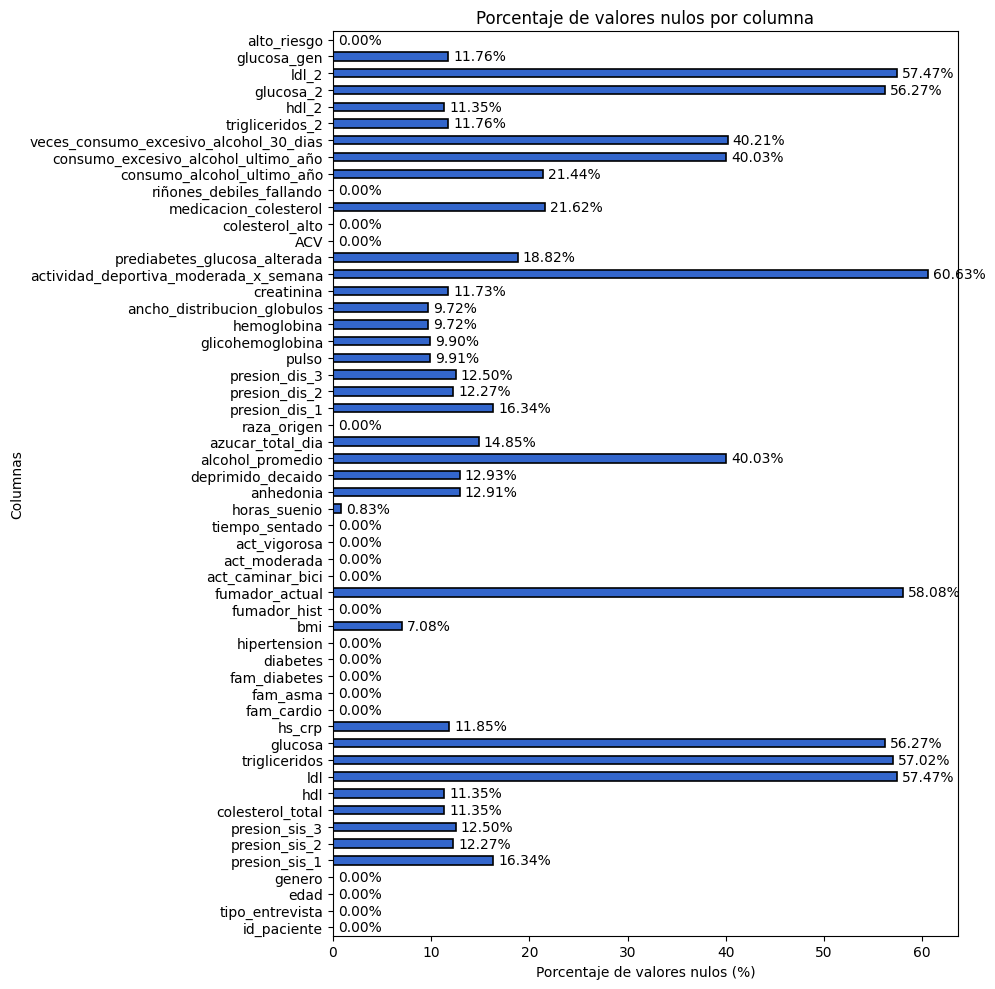

In [92]:
porcentaje_nulos = df_min.isna().mean().round(4) * 100

plt.figure(figsize=(10, 10))
porcentaje_nulos.plot(kind='barh', color="#3366CC", edgecolor='black', linewidth=1.2)

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Columnas')

for index, value in enumerate(porcentaje_nulos):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

In [93]:
if 'LBXSGL' in df_clean.columns:
    print(f"¡Encontramos Glucosa General! Faltantes: {df_clean['LBXSGL'].isnull().sum()}")
    # Comparar con la de ayuno
    print(f"Faltantes en Glucosa Ayuno (LBXGLU): {df_clean['LBXGLU'].isnull().sum()}")
else:
    print("La variable LBXSGL no está en este archivo.")

¡Encontramos Glucosa General! Faltantes: 655
Faltantes en Glucosa Ayuno (LBXGLU): 3133


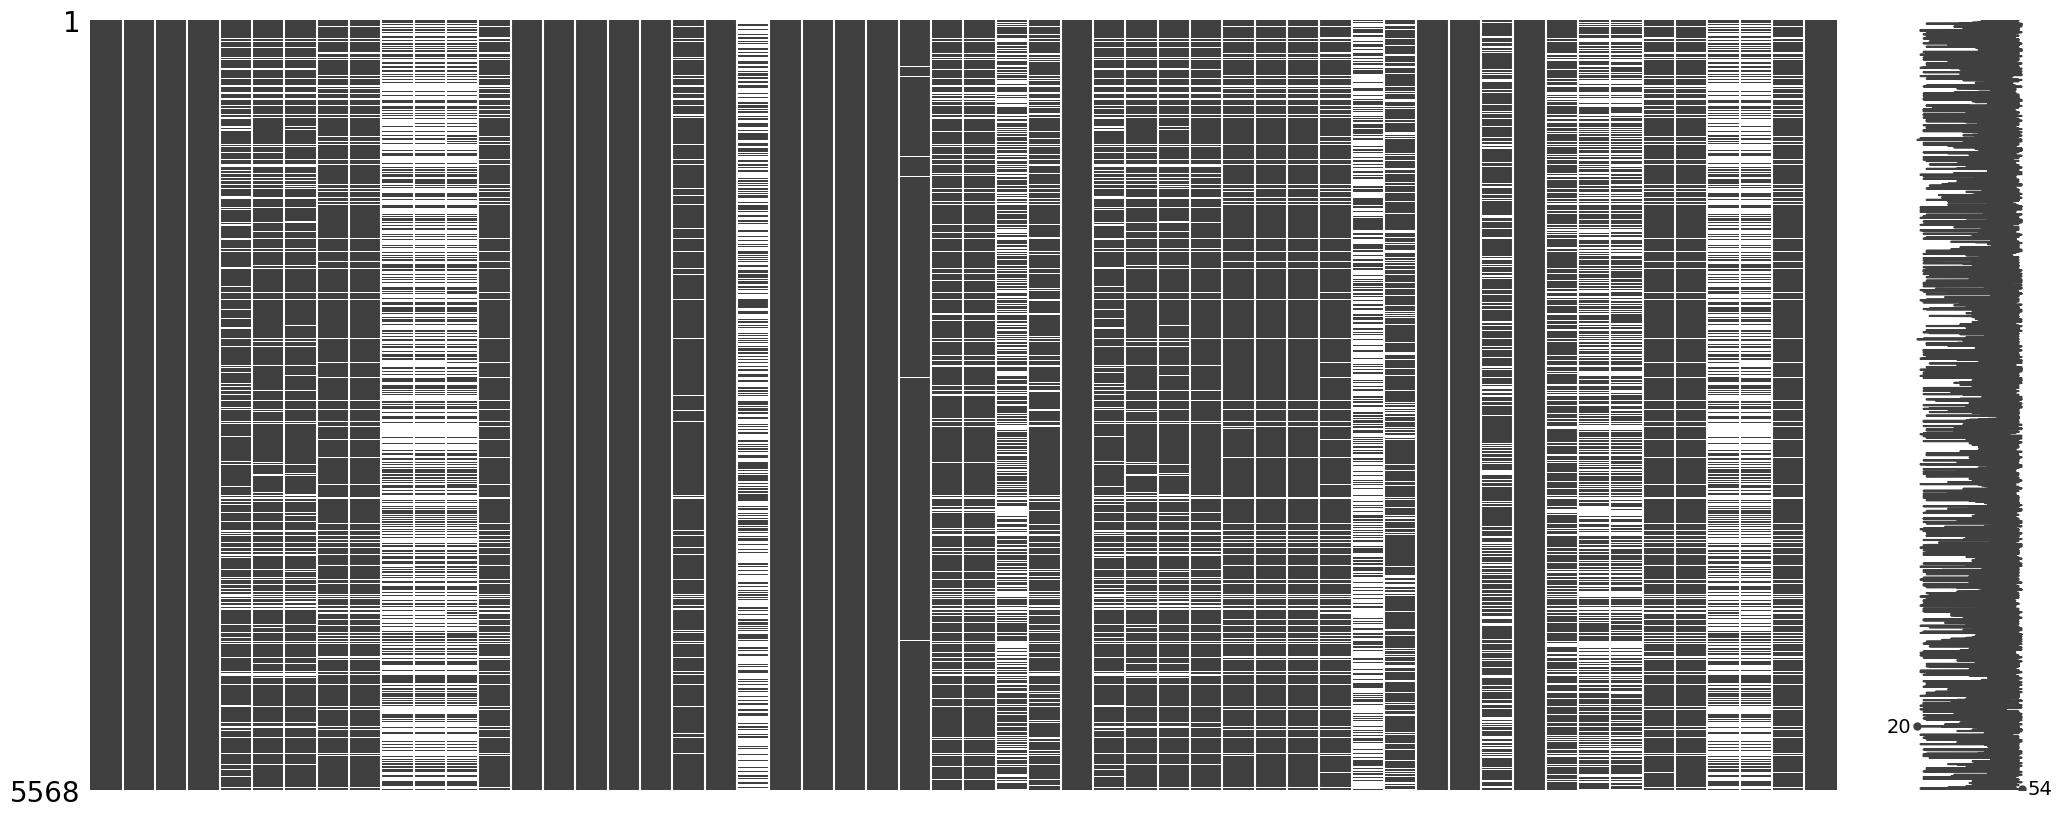

In [94]:
msno.matrix(df_min)
plt.show()

se pueden analizar algunas dependecias en los faltantes. Se analiza cada uno

Nombre de las variables con faltantes:
4. colesterol_total
5. hdl
6. ldl
7. trigliceridos
8. glucosa
9. hs_crp
10. bmi
11. fumador_actual
12. horas_suenio
13. anhedonia
14. deprimido_decaido
15. alcohol_promedio
16. azucar_total_dia
20. pulso
21. glicohemoglobina
22. hemoglobina
23. ancho_distribucion_globulos
24. creatinina
25. actividad_deportiva_moderada_x_semana
26. prediabetes_glucosa_alterada
27. medicacion_colesterol
28. consumo_alcohol_ultimo_año
29. consumo_excesivo_alcohol_ultimo_año
30. veces_consumo_excesivo_alcohol_30_dias

### **Faltantes presión**

<Figure size 1000x600 with 0 Axes>

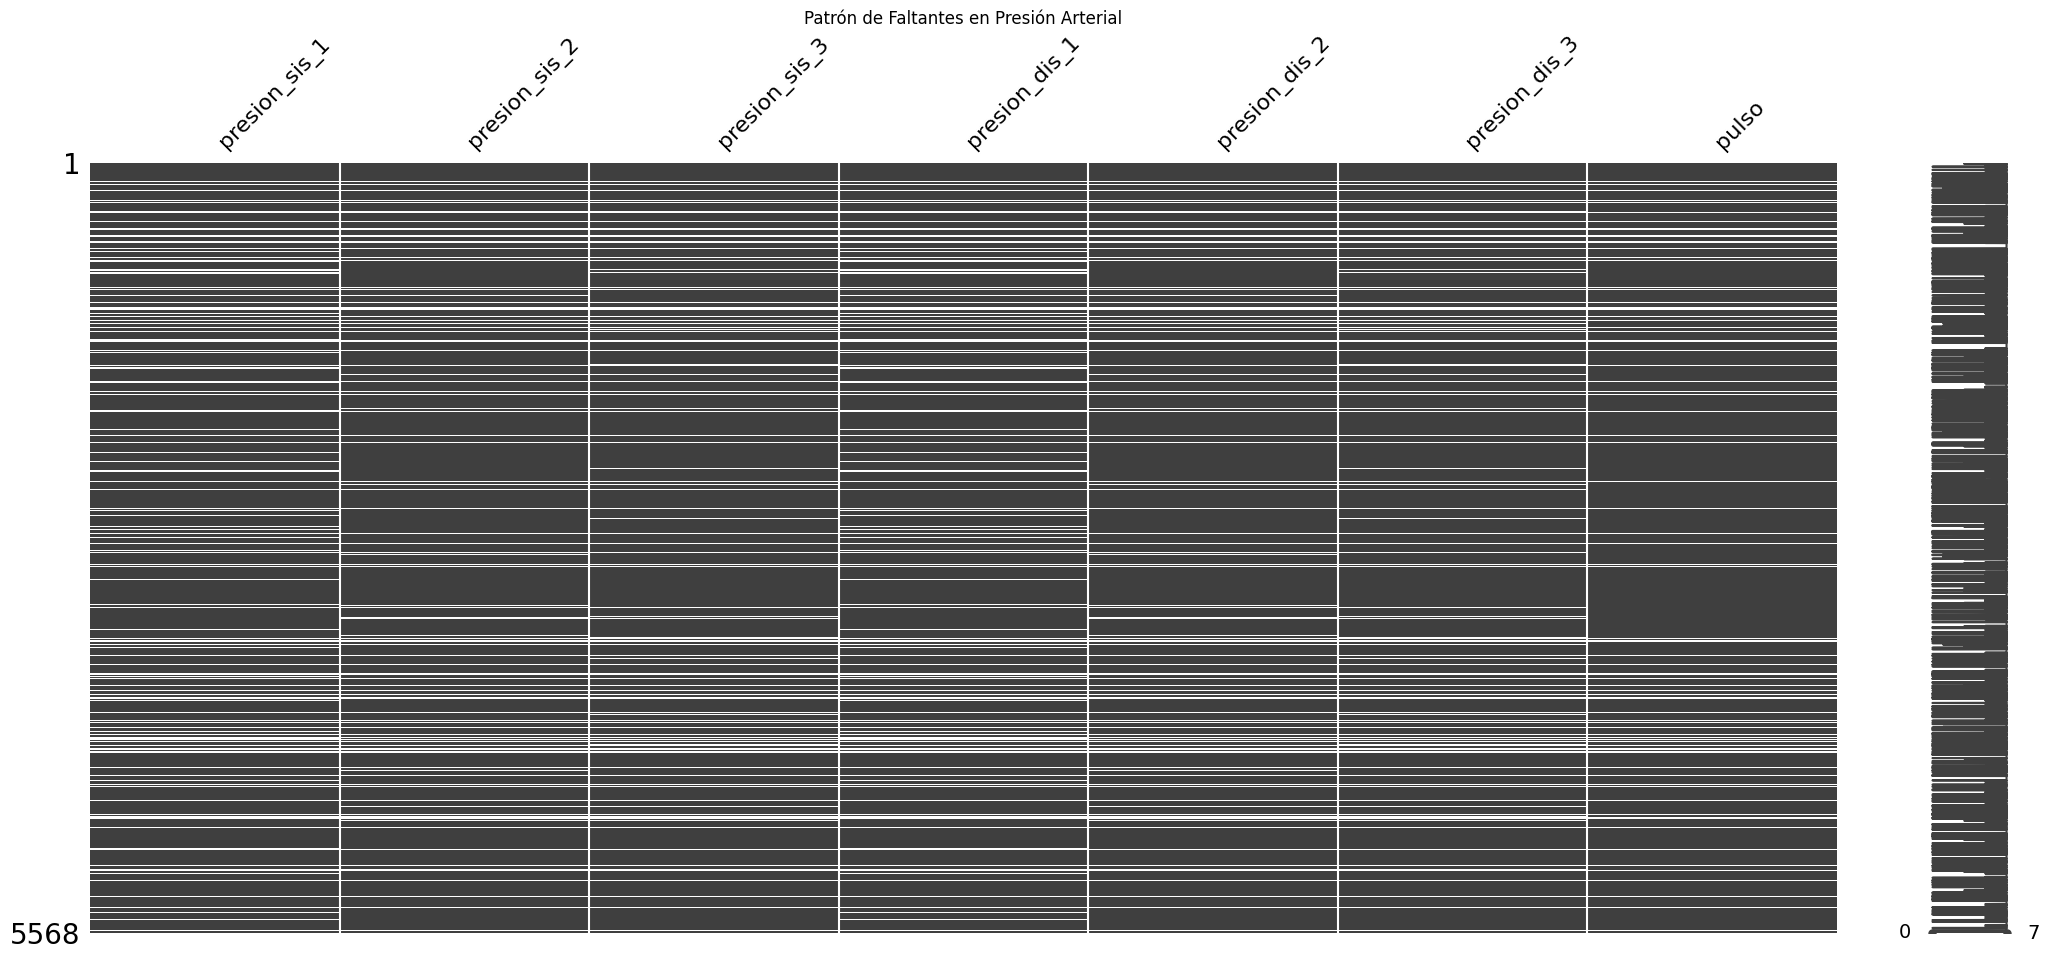

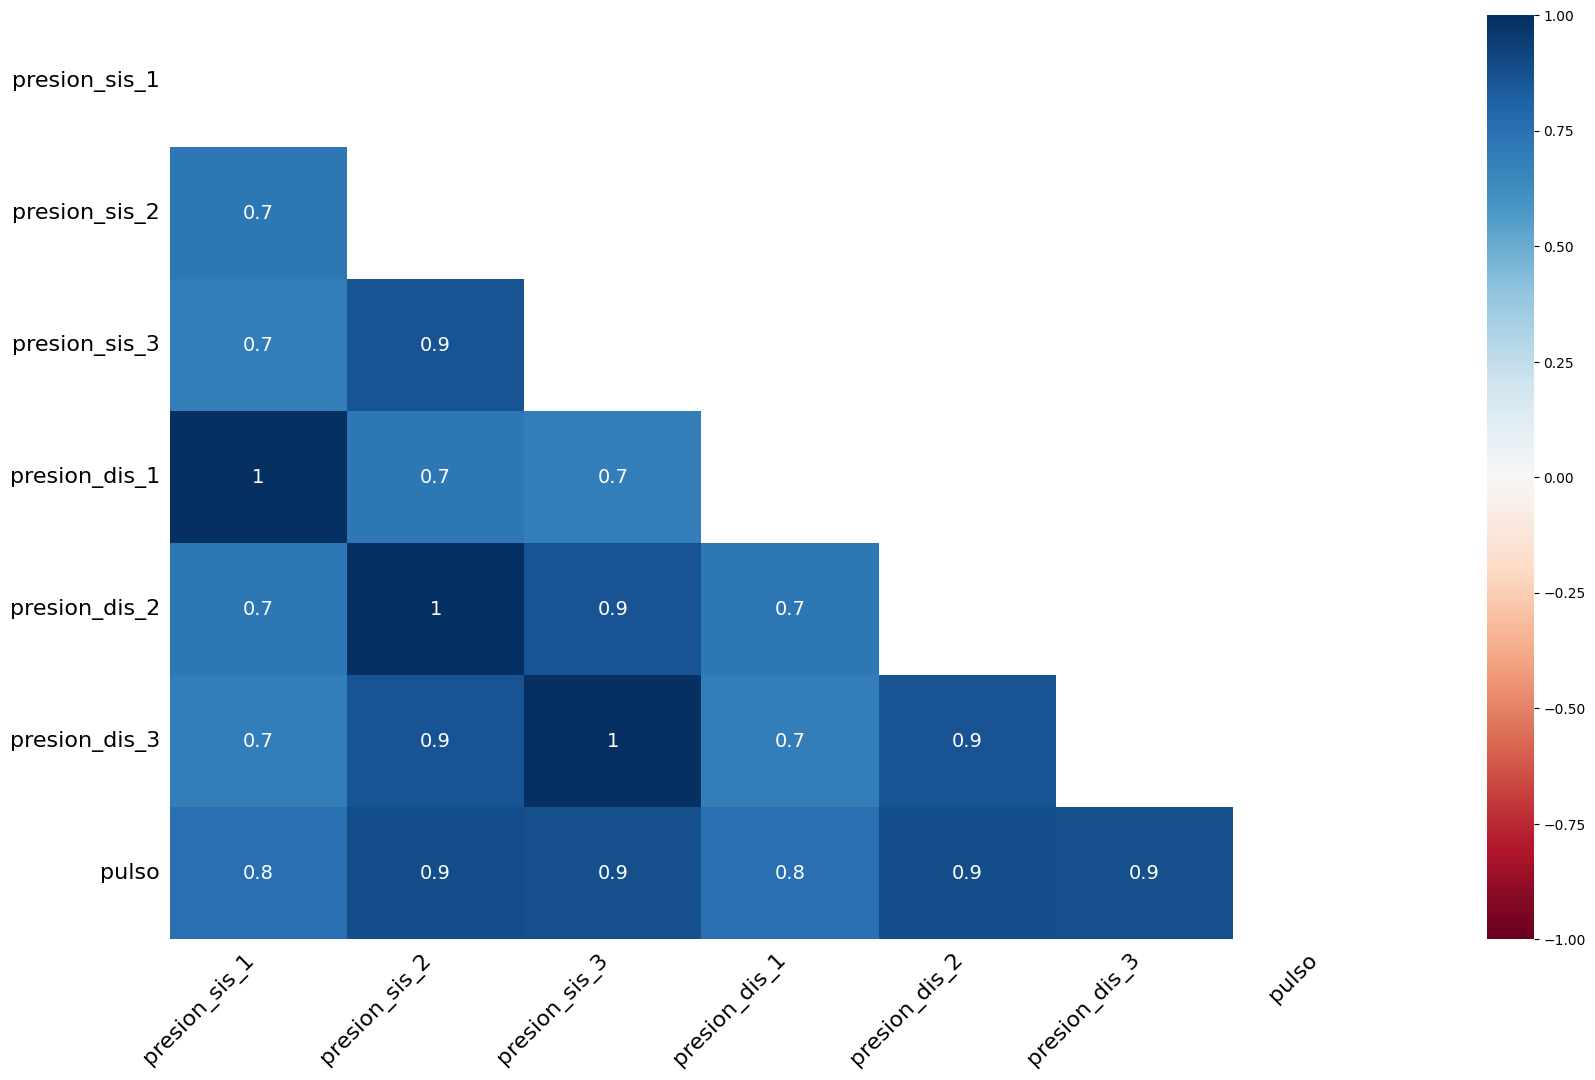

In [95]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Definimos las variables de presión
presion_vars = [
    'presion_sis_1', 'presion_sis_2', 'presion_sis_3',
    'presion_dis_1', 'presion_dis_2', 'presion_dis_3', 'pulso'
]

# 1. Visualizar el patrón de "bloque"
plt.figure(figsize=(10,6))
msno.matrix(df_min[presion_vars])
plt.title('Patrón de Faltantes en Presión Arterial')
plt.show()

# 2. Correlación de nulidad
# Un valor de 1.0 significa que si falta una, falta la otra (indica patrón MAR).
msno.heatmap(df_min[presion_vars])
plt.show()

In [96]:
# Si hay una diferencia significativa en la media de edad, es MAR confirmado.
print(df_min.groupby(df_min['presion_sis_1'].isnull())['edad'].mean())
print(df_min.groupby(df_min['presion_sis_1'].isnull())['genero'].mean())
print(df_min.groupby(df_min['presion_sis_1'].isnull())['bmi'].mean())



presion_sis_1
False    51.186131
True     53.117582
Name: edad, dtype: float64
presion_sis_1
False    1.510305
True     1.538462
Name: genero, dtype: float64
presion_sis_1
False    29.765384
True     30.568522
Name: bmi, dtype: float64


Existe alta correlación en los faltantes de presión. Faltan en bloque. Esto se puede dar en este dataset ya que a veces los pacientes no participan de todas las etapas que constituyen esta encuesta.

TIPO: MAR

### **Laboratorios**

<Axes: >

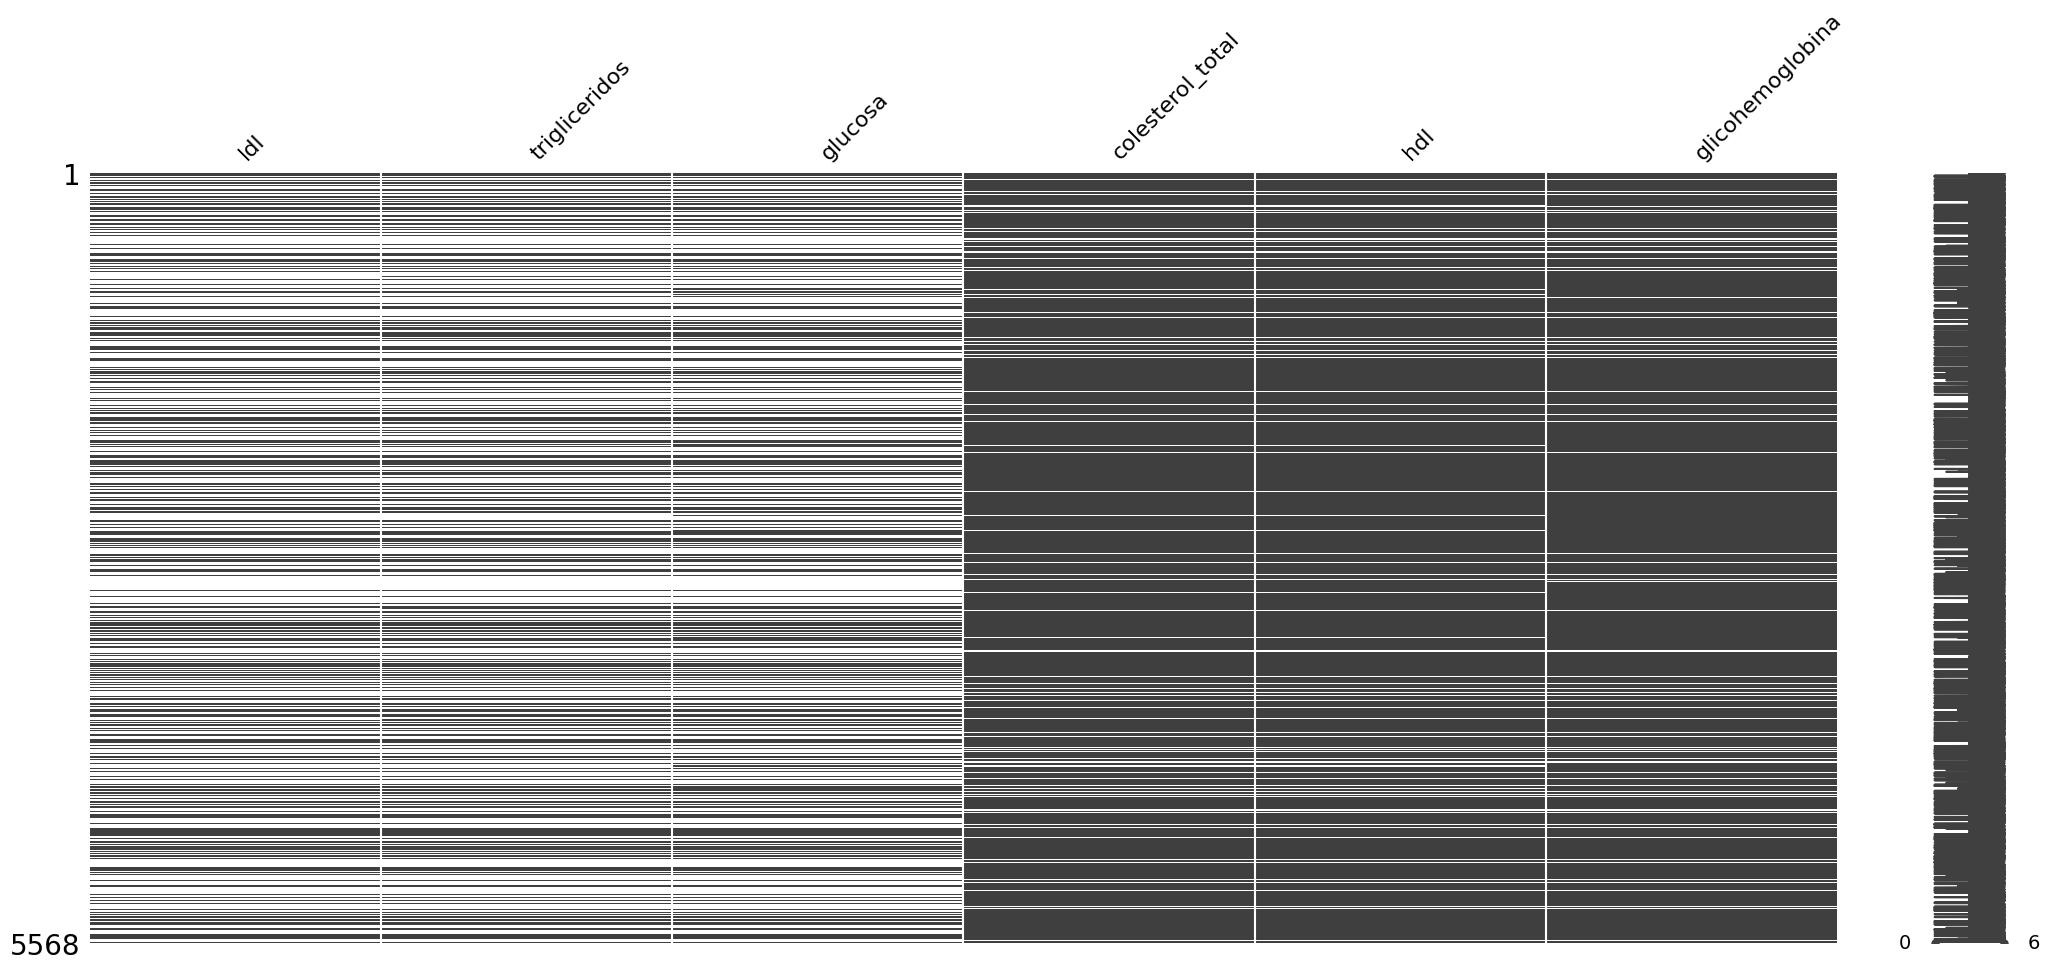

In [97]:
lab_vars = ['ldl', 'trigliceridos', 'glucosa', 'colesterol_total', 'hdl', 'glicohemoglobina']
msno.matrix(df_min[lab_vars])

Ya se observa un patrón en los faltantes.

In [98]:
# Crea una tabla de contingencia para ver si la falta de uno coincide con el otro
print(pd.crosstab(df_min['glucosa'].isnull(), df_min['trigliceridos'].isnull()))

trigliceridos  False  True 
glucosa                    
False           2393     42
True               0   3133


***GLUCOSA***

In [99]:
# # Traemos la columna de pesos desde df_clean a df_min usando el índice
# df_min['WTSAF2YR'] = df_clean['WTSAF2YR']

# # Creamos la marca de si el paciente fue seleccionado para la submuestra de ayuno
# # (Si el peso es > 0, fue seleccionado)
# df_min['seleccionado_ayuno'] = df_min['WTSAF2YR'].fillna(0) > 0

# # Realizamos la tabla de contingencia
# verificacion_ayuno = pd.crosstab(
#     df_min['seleccionado_ayuno'],
#     df_min['glucosa'].isnull(),
#     rownames=['¿Tiene peso de ayuno asignado?'],
#     colnames=['¿La Glucosa es NaN?']
# )

# print("TABLA DE VERIFICACIÓN DE SUBMUESTRA (BLOQUE DE AYUNO)")
# print("-" * 50)
# print(verificacion_ayuno)

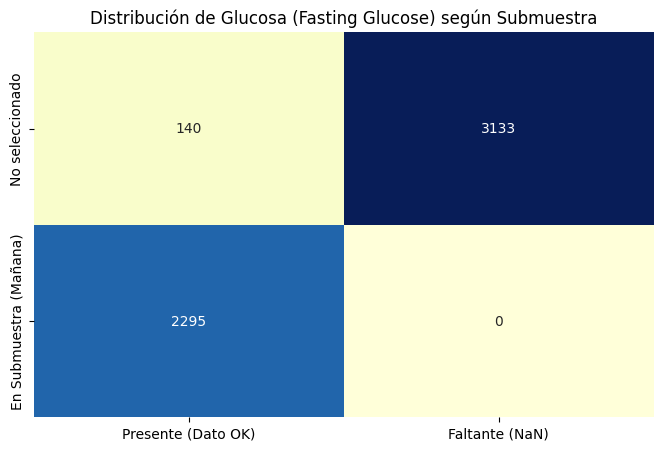

--------------------------------------------------
ANÁLISIS DE COBERTURA DE GLUCOSA EN AYUNO:
- Pacientes con dato oficial: 2295 (41.2%)
- Faltantes por diseño (Turno tarde): 3133 (56.3%)
--------------------------------------------------


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Aseguramos que la columna exista en df_min antes de graficar
# Usamos df_clean para traer el peso de ayuno
df_min['WTSAF2YR'] = df_clean['WTSAF2YR']
df_min['seleccionado_ayuno'] = df_min['WTSAF2YR'].fillna(0) > 0

# 2. Crear la tabla de contingencia con nombres claros
# Usamos rename para no perder el rastro de qué es qué
tabla_visual = pd.crosstab(
    df_min['seleccionado_ayuno'],
    df_min['glucosa'].isnull()
)
tabla_visual.index = ['No seleccionado', 'En Submuestra (Mañana)']
tabla_visual.columns = ['Presente (Dato OK)', 'Faltante (NaN)']

# 3. Crear la visualización (Heatmap)
plt.figure(figsize=(8, 5))
sns.heatmap(tabla_visual, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

plt.title('Distribución de Glucosa (Fasting Glucose) según Submuestra', fontsize=12)
plt.show()

# 4. Cálculo de porcentajes usando los nombres de las columnas (más seguro que iloc)
total = tabla_visual.values.sum()
presentes_submuestra = tabla_visual.loc['En Submuestra (Mañana)', 'Presente (Dato OK)']
faltantes_no_submuestra = tabla_visual.loc['No seleccionado', 'Faltante (NaN)']

print("-" * 50)
print("ANÁLISIS DE COBERTURA DE GLUCOSA EN AYUNO:")
print(f"- Pacientes con dato oficial: {presentes_submuestra} ({ (presentes_submuestra/total)*100 :.1f}%)")
print(f"- Faltantes por diseño (Turno tarde): {faltantes_no_submuestra} ({ (faltantes_no_submuestra/total)*100 :.1f}%)")
print("-" * 50)

El análisis de la estructura de datos reveló que las variables críticas de laboratorio (Glucosa, Triglicéridos y LDL) presentan un patrón de datos faltantes de tipo MAR (Missing at Random), con una ausencia de registros del 56% de la muestra. Esta condición no responde a un error de recolección, sino al diseño muestral de la encuesta NHANES. Específicamente, estas pruebas bioquímicas se restringen exclusivamente a la submuestra de ayuno matutino (Morning Fasting Subsample) por razones de protocolo clínico. Se validó que la falta de estos datos guarda una correlación casi perfecta con la ausencia de pesos estadísticos de ayuno (WTSAF2YR), confirmando que los pacientes no seleccionados para esta submuestra no poseen el dato por diseño del estudio.

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/GLU_J.htm

glucosa:https://wwwn.cdc.gov/nchs/data/nhanes/public/2017/labmethods/GLU-J-MET-508.pdf

glucosa serica: https://wwwn.cdc.gov/nchs/data/nhanes/public/2017/labmethods/BIOPRO-J-MET-Glucose-508.pdf

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/GLU_J.htm#LBDGLUSI

hdl: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/HDL_J.

trigliceridos - ldl: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/TRIGLY_J.htm

In [101]:
# Buscamos cualquier columna que contenga "GLU" en su nombre
columnas_glucosa = [col for col in df_clean.columns if 'GLU' in col.upper()]
print("Columnas encontradas con 'GLU':")
print(columnas_glucosa)

# Verificamos si alguna de esas tiene menos faltantes que la nuestra
for col in columnas_glucosa:
    nulos = df_clean[col].isnull().sum()
    print(f"{col}: {nulos} faltantes")

Columnas encontradas con 'GLU':
['LBXGLU', 'LBDGLUSI']
LBXGLU: 3133 faltantes
LBDGLUSI: 3133 faltantes


no son faltantes por falta de conversion definitivamente

In [102]:
# 1. Aseguramos tener las dos columnas en nuestro entorno
# LBXGLU es la de ayuno, LBXSGL es la general
glucosa_ayuno = df_clean['LBXGLU']
glucosa_general = df_clean['LBXSGL']

# 2. Creamos la versión consolidada
# fillna rellena los huecos de la de ayuno con los valores de la general
glucosa_consolidada = glucosa_ayuno.fillna(glucosa_general)

# 3. Calculamos las estadísticas de recuperación
nulos_original = glucosa_ayuno.isnull().sum()
nulos_final = glucosa_consolidada.isnull().sum()
recuperados = nulos_original - nulos_final

print("--- RESULTADOS DE LA CONSOLIDACIÓN DE GLUCOSA ---")
print(f"Faltantes iniciales (Solo Ayuno): {nulos_original}")
print(f"Faltantes finales (Consolidada):   {nulos_final}")
print(f"PACIENTES RECUPERADOS:             {recuperados}")
print(f"Mejora en la cobertura:            { (recuperados / len(df_clean)) * 100 :.2f}% del total del dataset")

--- RESULTADOS DE LA CONSOLIDACIÓN DE GLUCOSA ---
Faltantes iniciales (Solo Ayuno): 3133
Faltantes finales (Consolidada):   604
PACIENTES RECUPERADOS:             2529
Mejora en la cobertura:            45.42% del total del dataset


In [103]:
# 1. Creamos una copia de trabajo para no alterar el original por error
df_trabajo = df_clean[['SEQN', 'LBXGLU', 'LBXSGL']].copy()

# 2. Creamos la columna consolidada 'glucosa_total'
# Prioriza LBXGLU (Ayuno). Si es NaN, toma LBXSGL (General).
df_trabajo['glucosa_total'] = df_trabajo['LBXGLU'].fillna(df_trabajo['LBXSGL'])

# 3. Creamos la bandera de contexto (Fasting Flag) para la IA
# 1 si el dato es de Ayuno oficial, 0 si es de la General o si era NaN
df_trabajo['es_ayuno_estricto'] = 0
df_trabajo.loc[df_trabajo['LBXGLU'].notnull(), 'es_ayuno_estricto'] = 1

# 4. Verificamos los resultados
total_filas = len(df_trabajo)
nulos_antes = df_trabajo['LBXGLU'].isnull().sum()
nulos_despues = df_trabajo['glucosa_total'].isnull().sum()
recuperados = nulos_antes - nulos_despues

print(f"--- REPORTE DE RECOSTRUCCIÓN ---")
print(f"Total de pacientes analizados: {total_filas}")
print(f"Pacientes sin glucosa al inicio: {nulos_antes}")
print(f"Pacientes sin glucosa al final:  {nulos_despues}")
print(f"Se pueden rescatar {recuperados} registros")

--- REPORTE DE RECOSTRUCCIÓN ---
Total de pacientes analizados: 5568
Pacientes sin glucosa al inicio: 3133
Pacientes sin glucosa al final:  604
Se pueden rescatar 2529 registros


Par comprobar si hizo entrevista online solamente, o acudió a hacerse examenes

In [104]:
# 1. Primero veamos si RIDSTATR está en df_clean y qué valores tiene
if 'RIDSTATR' in df_clean.columns:
    # Creamos la tabla comparando la Glucosa Consolidada (o la original) con el estado de examen
    # Nota: Usamos df_clean['LBXGLU'].fillna(df_clean['LBXSGL']) para representar la glucosa recuperada

    glucosa_temp = df_clean['LBXGLU'].fillna(df_clean['LBXSGL'])

    tabla_mar = pd.crosstab(
        df_clean['RIDSTATR'].map({1: 'Solo Entrevista (Casa)', 2: 'Entrevista + Examen (MEC)'}),
        glucosa_temp.isnull().map({True: 'Faltante (NaN)', False: 'Con Dato'}),
        rownames=['Estado del Participante'],
        colnames=['Estado Glucosa']
    )

    print("ANÁLISIS DE DATOS FALTANTES (MAR) EN DF_CLEAN")
    print("-" * 50)
    print(tabla_mar)
    print("-" * 50)

    # Calculamos el porcentaje de nulos que se explican por no haber ido al examen
    solo_entrevista_y_nulo = tabla_mar.loc['Solo Entrevista (Casa)', 'Faltante (NaN)']
    total_nulos = tabla_mar['Faltante (NaN)'].sum()

    print(f"Del total de nulos, el {(solo_entrevista_y_nulo/total_nulos)*100:.1f}% se debe a participantes que no fueron al examen médico.")
else:
    print("La columna 'RIDSTATR' no se encuentra en df_clean. Busca columnas similares con: [c for c in df_clean.columns if 'STAT' in c]")

ANÁLISIS DE DATOS FALTANTES (MAR) EN DF_CLEAN
--------------------------------------------------
Estado Glucosa             Con Dato  Faltante (NaN)
Estado del Participante                            
Entrevista + Examen (MEC)      4964             300
Solo Entrevista (Casa)            0             304
--------------------------------------------------
Del total de nulos, el 50.3% se debe a participantes que no fueron al examen médico.


In [105]:
# 1. Identificar quiénes tienen solo la versión SI
solo_si = df_clean[df_clean['LBXGLU'].isnull() & df_clean['LBDGLUSI'].notnull()]

# 2. Identificar quiénes tienen ambas
ambas = df_clean[df_clean['LBXGLU'].notnull() & df_clean['LBDGLUSI'].notnull()]

# 3. Identificar quiénes no tienen ninguna (los verdaderos faltantes)
ninguna = df_clean[df_clean['LBXGLU'].isnull() & df_clean['LBDGLUSI'].isnull()]

print(f"Pacientes a rescatar (Solo tienen LBDGLUSI): {solo_si.shape[0]}")
print(f"Pacientes con datos en ambas columnas: {ambas.shape[0]}")
print(f"Pacientes sin datos en ninguna (Faltante Real): {ninguna.shape[0]}")

Pacientes a rescatar (Solo tienen LBDGLUSI): 0
Pacientes con datos en ambas columnas: 2435
Pacientes sin datos en ninguna (Faltante Real): 3133


In [106]:
# Verificamos HDL (LBDHDD) contra el estado de examen (para comprobar que definitivamente no tiene datos de examenes de laboratorio)
verificacion_hdl = pd.crosstab(
    df_clean['RIDSTATR'],
    df_clean['LBDHDD'].isnull()
)
print(verificacion_hdl)

LBDHDD    False  True 
RIDSTATR              
1.0           0    304
2.0        4936    328


TIPO: MAR

Los faltantes son porque los pacientes no fueron elegidos para hacerse estudio con el ayuno o porque hicieron entrevista online.

***TRIGLICERIDOS***

In [107]:
# Si la correlación es 1.0, es exactamente el mismo dato en distinta unidad
print(df_clean[['LBXTR', 'LBDSTRSI']].corr())

             LBXTR  LBDSTRSI
LBXTR     1.000000  0.998812
LBDSTRSI  0.998812  1.000000


In [108]:
# 1. Comparamos los nulos de ambas
print(f"Faltantes en trigliceridos (LBXTR - mg/dL): {df_clean['LBXTR'].isnull().sum()}")
print(f"Faltantes en LBDSTRSI (mmol/L): {df_clean['LBDSTRSI'].isnull().sum()}")

# 2. Verificamos la correlación
# Si es 1.0, son la misma variable escalada
correlacion = df_clean['LBXTR'].corr(df_clean['LBDSTRSI'])
print(f"\nCorrelación entre ambas: {correlacion:.4f}")

# 3. Vemos si hay casos donde una está y la otra no
casos_recuperables = df_clean[df_clean['LBXTR'].isnull() & df_clean['LBDSTRSI'].notnull()].shape[0]
print(f"Casos donde LBDSTRSI podría 'salvar' a LBXTR: {casos_recuperables}")

Faltantes en trigliceridos (LBXTR - mg/dL): 3175
Faltantes en LBDSTRSI (mmol/L): 655

Correlación entre ambas: 0.9988
Casos donde LBDSTRSI podría 'salvar' a LBXTR: 2531


In [109]:
# 1. Verificamos la correlación para confirmar que son la misma medida
correlacion_trig = df_clean['LBXTR'].corr(df_clean['LBDSTRSI'])

# 2. Buscamos casos donde falta la principal pero está la secundaria
casos_recuperables_trig = df_clean[df_clean['LBXTR'].isnull() & df_clean['LBDSTRSI'].notnull()].shape[0]

print(f"--- ANÁLISIS DE UNIDADES (TRIGLICÉRIDOS) ---")
print(f"Correlación mg/dL vs mmol/L: {correlacion_trig:.4f}")
print(f"Casos recuperables mediante conversión: {casos_recuperables_trig}")

# 3. Comprobamos la relación con el estado de examen (RIDSTATR)
tabla_trig_stat = pd.crosstab(
    df_clean['RIDSTATR'].map({1: 'Solo Entrevista', 2: 'Entrevista + Examen'}),
    df_clean['LBXTR'].isnull().map({True: 'Faltante', False: 'Con Dato'})
)
print("\n--- RELACIÓN CON ESTADO DE EXAMEN ---")
print(tabla_trig_stat)

--- ANÁLISIS DE UNIDADES (TRIGLICÉRIDOS) ---
Correlación mg/dL vs mmol/L: 0.9988
Casos recuperables mediante conversión: 2531

--- RELACIÓN CON ESTADO DE EXAMEN ---
LBXTR                Con Dato  Faltante
RIDSTATR                               
Entrevista + Examen      2393      2871
Solo Entrevista             0       304


In [110]:
# # 1. Recuperamos los datos (Fórmula de conversión: mmol/L * 88.57 = mg/dL)
# df_min['trigliceridos'] = df_min['trigliceridos'].fillna(df_clean['LBDSTRSI'] * 88.57)

# # 2. Verificamos cuántos faltantes quedan ahora
# nuevos_faltantes = df_min['trigliceridos'].isnull().sum()
# print(f"Faltantes finales en trigliceridos: {nuevos_faltantes} (¡Bajamos de 3175 a {nuevos_faltantes}!)")

In [111]:
# Relación entre Triglicéridos y la Submuestra de Ayuno
df_clean['tiene_peso_ayuno'] = df_clean['WTSAF2YR'].fillna(0) > 0

tabla_trig_ayuno = pd.crosstab(
    df_clean['tiene_peso_ayuno'],
    df_clean['LBXTR'].isnull(),
    rownames=['¿Está en Submuestra Ayuno?'],
    colnames=['¿Triglicéridos es NaN?']
)

print("\n--- RELACIÓN CON SUBMUESTRA DE AYUNO ---")
print(tabla_trig_ayuno)


--- RELACIÓN CON SUBMUESTRA DE AYUNO ---
¿Triglicéridos es NaN?      False  True 
¿Está en Submuestra Ayuno?              
False                         135   3138
True                         2258     37


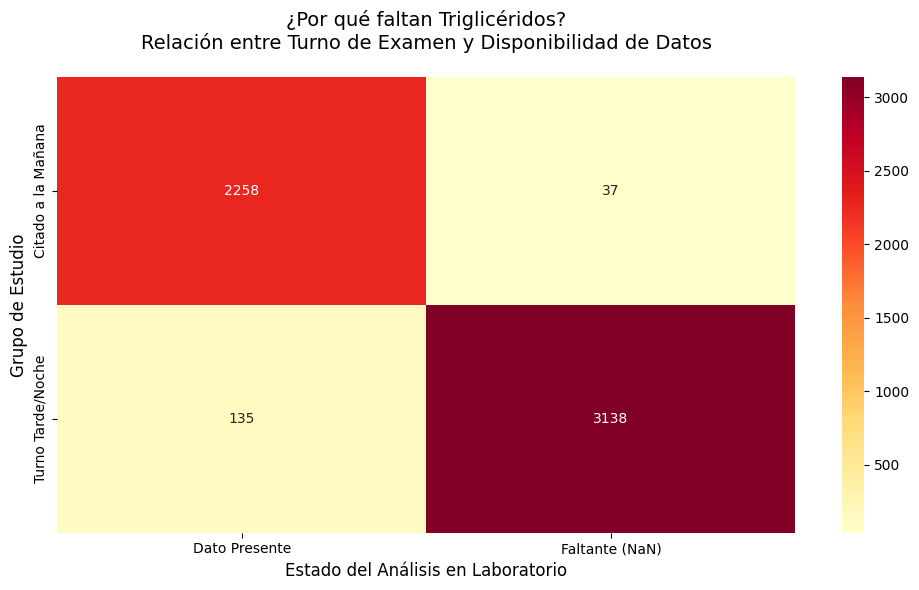


LECTURA DEL GRÁFICO:
1. El bloque de 'Citado a la Mañana' concentra casi todos los nulos.
2. Esto demuestra que la falta de dato es ESTRUCTURAL (Protocolo del NHANES).
3. Los nulos en el grupo de 'Mañana' son fallos técnicos menores, ideales para recuperar con MICE.


In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparar los datos para el gráfico
# Mapeamos los valores para que el gráfico sea autoexplicativo
df_plot = df_clean.copy()
df_plot['Submuestra'] = df_plot['WTSAF2YR'].fillna(0) > 0
df_plot['Submuestra'] = df_plot['Submuestra'].map({True: 'Citado a la Mañana', False: 'Turno Tarde/Noche'})
df_plot['Estado_Dato'] = df_plot['LBXTR'].isnull().map({True: 'Faltante (NaN)', False: 'Dato Presente'})

# 2. Crear la tabla de contingencia
tabla_visual = pd.crosstab(df_plot['Submuestra'], df_plot['Estado_Dato'])

# 3. Graficar
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_visual, annot=True, fmt="d", cmap="YlOrRd", cbar=True)

plt.title('¿Por qué faltan Triglicéridos?\nRelación entre Turno de Examen y Disponibilidad de Datos', fontsize=14, pad=20)
plt.ylabel('Grupo de Estudio', fontsize=12)
plt.xlabel('Estado del Análisis en Laboratorio', fontsize=12)

plt.tight_layout()
plt.show()

# Resumen explicativo
print("\nLECTURA DEL GRÁFICO:")
print(f"1. El bloque de '{df_plot['Submuestra'].unique()[1]}' concentra casi todos los nulos.")
print("2. Esto demuestra que la falta de dato es ESTRUCTURAL (Protocolo del NHANES).")
print("3. Los nulos en el grupo de 'Mañana' son fallos técnicos menores, ideales para recuperar con MICE.")

TIPO: MAR

Por entrevista online o porque falta rescatar algunos de datos de otra columna

### ***Colesterol total***

In [113]:
# 1. Buscamos variables relacionadas al Colesterol Total
cols_tc = [col for col in df_clean.columns if 'LBXTC' in col.upper() or 'LBDTCSI' in col.upper()]
print(f"Variables encontradas: {cols_tc}")

# 2. Verificamos nulos y correlación
if 'LBDTCSI' in df_clean.columns:
    correlacion_tc = df_clean['LBXTC'].corr(df_clean['LBDTCSI'])
    recuperables_tc = df_clean[df_clean['LBXTC'].isnull() & df_clean['LBDTCSI'].notnull()].shape[0]

    print(f"\n--- ANÁLISIS DE COLESTEROL TOTAL ---")
    print(f"Nulos en LBXTC (mg/dL): {df_clean['LBXTC'].isnull().sum()}")
    print(f"Correlación mg/dL vs mmol/L: {correlacion_tc:.4f}")
    print(f"Casos recuperables por conversión: {recuperables_tc}")

Variables encontradas: ['LBXTC', 'LBDTCSI']

--- ANÁLISIS DE COLESTEROL TOTAL ---
Nulos en LBXTC (mg/dL): 632
Correlación mg/dL vs mmol/L: 1.0000
Casos recuperables por conversión: 0


In [119]:
# Filtramos solo a los que fueron al examen físico
fueron_al_examen = df_clean[df_clean['RIDSTATR'] == 2]

# Vemos si a los que les falta Colesterol, también les falta Glucosa y HDL
nulos_seriales = fueron_al_examen[
    fueron_al_examen['LBXTC'].isnull() &
    fueron_al_examen['LBDHDD'].isnull()
].shape[0]

print(f"Pacientes que fueron al examen pero no tienen NINGÚN laboratorio: {nulos_seriales}")
print(f"Esto representa el {(nulos_seriales/328)*100:.1f}% de tus nulos misteriosos.")

Pacientes que fueron al examen pero no tienen NINGÚN laboratorio: 328
Esto representa el 100.0% de tus nulos misteriosos.


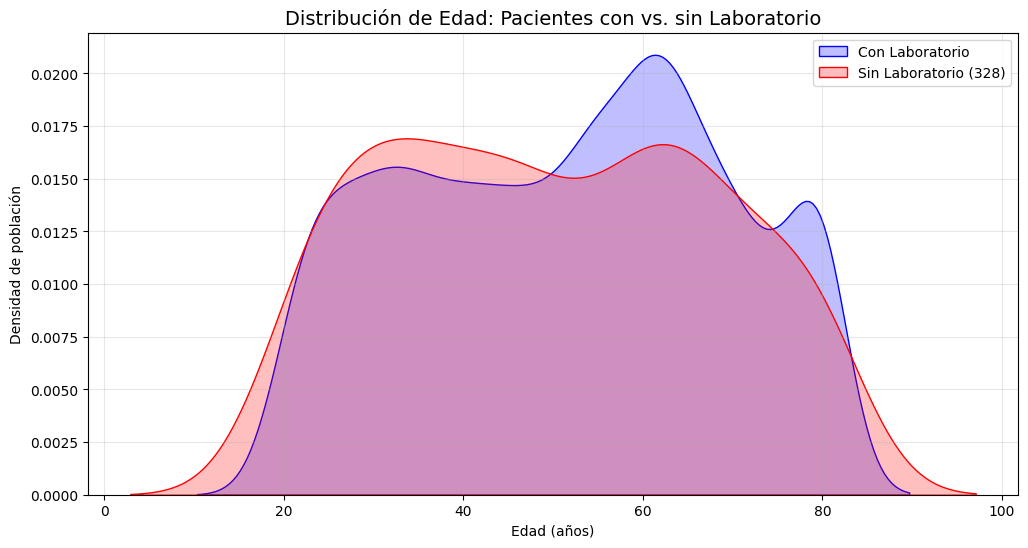

--- ESTADÍSTICAS DE EDAD (Grupo de 328) ---
count    328.000000
mean      49.826220
std       18.145613
min       20.000000
25%       34.000000
50%       48.500000
75%       65.000000
max       80.000000
Name: RIDAGEYR, dtype: float64


In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Creamos los grupos para comparar
# Grupo A: Fue al examen y TIENE laboratorio
con_lab = fueron_al_examen[fueron_al_examen['LBXTC'].notnull()]

# Grupo B: Fue al examen pero NO TIENE laboratorio (los 328)
sin_lab_328 = fueron_al_examen[fueron_al_examen['LBXTC'].isnull()]

# 2. Graficamos la distribución
plt.figure(figsize=(12, 6))
sns.kdeplot(con_lab['RIDAGEYR'], label='Con Laboratorio', fill=True, color='blue')
sns.kdeplot(sin_lab_328['RIDAGEYR'], label='Sin Laboratorio (328)', fill=True, color='red')

plt.title('Distribución de Edad: Pacientes con vs. sin Laboratorio', fontsize=14)
plt.xlabel('Edad (años)')
plt.ylabel('Densidad de población')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 3. Estadísticos rápidos
print("--- ESTADÍSTICAS DE EDAD (Grupo de 328) ---")
print(sin_lab_328['RIDAGEYR'].describe())

Hay 632 nulos de los cuales, 304 son de los que hicieron la entrevista online.

Vemos en el grafico que los que no tienen laboratorio estan entre los 34 y 65 años. Va a ser importante la imputaciónn aqui.

En la documetación se menciona que se perdieron 697 datos de esta columna.

TIPO: MAR


### ***HDL***

In [120]:
# Buscamos variables de HDL
cols_hdl = [col for col in df_clean.columns if 'LBDHDD' in col.upper()]
print(f"Variables encontradas para HDL: {cols_hdl}")

# Verificamos si existe la versión en unidades SI (LBDHDDSI) y si podemos rescatar algo
if 'LBDHDDSI' in df_clean.columns:
    recuperables_hdl = df_clean[df_clean['LBDHDD'].isnull() & df_clean['LBDHDDSI'].notnull()].shape[0]
    print(f"Casos recuperables en HDL mediante conversión: {recuperables_hdl}")
else:
    print("No hay columna de unidades SI para HDL.")

Variables encontradas para HDL: ['LBDHDD', 'LBDHDDSI']
Casos recuperables en HDL mediante conversión: 0


| Variable | Tipo | % faltantes | Tipo de faltante | Imputación |
| --- | --- | --- | --- | --- |
| edad | num | No tiene |  |  |
| genero | num | No tiene |  |  |
| presion_sis_1 | num | 16,34% | MAR |  |
| presion_sis_2 | num | 12,27% | MAR |  |
| presion_sis_3 | num | 12,50% | MAR |  |
| colesterol_total | num | 11.35% | MAR |  |
| hdl |  |  |  |  |
| ldl |  |  |  |  |
| trigliceridos | num | 54,54% | MAR |  |
| glucosa | num | 53,74% | MAR |  |
| hs_crp |  |  |  |  |
| fam_cardio | num | No tiene |  |  |
| fam_asma | num | No tiene |  |  |
| fam_diabetes | num | No tiene |  |  |
| diabetes | num | No tiene |  |  |
| hipertension | num | No tiene |  |  |
| bmi |  |  |  |  |
| fumador_hist | num | No tiene |  |  |
| fumador_actual |  |  |  |  |
| act_caminar_bici | num | No tiene |  |  |
| act_moderada | num | No tiene |  |  |
| act_vigorosa | num | No tiene |  |  |
| tiempo_sentado | num | No tiene |  |  |
| horas_suenio |  |  |  |  |
| anhedonia |  |  |  |  |
| deprimido_decaido |  |  |  |  |
| alcohol_promedio |  |  |  |  |
| azucar_total_dia |  |  |  |  |
| raza_origen | num | No tiene |  |  |
| presion_dis_1 | num | 16,34% | MAR |  |
| presion_dis_2 | num | 12,27% | MAR |  |
| presion_dis_3 | num | 12,50% | MAR |  |
| pulso |  |  |  |  |
| glicohemoglobina |  |  |  |  |
| hemoglobina |  |  |  |  |
| ancho_distribucion_globulos |  |  |  |  |
| creatinina |  |  |  |  |
| actividad_deportiva_moderada_x_semana |  |  |  |  |
| prediabetes_glucosa_alterada |  |  |  |  |
| ACV | num | No tiene |  |  |
| colesterol_alto | num | No tiene |  |  |
| medicacion_colesterol |  |  |  |  |
| riñones_debiles_fallando | num | No tiene |  |  |
| consumo_alcohol_ultimo_año |  |  |  |  |
| consumo_excesivo_alcohol_ultimo_año |  |  |  |  |
| veces_consumo_excesivo_alcohol_30_dias |  |  |  |  |
| alto_riesgo |  target


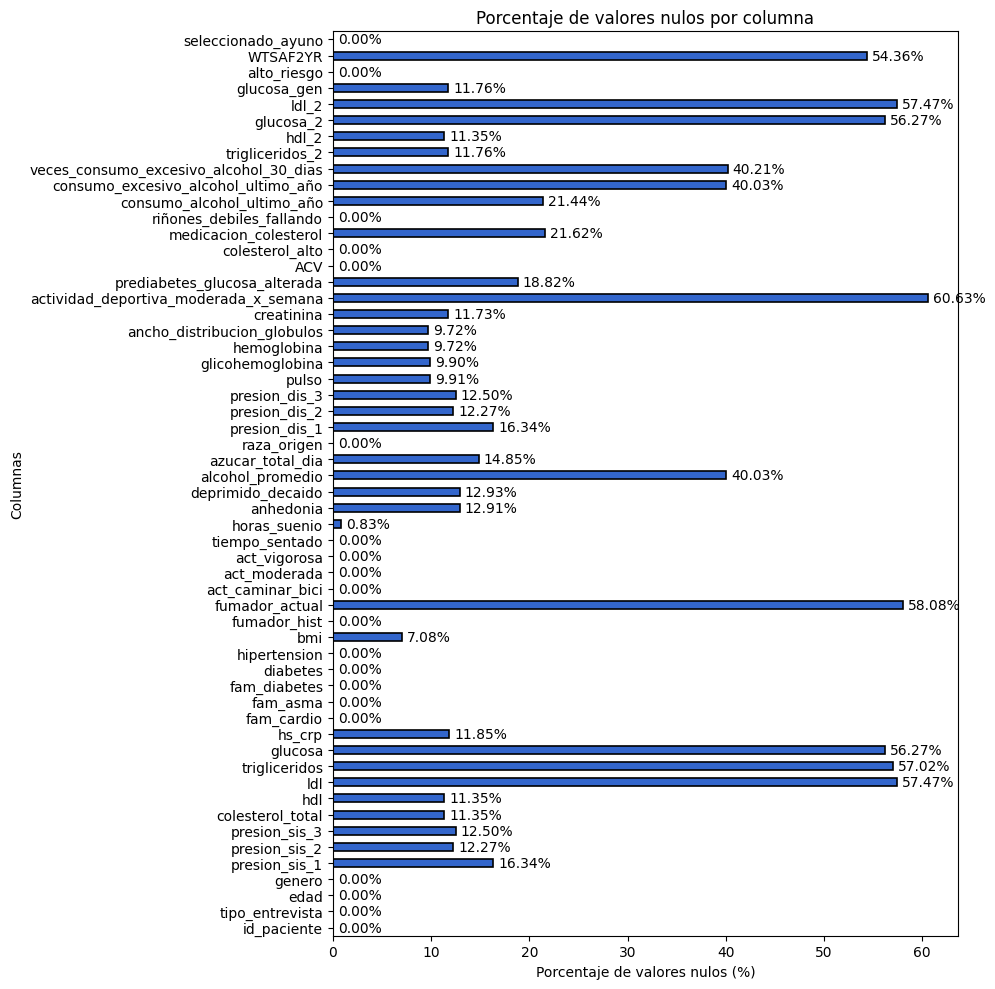

In [114]:
porcentaje_nulos = df_min.isna().mean().round(4) * 100

plt.figure(figsize=(10, 10))
porcentaje_nulos.plot(kind='barh', color="#3366CC", edgecolor='black', linewidth=1.2)

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Columnas')

for index, value in enumerate(porcentaje_nulos):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

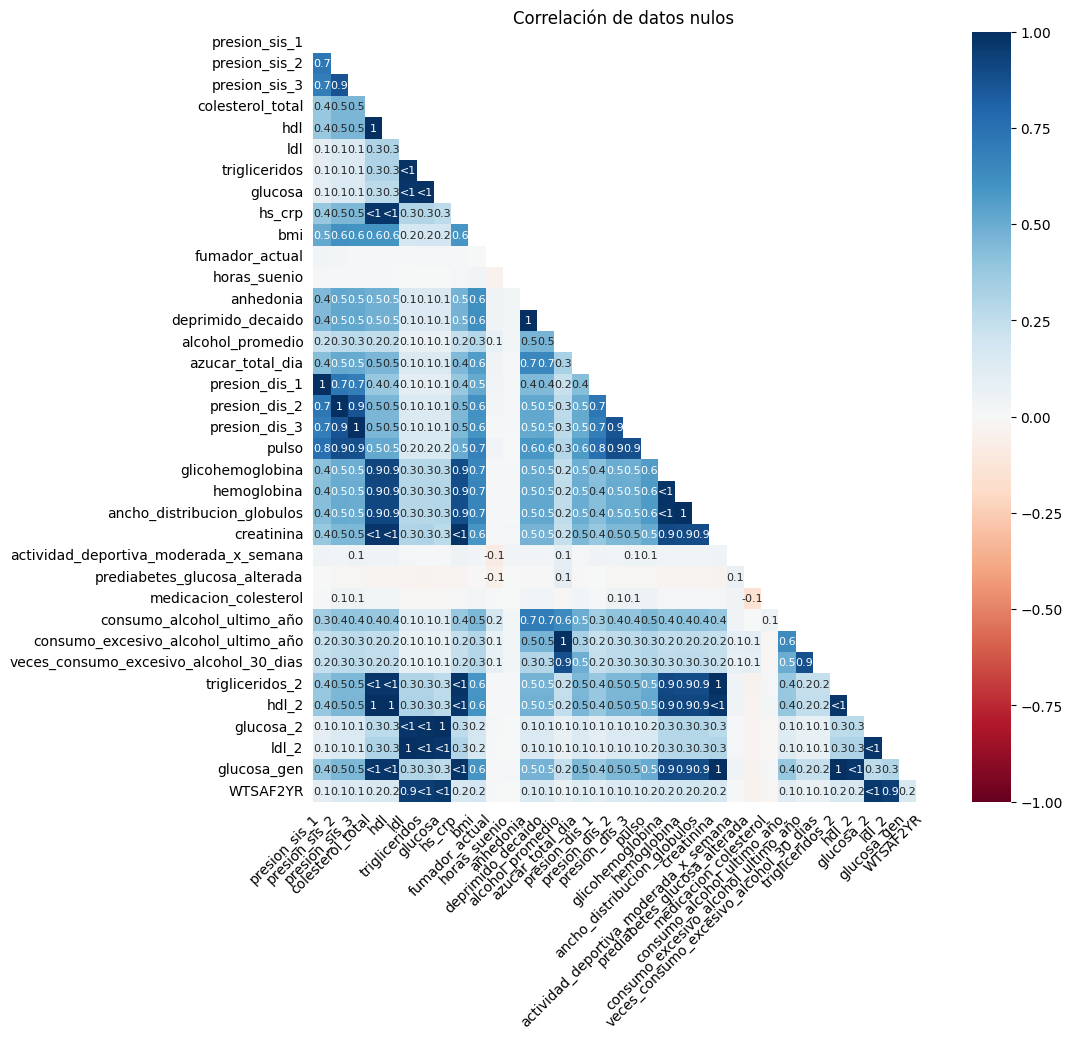

In [115]:
msno.heatmap(df_min, fontsize=10, figsize=(10,10))
plt.title("Correlación de datos nulos", fontsize=12)
plt.show()

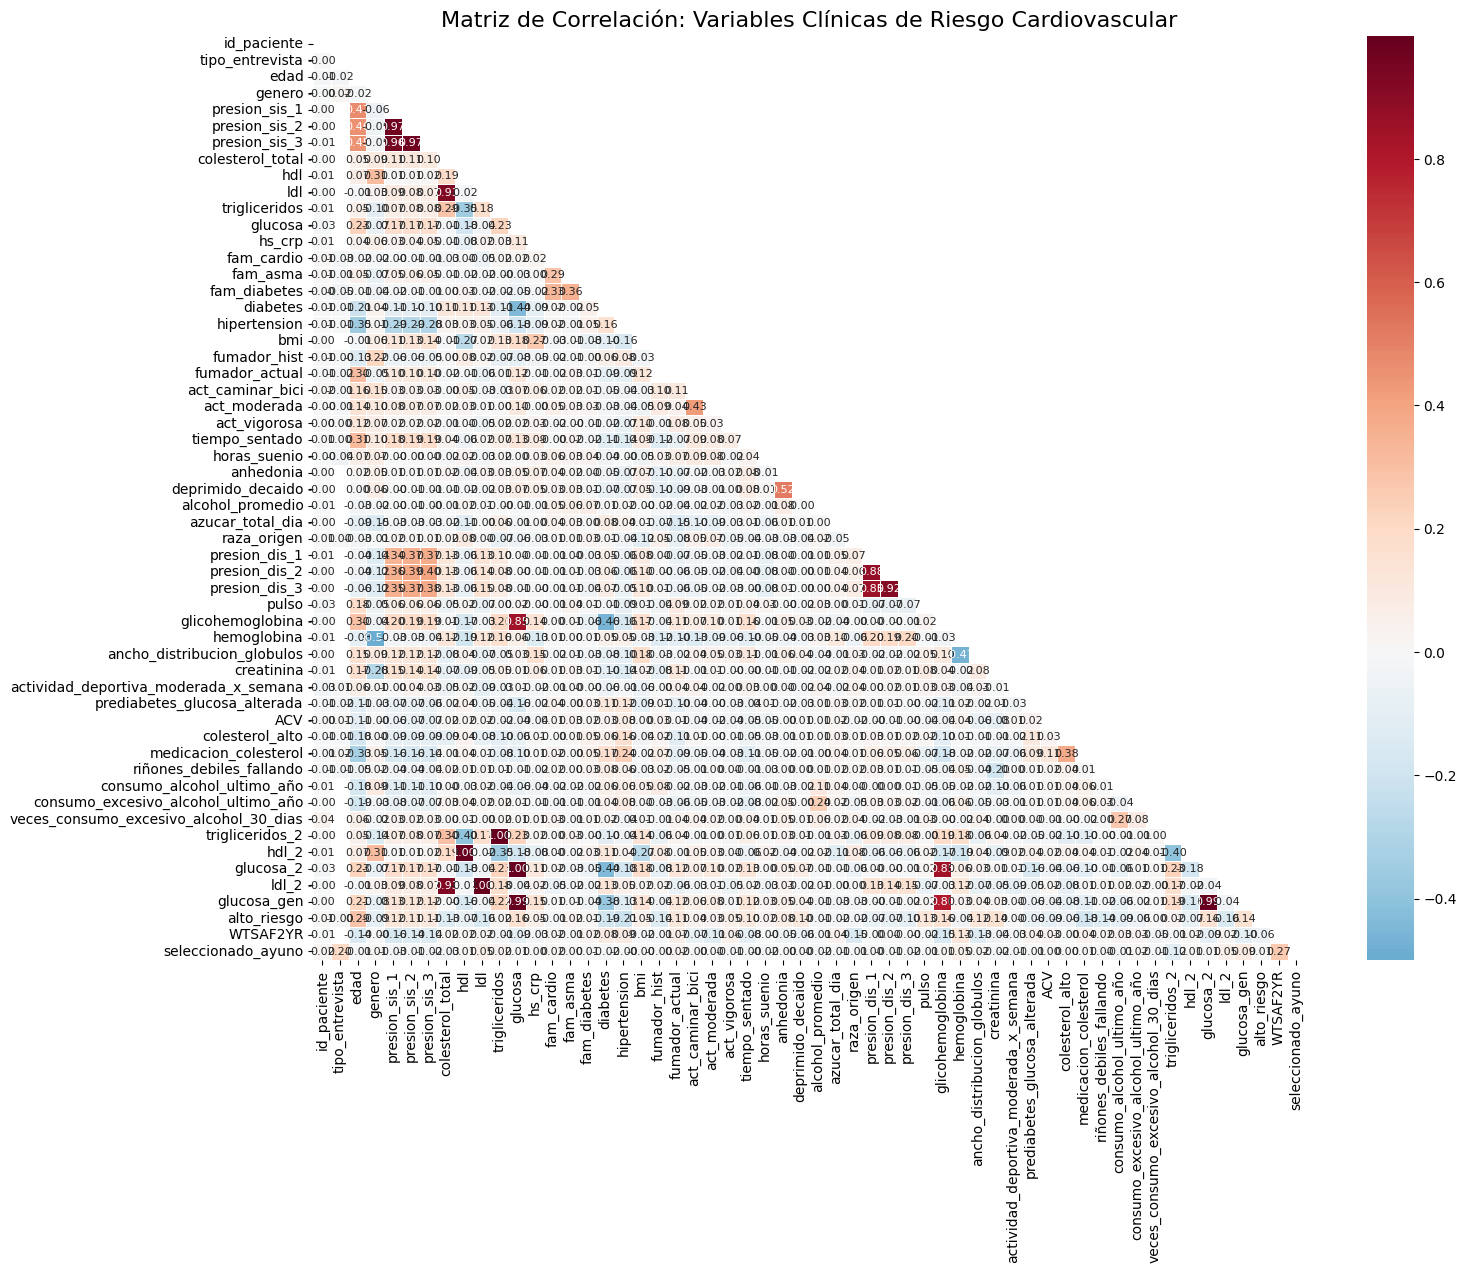

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Calculamos la matriz de correlación (usamos Spearman si hay variables no normales)
corr_matrix = df_min.corr(method='pearson')

# 2. Configuramos el tamaño de la figura
plt.figure(figsize=(16, 12))

# 3. Creamos un mapa de calor (Heatmap)
# Usamos una máscara para ver solo la mitad inferior (espejada) y que sea más legible
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,           # Muestra los números
            fmt=".2f",            # Dos decimales
            cmap='RdBu_r',        # Rojo para positiva, Azul para negativa
            center=0,
            linewidths=0.5,
            annot_kws={"size": 8}) # Tamaño de letra de los números

plt.title('Matriz de Correlación: Variables Clínicas de Riesgo Cardiovascular', fontsize=16)
plt.show()

| Variable | Tipo | % faltantes | Tipo de faltante | Imputación |
| --- | --- | --- | --- | --- |
| edad | num | No tiene |  |  |
| genero | num | No tiene |  |  |
| presion_sis_1 | num | 16,34% | MAR |  |
| presion_sis_2 | num | 12,27% | MAR |  |
| presion_sis_3 | num | 12,50% | MAR |  |
| colesterol_total |  |  |  |  |
| hdl |  |  |  |  |
| ldl |  |  |  |  |
| trigliceridos |  |  |  |  |
| glucosa |  |  |  |  |
| hs_crp |  |  |  |  |
| fam_cardio |  |  |  |  |
| fam_asma |  |  |  |  |
| fam_diabetes |  |  |  |  |
| diabetes |  |  |  |  |
| hipertension |  |  |  |  |
| bmi |  |  |  |  |
| fumador_hist |  |  |  |  |
| fumador_actual |  |  |  |  |
| act_caminar_bici |  |  |  |  |
| act_moderada |  |  |  |  |
| act_vigorosa |  |  |  |  |
| tiempo_sentado |  |  |  |  |
| horas_suenio |  |  |  |  |
| anhedonia |  |  |  |  |
| deprimido_decaido |  |  |  |  |
| alcohol_promedio |  |  |  |  |
| azucar_total_dia |  |  |  |  |
| raza_origen |  |  |  |  |
| presion_dis_1 | num | 16,34% | MAR |  |
| presion_dis_2 | num | 12,27% | MAR |  |
| presion_dis_3 | num | 12,50% | MAR |  |
| pulso |  |  |  |  |
| glicohemoglobina |  |  |  |  |
| hemoglobina |  |  |  |  |
| ancho_distribucion_globulos |  |  |  |  |
| creatinina |  |  |  |  |
| actividad_deportiva_moderada_x_semana |  |  |  |  |
| prediabetes_glucosa_alterada |  |  |  |  |
| ACV |  |  |  |  |
| colesterol_alto |  |  |  |  |
| medicacion_colesterol |  |  |  |  |
| riñones_debiles_fallando |  |  |  |  |
| consumo_alcohol_ultimo_año |  |  |  |  |
| consumo_excesivo_alcohol_ultimo_año |  |  |  |  |
| veces_consumo_excesivo_alcohol_30_dias |  |  |  |  |
| alto_riesgo |  |  |  |  |


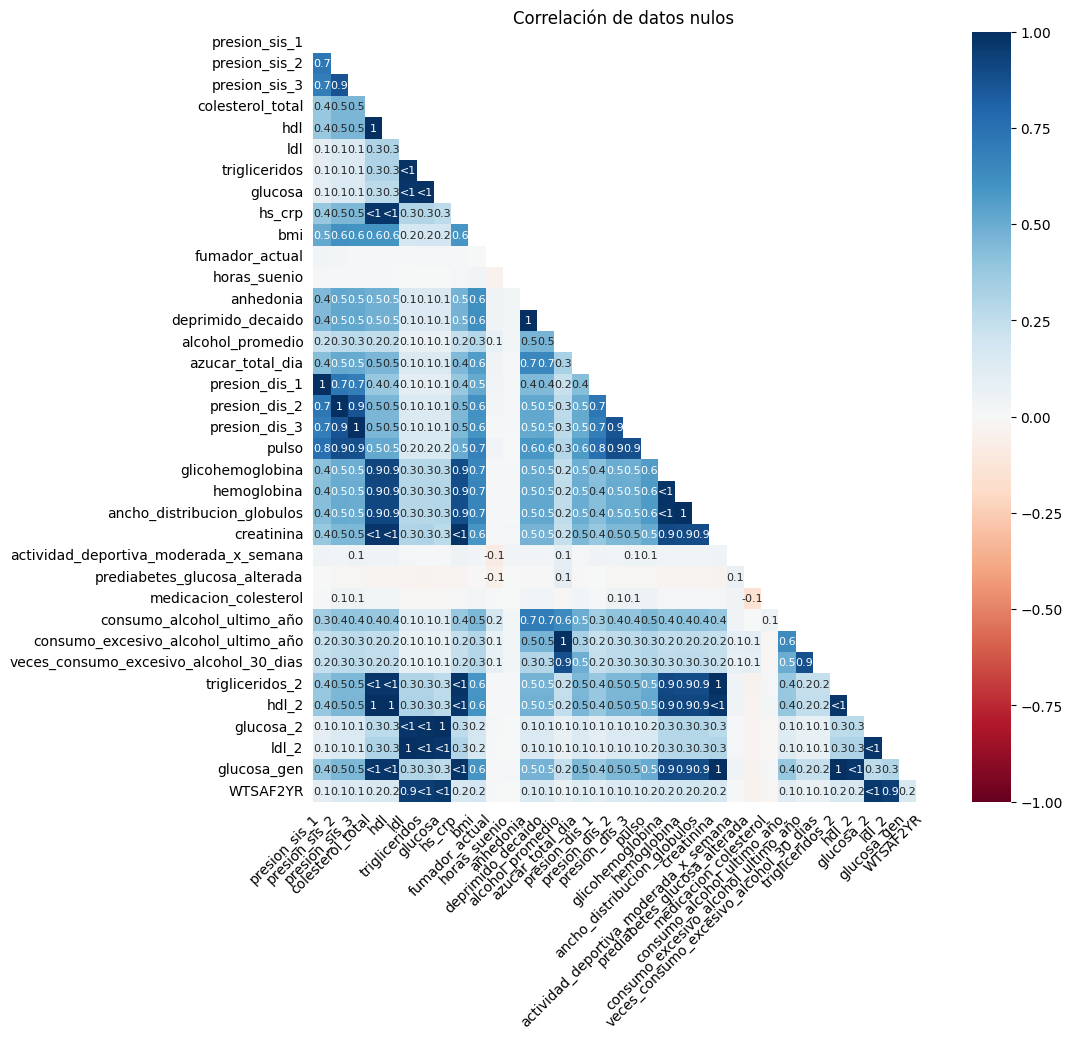

In [117]:
msno.heatmap(df_min, fontsize=10, figsize=(10,10))
plt.title("Correlación de datos nulos", fontsize=12)
plt.show()

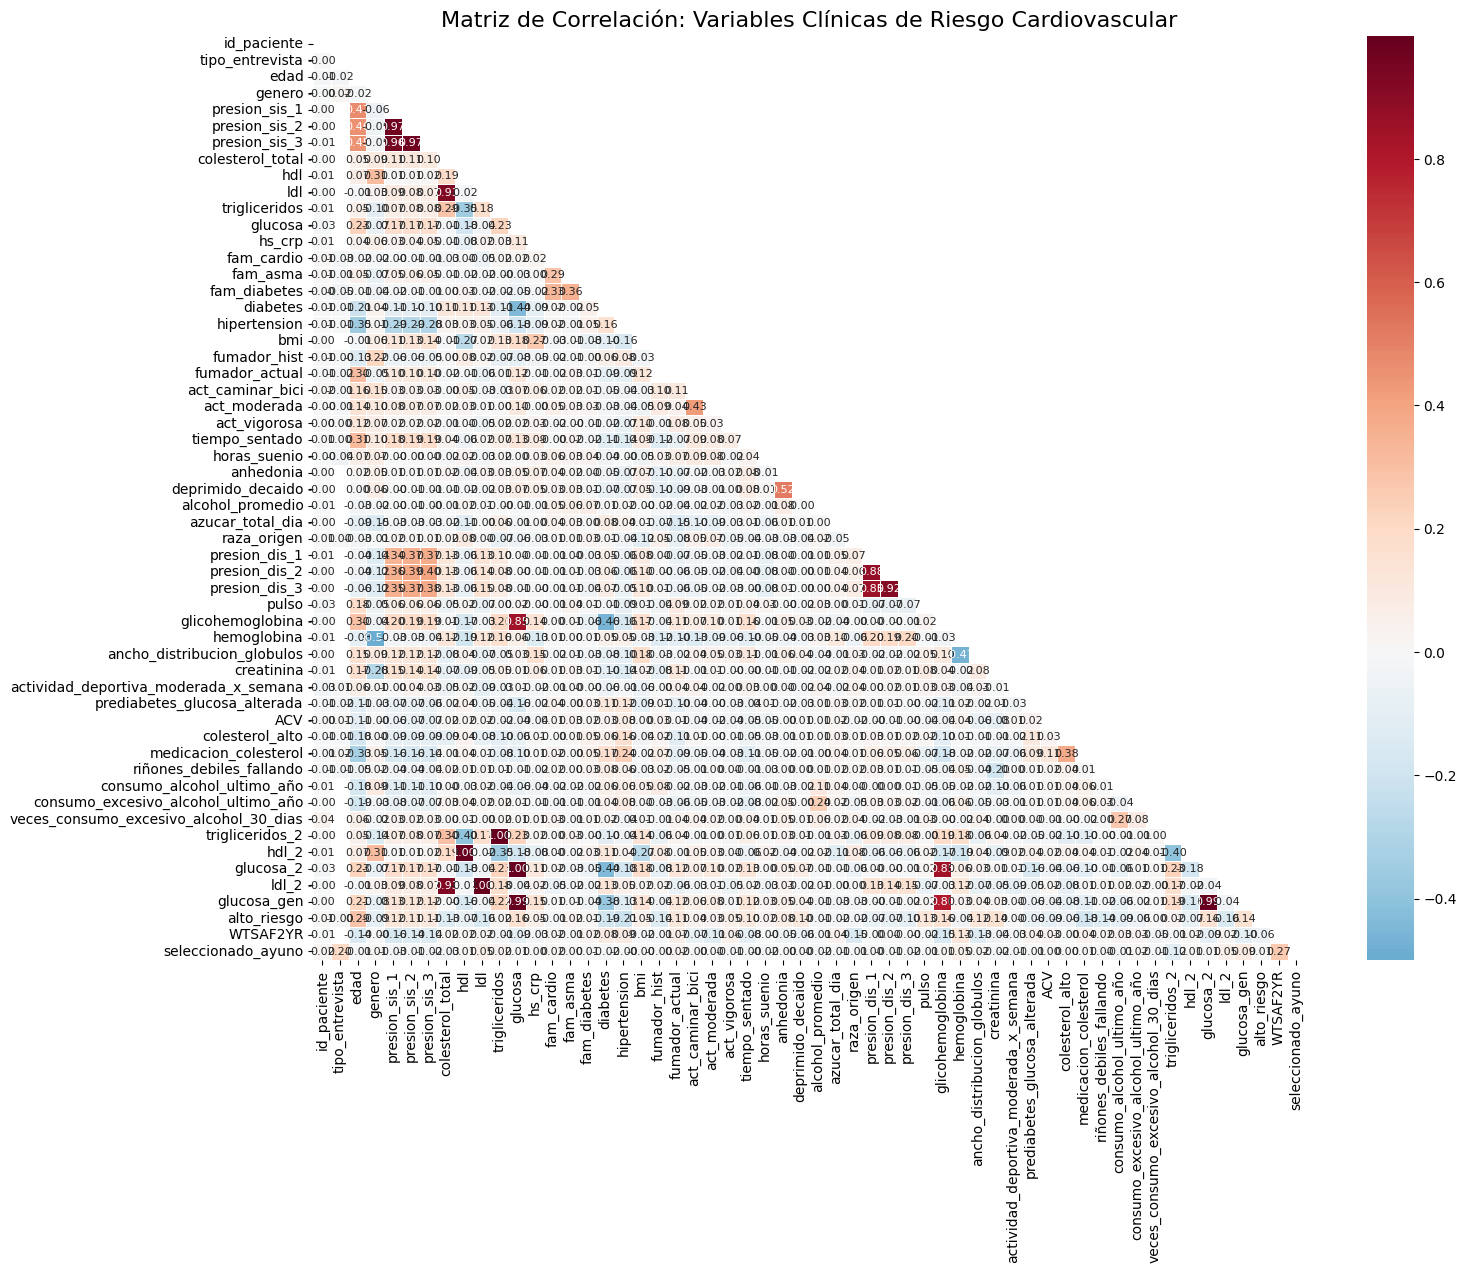

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Calculamos la matriz de correlación (usamos Spearman si hay variables no normales)
corr_matrix = df_min.corr(method='pearson')

# 2. Configuramos el tamaño de la figura
plt.figure(figsize=(16, 12))

# 3. Creamos un mapa de calor (Heatmap)
# Usamos una máscara para ver solo la mitad inferior (espejada) y que sea más legible
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,           # Muestra los números
            fmt=".2f",            # Dos decimales
            cmap='RdBu_r',        # Rojo para positiva, Azul para negativa
            center=0,
            linewidths=0.5,
            annot_kws={"size": 8}) # Tamaño de letra de los números

plt.title('Matriz de Correlación: Variables Clínicas de Riesgo Cardiovascular', fontsize=16)
plt.show()